# Dataset Analysis V1 (OLD)
Copyright (C) 2021 ServiceNow, Inc.

This notebook contains dataset analysis for the final V1 dataset: *all* *internal* NRCan documents. 

This notebook is **very inefficient** and dataset analysis should not be repeated in this manner. It should instead be performed on a subset of the dataset. 

We maintain this notebook for posterity and for the graphs, analysis etc. that it contains. 

In [232]:
%load_ext autoreload
%autoreload 2

## Produce massive df

In [1]:
import pandas as pd

In [3]:
merged_files = pd.read_parquet(f'/nrcan_p2/data/02_intermediate/20210119/merged_filelist.parquet')

In [4]:
merged_files

,ext_processed,name_processed,group_processed,stem,source_processed,ext_raw,name_raw,group_raw,source_raw
0,.csv,100327.pdfminer_split.csv,100327,100327,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100327.pdf,100327,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
1,.csv,100328.pdfminer_split.csv,100328,100328,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100328.pdf,100328,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
2,.csv,100331.pdfminer_split.csv,100331,100331,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100331.pdf,100331,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
3,.csv,100335.pdfminer_split.csv,100335,100335,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100335.pdf,100335,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
4,.csv,100337.pdfminer_split.csv,100337,100337,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100337.pdf,100337,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
...,...,...,...,...,...,...,...,...,...
20329,.csv,129459_gscof_352_e_1976_mn05.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn05,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn05.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20330,.csv,129459_gscof_352_e_1976_mn06.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn06,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn06.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20331,.csv,129459_gscof_352_e_1976_mn07.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn07,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn07.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20332,.csv,129459_gscof_352_e_1976_mn08.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn08,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn08.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


In [4]:
import tqdm 
from pathlib import Path
import pandas as pd 
from dask.diagnostics import ProgressBar

# try concatting directly without adding to array
# try to convert csvs to parquet
# try to append to csv directly (bypass pandas)
import os 
dfs = []
#dfs = dd.DataFrame() #todo!
#dfs = None
REWRITE = True
SKIPPED = False
N = 1000
import numpy as np
ISTART=0
IEND=merged_files.shape[0]
for irow, row in tqdm.tqdm(merged_files.iloc[ISTART:IEND,:].iterrows(), total=merged_files.iloc[ISTART:IEND,:].shape[0]):
    fname = f'/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_{int(irow/N)*N}_{(int(irow/N)+1)*N-1}.parquet'
    #print(fname)
    if os.path.exists(fname) and not REWRITE:
        #print('skipping')
        if not SKIPPED: 
            print(fname)
        SKIPPED=True
        continue
    else:
        SKIPPED=False
    
    if (irow+1) % N == 0:
        fname = f'/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_{irow+1-N}_{irow}.parquet'
        print(fname)
        irow_last = irow
        #dfs = dd.concat(dfs)
        dfs = pd.concat(dfs)
#         display(dfs.dtypes)
#         display(dfs.columns)
        #dfs.to_parquet(fname, schema="infer")
        dfs.to_parquet(fname)
        dfs = []
    else:
        pass
        #print(file)
        try:
            df = pd.read_csv(Path(row.source_processed)/ row.name_processed)
            df = df.set_index('Unnamed: 0')
            
            if df.shape[0]==0:
                print(f'empty file: {Path(row.source_processed)/ row.name_processed}')
                continue
            df = df.dropna(axis=0, subset=['text'])
            #df['text'] = df['text'].fillna(value='')
            
            g = df[df[['text', 'file', 'obj_type']].applymap(np.isreal).any(1)]
            if g.shape[0]> 1:
                print(irow)
                df['text'] = df['text'].to_string()
                
            if df.shape[0] == 0:
                print(f'file has no contents, {Path(row.source_processed)/ row.name_processed}')
                continue
            #    print(irow)
            #    display(g)
            #    raise ValueError()
            
        except Exception as e: 
            print(irow, row)
            #try:
                #df = dd.read_csv(df)
                #df.to_parquet('/nrcan_p2/data/02_intermediate/20210106/compiled_csvs_')
            raise e
        #df = dask.delayed(pd.read_csv)(Path(row.source_processed) / row.name_processed) #dd.read_csv(file)
        #if dfs is None:
        #    dfs = df
        #else:
        #    dfs = dd.concat([dfs, df])
        dfs.append(df)
        
if len(dfs) > 0:
    dfs = pd.concat(dfs)
    #dfs = dd.concat(dfs)
    fname = f'/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_{irow_last+1}_{irow}.parquet'
    print(fname)
    #dfs.to_parquet(fname, schema="infer")
    dfs.to_parquet(fname)

#with ProgressBar():
    #delayed = dask.delayed(pd.concat)(dfs)
    
    #dfs = dd.concat(dfs)
    #delayed2 = dask.delayed(dd.to_parquet)(delayed, '/nrcan_p2/data/02_intermediate/20210106/compiled_csvs.parquet')
    #dfs.to_parquet('/nrcan_p2/data/02_intermediate/20210106/compiled_csvs.parquet')
    #delayed2.compute()#.compute()
    #df = client.compute()

  0%|          | 14/20305 [00:00<18:24, 18.37it/s]

file has no contents, /nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all/100378.pdfminer_split.csv


  0%|          | 26/20305 [00:01<21:21, 15.83it/s]

file has no contents, /nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all/100424.pdfminer_split.csv


  0%|          | 33/20305 [00:01<18:03, 18.71it/s]

file has no contents, /nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all/100446.pdfminer_split.csv
file has no contents, /nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all/100475.pdfminer_split.csv


  0%|          | 40/20305 [00:02<17:30, 19.29it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-8c576705f10f>", line 55, in <module>
    g = df[df[['text', 'file', 'obj_type']].applymap(np.isreal).any(1)]
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py", line 7605, in applymap
    return self.apply(infer)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py", line 7548, in apply
    return op.get_result()
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/apply.py", line 180, in get_result
    return self.apply_standard()
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/apply.py", line 271, in apply_standard
    results, res_index = self.apply_series_generator()
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/apply.py", line 300, in apply_series_generator
    results[i] = self.f(v)
  File "/opt/conda/l

TypeError: object of type 'NoneType' has no len()

### Try to just load all the parquet files using pandas

In [9]:
dfs = None
for pfile in Path(f'/nrcan_p2/data/02_intermediate/20210119/').glob('compiled_csvs_*.parquet'):
    print(pfile)
    df = pd.read_parquet(pfile)
    if dfs is None:
        dfs = df
    else:
        dfs = pd.concat([dfs, df])
    #dfs.append(df)
    
#dfs = dd.concat(dfs)
dfs.to_parquet(f'/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all.parquet')

/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_0_999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_1000_1999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_2000_2999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_3000_3999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_4000_4999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_5000_5999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_6000_6999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_7000_7999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_8000_8999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_9000_9999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_10000_10999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_11000_11999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_12000_12999.parquet
/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_13000_13

### Alternatively, concat the files from the command line

In [ ]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import re

def append_to_parquet_table(dataframe, filepath=None, writer=None):
    """Method writes/append dataframes in parquet format.

    This method is used to write pandas DataFrame as pyarrow Table in parquet format. If the methods is invoked
    with writer, it appends dataframe to the already written pyarrow table.

    :param dataframe: pd.DataFrame to be written in parquet format.
    :param filepath: target file location for parquet file.
    :param writer: ParquetWriter object to write pyarrow tables in parquet format.
    :return: ParquetWriter object. This can be passed in the subsequenct method calls to append DataFrame
        in the pyarrow Table
    """
    table = pa.Table.from_pandas(dataframe)
    if writer is None:
        writer = pq.ParquetWriter(filepath, table.schema)
    writer.write_table(table=table)
    return writer

#combine_parquet_files('/nrcan_p2/data/02_intermediate/20210106/', '/nrcan_p2/data/02_intermediate/20210106/compiled_csvs_all.parquet')
outfile = '/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all.parquet'
def fname_ge(pfile, svalue):
    m = re.search('csvs_([0-9]+)_', str(pfile))
    if m is None: 
        return None
    if int(m.group(1)) >= svalue:
        return True
    else:
        return False
                
writer = None
svalue = 0
for pfile in Path(f'/nrcan_p2/data/02_intermediate/20210119/').glob('compiled_csvs_*.parquet'):
    print(pfile)
    out = fname_ge(pfile, svalue=svalue)
    if out is None or out == False:
        print('skipping')
        continue
        
    df = pd.read_parquet(pfile)
    if df.shape[0] == 0:
        print('empty file, skipping')
        continue
        
    writer = append_to_parquet_table(df, outfile, writer=writer)

In [5]:
writer.close()

### Attempting to do useful things...

In [4]:
import pandas as pd
df = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all.parquet')

In [5]:
df

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
Unnamed: 0,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,252.7300,774.7300,338.896600,793.2065,~s 1.51 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,162.9900,560.5981,351.490061,572.5393,"SL.\VE · POI~T D,\ Tt:~\ PROJECT \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,141.3700,524.1281,191.928100,536.0693,PHASE I \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,207.7600,522.8912,397.459655,541.1936,IXVESTIG..\TIO:\ or OUTCROPS \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,162.9100,486.9281,365.388683,498.8693,RA.-\SCll and AS SOCI A TES; LTD. \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...
...,...,...,...,...,...,...,...,...
1912,<class 'pdfminer.layout.LTTextBoxHorizontal'>,60.0,64.8696,585.1974,226.316400,660.5182,"Head Office: \nP. 0 . Box 8508, Ottawa, \...",/nrcan_p2/data/02_intermediate/20201117/geosca...
1913,<class 'pdfminer.layout.LTTextBoxHorizontal'>,60.0,64.7200,468.5674,285.840800,544.1334,Western Regionc:il Office: \n683 East Hast...,/nrcan_p2/data/02_intermediate/20201117/geosca...
1914,<class 'pdfminer.layout.LTTextBoxHorizontal'>,60.0,26.7700,476.7895,42.535866,495.2035,. .... \n,/nrcan_p2/data/02_intermediate/20201117/geosca...


## Preliminary cleaning (this is magic without prior data analysis)

In [14]:
df['id1'] = df.file.str.split("/").str[-1].str.split('.').str[0].str.split('_').str[0]

In [24]:
df.id1.value_counts().reset_index().sort_values('index')

,index,id1
2050,100333,6
3116,100352,1
2734,100356,1
2230,100357,4
2913,100361,1
...,...,...
2449,8914,2
3061,8915,1
2879,8917,1
2,has,7568


In [15]:
df = df[~df.id1.isin(['has', 'v1'])]

In [ ]:
# Fixed problematic file and resaved 

In [6]:
txts = df[df.file.str.contains('/txt/')]
txts

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
Unnamed: 0,,,,,,,,
0,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 FILE INTRO.TXT INTRODUCTION...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 FILE INTRO.TXT INTRODUCTION...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 FILE INTRO.TXT INTRODUCTION...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
3,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 FILE INTRO.TXT INTRODUCTION...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
4,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 FILE INTRO.TXT INTRODUCTION...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
...,...,...,...,...,...,...,...,...
4118,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 Rock-Eval/TOC data for 1...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
4119,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 Rock-Eval/TOC data for 1...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
4120,None,NaN,NaN,NaN,NaN,NaN,Unnamed: 0\n0 Rock-Eval/TOC data for 1...,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


In [9]:
import pathlib 
for ff in txts.file.unique():
    print(ff)
    dff = pd.read_csv('/nrcan_p2/data/02_intermediate/20201117/geoscan/txt/' + pathlib.Path(ff).stem + '.csv')
    dff
    df.loc[(df.file == ff), :] = dff

/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/130913_INTRO.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/133235_YKPLUTON.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/133472_OF2506.txt
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/194084_92G1LEG.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/205313_OF2867.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/207537_OF3206.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/209021_D3449.txt
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/210082_OFTEXT.txt
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/210114_BEDRCK.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/210114_CONDO.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/210114_EXTENT.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/210114_GSCSTRM.TXT
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/210114_INTRO.TXT
/nrcan_p2/data/01_raw/202

In [11]:
txts = df[df.file.str.contains('/wp_rtf/')]
txts

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
Unnamed: 0,,,,,,,,
0,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 Kurita, H. and Uchida, T., 19...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 Kurita, H. and Uchida, T., 19...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 Kurita, H. and Uchida, T., 19...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
0,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 McNeil, D. H., 1999: Micropal...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 McNeil, D. H., 1999: Micropal...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 McNeil, D. H., 1999: Micropal...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
0,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 Lorenson, T. D., Whiticar, M....",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 Lorenson, T. D., Whiticar, M....",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,None,NaN,NaN,NaN,NaN,NaN,"Unnamed: 0\n0 Lorenson, T. D., Whiticar, M....",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


In [12]:
import pathlib 
for ff in txts.file.unique():
    print(ff)
    dff = pd.read_csv('/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf/' + pathlib.Path(ff).stem + '.csv')
    dff
    df.loc[(df.file == ff), :] = dff

/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_Dinoflagelletes.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_Foraminifera.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_GasGeoChem.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_Grainsize.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_Plasticity.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_Pollen.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_RockEval.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_conductivity.rtf
/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/210944_tbl_magnetic.rtf


In [13]:
txts = df[df.file.str.contains('/wp_rtf/')]
txts

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
Unnamed: 0,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,"Kurita, H. and Uchida, T., 1999: Dinoflagellat...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,NaN,NaN,NaN,NaN,NaN,NaN,\n,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,NaN,NaN,NaN,NaN,NaN,NaN,\n,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
0,NaN,NaN,NaN,NaN,NaN,NaN,"McNeil, D. H., 1999: Micropaleontology of the ...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,NaN,NaN,NaN,NaN,NaN,NaN,\n,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,NaN,NaN,NaN,NaN,NaN,NaN,\n,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
0,NaN,NaN,NaN,NaN,NaN,NaN,"Lorenson, T. D., Whiticar, M., Waseda, A., Dal...",/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
1,NaN,NaN,NaN,NaN,NaN,NaN,\n,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
2,NaN,NaN,NaN,NaN,NaN,NaN,\n,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


In [16]:
df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_2.parquet')

## Some preliminary computations

* width
* height
* nwords
* nwords_stripped
* width/nwords_stripped

In [17]:
df['width'] = df.pos_x1 - df.pos_x0
print('...height')
df['height'] = df.pos_y1 - df.pos_y0
print('...nchars')
df['nchars_stripped'] = df.text.str.strip().str.len()
print('...nwords_stripped')
df['nwords_stripped'] = df.text.str.strip().str.split().str.len()

<ipython-input-17-fb40f95cc56b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['width'] = df.pos_x1 - df.pos_x0


...height


<ipython-input-17-fb40f95cc56b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['height'] = df.pos_y1 - df.pos_y0


...nchars


<ipython-input-17-fb40f95cc56b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nchars_stripped'] = df.text.str.strip().str.len()


...nwords_stripped


<ipython-input-17-fb40f95cc56b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nwords_stripped'] = df.text.str.strip().str.split().str.len()


In [18]:
df['nchars_stripped_dbl'] = df.text.str.replace('\s+', ' ').str.len()

<ipython-input-18-0f8561113596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nchars_stripped_dbl'] = df.text.str.replace('\s+', ' ').str.len()


In [19]:
df['text_stripped_nocid'] = df.text.str.replace('\s+', ' ').str.replace('\(cid:[0-9]+\)', '').str.strip()

<ipython-input-19-96fb28a7abae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_stripped_nocid'] = df.text.str.replace('\s+', ' ').str.replace('\(cid:[0-9]+\)', '').str.strip()


In [20]:
df['nchars_stripped_nocid'] = df.text_stripped_nocid.str.len()

<ipython-input-20-0085a3353000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nchars_stripped_nocid'] = df.text_stripped_nocid.str.len()


In [21]:
df['nwords_stripped_nocid'] = df.text_stripped_nocid.str.split().str.len()

<ipython-input-21-958595eb1482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nwords_stripped_nocid'] = df.text_stripped_nocid.str.split().str.len()


In [22]:
df['area'] = df.width * df.height

<ipython-input-22-e7e68fd6e3f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df.width * df.height


In [23]:
df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3.parquet')
#df = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_2.parquet')


In [83]:
import pandas as pd
df = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3.parquet')

## Compute

In [55]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]

## Width/Height

[None]

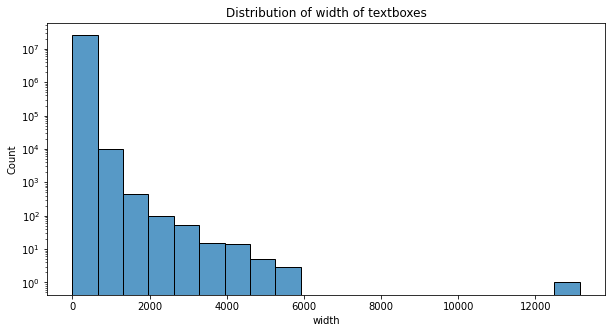

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='width', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of width of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

In [26]:
df[df.width > 12000].text.iloc[0]

'Pyrite: Unit moderately pyritic with main pyrite occurrences at: a) pyrite band 4295.50 – 4295.52 m, 30 \n– 40 % pyrite here; b) pyrite band 4297.74 – 4297.73 m, 20% pyrite; c) pyrite nodule 4302.18 – 4302.20 \nm; d) pyrite band 4306.57 – 4306.58 m; e) pyrite nodule 4308.15 – 4308.16 m; f) pyrite band 4315.18 \n– 4315.19 m; g) pyrite band 4316.35 – 4316.40 m; h) pyrite band 4319.09 m; i) pyrite band 4322.80 – \n4322.81 m.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

[None]

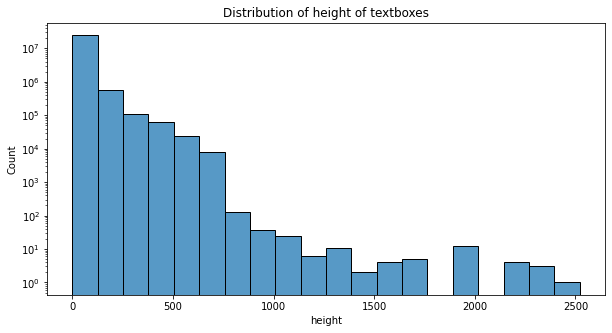

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='height', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of height of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

Text(0.5, 1.0, 'Distribution of nchars vs area of textboxes')

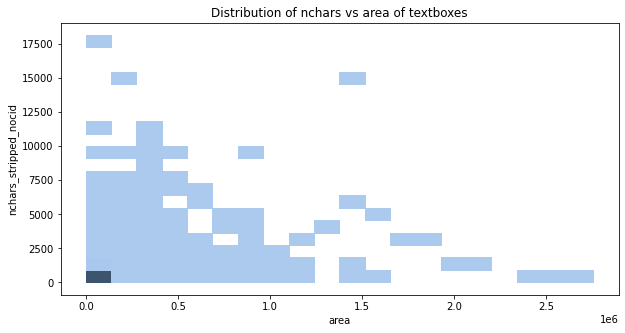

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='area', y='nchars_stripped_nocid', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars vs area of textboxes')
#plt.legend()
#plt.ylabel('pixels')
#plt.gca().set(yscale='log')

**analysis**: there is no clear correlation between the textbox size and the number of characters it contains. There may still be a correlation between size and number of "real" words

## Total number of entries


In [29]:
df['id1'] = df.id1.astype(int)

<ipython-input-29-d5be1bb3019b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id1'] = df.id1.astype(int)


### Average number of pdfs per entry

Note: any entries that were already split up into multiple files will not be accounted for here

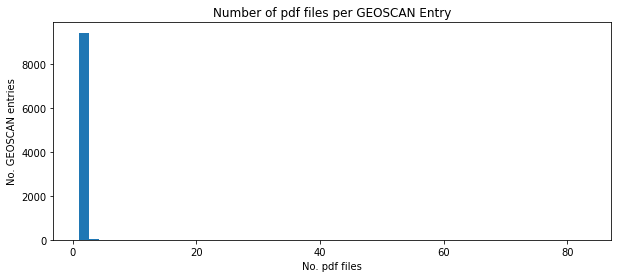

In [30]:
v = df[['file', 'id1']].groupby(['id1']).file.nunique()#count()#.groupby('id').sum.plot()
v.describe().to_frame()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pdf files')
plt.ylabel('No. GEOSCAN entries')
plt.title('Number of pdf files per GEOSCAN Entry')
plt.show()

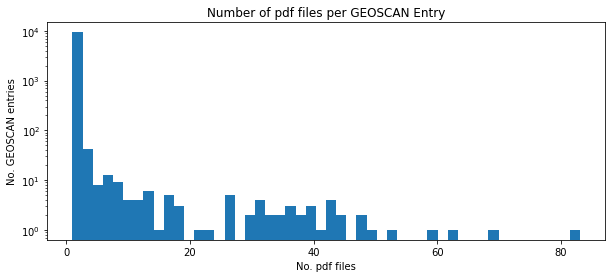

In [31]:
v = df[['file', 'id1']].groupby(['id1']).file.nunique()#count()#.groupby('id').sum.plot()

import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pdf files')
plt.ylabel('No. GEOSCAN entries')
plt.title('Number of pdf files per GEOSCAN Entry')
plt.show()

In [32]:
v.describe(percentiles=percentiles).to_frame()

,file
count,9545.000000
mean,1.234364
std,2.709896
min,1.000000
0%,1.000000
1%,1.000000
10%,1.000000
20%,1.000000
25%,1.000000
30%,1.000000


### Average number of pages per pdf overall 


In [33]:
v = df[['file', 'pg']].groupby(['file']).pg.nunique()

Text(0.5, 1.0, 'Number of pages per pdf')

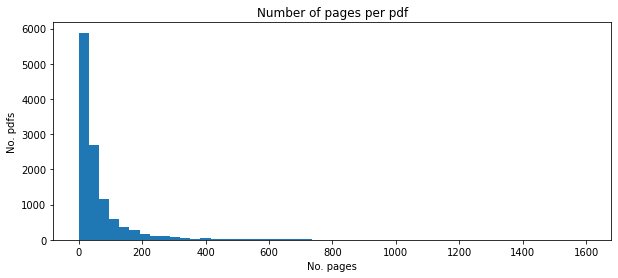

In [34]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

Text(0.5, 1.0, 'Number of pages per pdf')

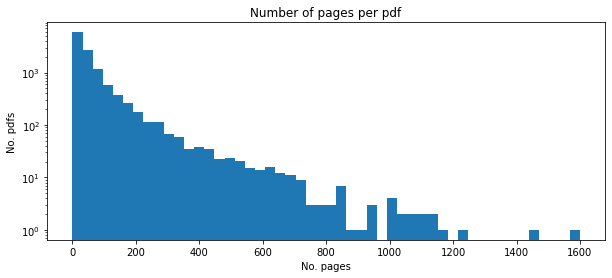

In [35]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [36]:
v.describe(percentiles=percentiles).to_frame()

,pg
count,11782.000000
mean,64.120438
std,102.946525
min,0.000000
0%,0.000000
1%,1.000000
10%,5.000000
20%,11.000000
25%,13.000000
30%,16.000000


### Number of pages and documents overall

In [37]:
print('Number of pages overall:')
print(df.groupby(['file', 'pg']).ngroups)

print('Number of documents overall:')
print(df.groupby('file').ngroups)

print('Number of entries overall:')
print(df.groupby('id1').ngroups)

Number of pages overall:
755467
Number of documents overall:
11782
Number of entries overall:
9545


### Number of pages per pdf per GEOSCAN entry

This is not necessarily meaningful. It assumes that "entries" are a single "document" with potentially multiple pdfs

In [38]:
v = df[['id1','file', 'pg']].groupby(['id1', 'file']).pg.nunique().to_frame().groupby('id1').pg.agg(['mean', 'min', 'max', 'median', 'count']) #mean()#.unstack().groupby(['file', 'pg'#.unstack()# .count()#
#display(v) # groupby(['file']).pg.nunique()#count()#.groupby('id').sum.plot()
#v.describe().to_frame()

In [39]:
v['count'].value_counts() #describe(percentiles=[0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999, 1.0])
bins = [1, 2, 3, 4, 6, 10, 20, 40, 100]
v['count_bins'] = pd.cut(v['count'], bins, right=False)

[1, 2)
[2, 3)
[3, 4)
[4, 6)
[6, 10)
[10, 20)
[20, 40)
[40, 100)


Text(0.5, 0.98, 'No. pg per pdf for each GEOSCAN entry')

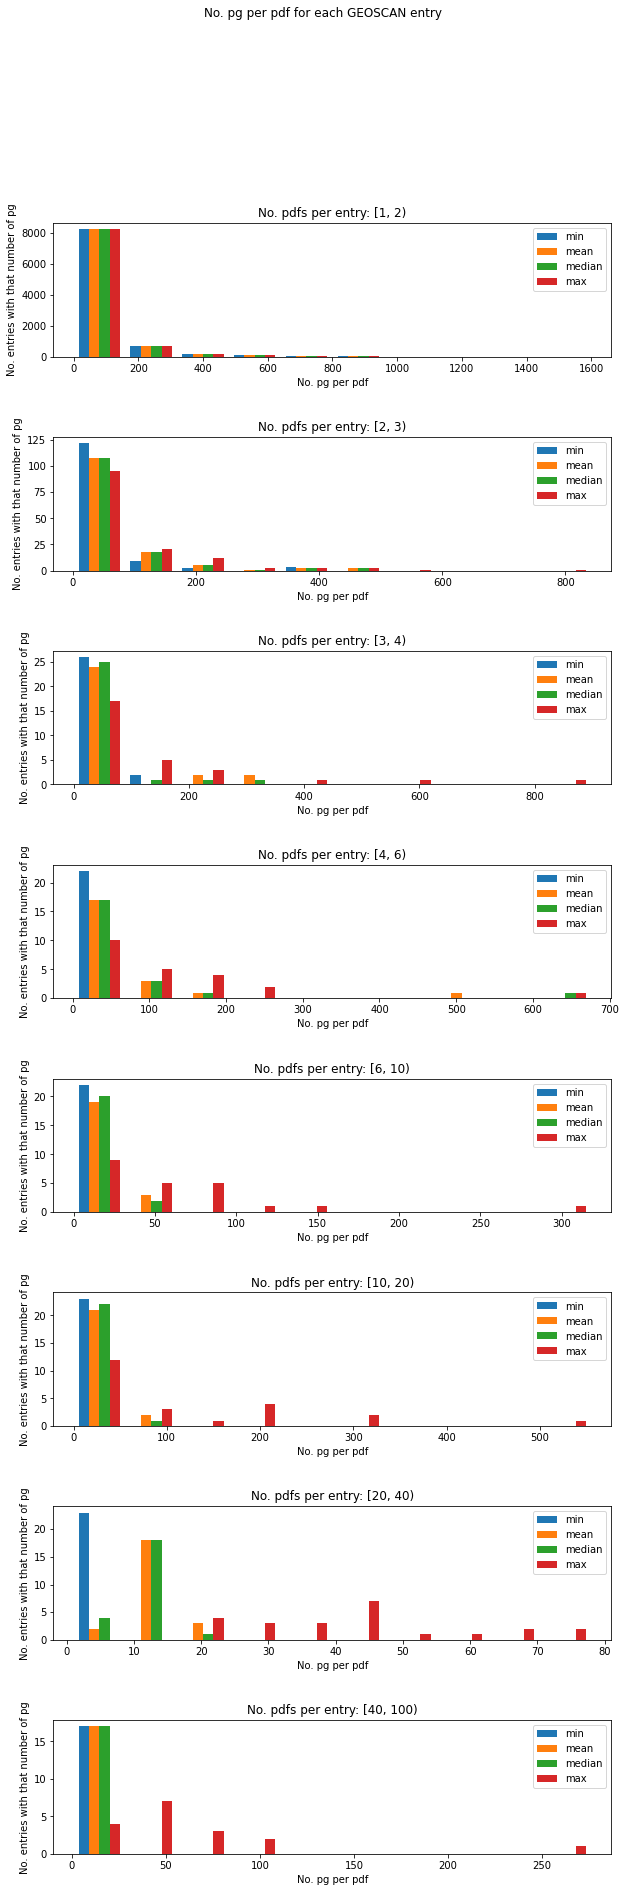

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(8,1, figsize=(10,30),gridspec_kw=dict(hspace=0.6) )
for (gname, group), ax in zip(v.sort_values('mean').groupby('count_bins'), axes.flatten()):
    print(gname)
    #v.sort_values('mean').groupby('count').plot(kind='bar', figsize=(20,5), logy=False) #subplots=True)
    #group[['min', 'mean', 'median', 'max']].plot.bar(title=f"No. pdfs per entry: {gname}", ax=ax)
    #sns.barplot()
    #group[['min', 'mean', 'median', 'max']].plot.hist(ax=ax, stacked=False) #='bar')
    ax.hist(group[['min', 'mean', 'median', 'max']], stacked=False)
    ax.legend(['min', 'mean', 'median', 'max'])
#     for k in ['min', 'mean', 'median', 'max']:
#         sns.histplot(group, x=k, bins=20, ax=ax, )
    #df.plot(y=[])
    #sns.histplot(data=group['mine'], multiple='dodge', bins=20, ax=ax)
    #sns.histplot(data=group['mm'], multiple='dodge', bins=20, ax=ax)
    #sns.histplot(data=group['mine'], multiple='dodge', bins=20, ax=ax)
    #sns.histplot(data=group['mine'], multiple='dodge', bins=20, ax=ax)
    ax.set_title(f"No. pdfs per entry: {gname}")
    ax.set_xlabel("No. pg per pdf")
    ax.set_ylabel('No. entries with that number of pg')
#g=  sns.FacetGrid(v, row='count_bins', aspect=4)
#g.map(sns.histplot, data=v[['min', 'mean', 'median', 'max']], bins=20, multiple='dodge', legend=True, ax=ax)
#g.map(v[['min', 'mean', 'median', 'max']].plot.hist, bins=20)
#fig.legend()
fig.suptitle('No. pg per pdf for each GEOSCAN entry')

**analysis** overall, it seems like there is a lot of similarity in number of pages/pdf regardless of how many pdfs were associated with the entry

### Average length of boxes in characters

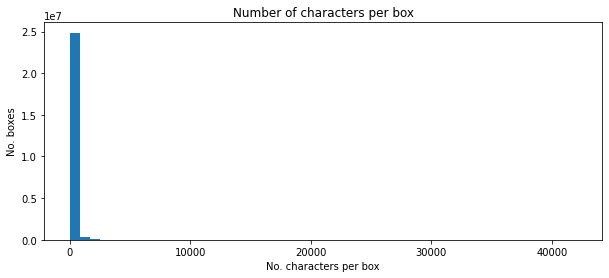

In [41]:
import matplotlib.pyplot as plt
df.nchars_stripped.plot.hist(bins=50, figsize=(10,4))
#plt.yscale('log')
plt.xlabel('No. characters per box')
plt.ylabel('No. boxes')
plt.title('Number of characters per box')
plt.show()

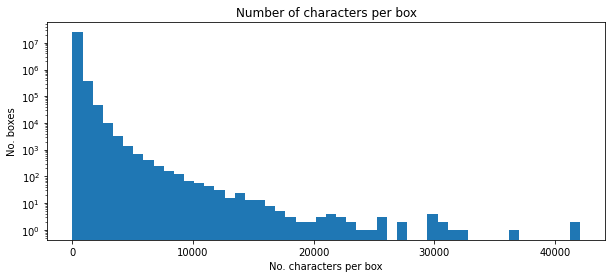

In [42]:
import matplotlib.pyplot as plt
df.nchars_stripped.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. characters per box')
plt.ylabel('No. boxes')
plt.title('Number of characters per box')
plt.show()

**analysis**
There are some boxes with > 40k words (after the removal of errors processing txt/rtfs)


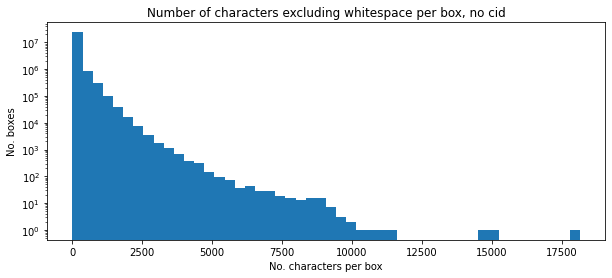

In [43]:
import matplotlib.pyplot as plt
df.nchars_stripped_nocid.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. characters per box')
plt.ylabel('No. boxes')
plt.title('Number of characters excluding whitespace per box, no cid')
plt.show()

**analysis** removing the cid tokens significantly drops the number of characters per box. There are still some with > 10k per box. See below: they're all real text (if problematic).

In [45]:
df[df.nchars_stripped_nocid > 10000]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,height,nchars_stripped,nwords_stripped,nchars_stripped_dbl,text_stripped_nocid,nchars_stripped_nocid,nwords_stripped_nocid,area
Unnamed: 0,,,,,,,,,,,,,,,,,,
108,<class 'pdfminer.layout.LTTextBoxHorizontal'>,9.0,74.159900,89.402800,552.388000,750.830550,Nisku -- Meekwap Play. predicted pool sizes ....,/nrcan_p2/data/02_intermediate/125326.pdfminer...,125326,478.228100,661.427750,10548,491,10240,Nisku -- Meekwap Play. predicted pool sizes .....,10239,491,3.163133e+05
3298,<class 'pdfminer.layout.LTTextBoxHorizontal'>,36.0,65.260000,118.465800,752.630000,570.971400,"ll! I"" !In Ili; 'in I!li '1""11111"":' IiI! \n'...",/nrcan_p2/data/02_intermediate/293262.pdfminer...,293262,687.370000,452.505600,11698,2461,10792,"ll! I"" !In Ili; 'in I!li '1""11111"":' IiI! ' II...",10791,2461,3.110388e+05
10723,<class 'pdfminer.layout.LTTextBoxHorizontal'>,118.0,428.641980,189.746705,735.765257,365.328266,!\n!\n!!!!!!\n!!!!!!!!!!!!!!\n!\n!\n!\n!\n!\n!...,/nrcan_p2/data/02_intermediate/20201006/geosca...,292616,307.123277,175.581561,18142,7863,18143,! ! !!!!!! !!!!!!!!!!!!!! ! ! ! ! ! ! ! !!! ! ...,18142,7863,5.392518e+04
47,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,28.730000,53.851960,520.821700,705.862190,Introduction . . . . . . . . . • . • . • . . ...,/nrcan_p2/data/02_intermediate/20201117/geosca...,102157,492.091700,652.010230,11486,5005,10996,Introduction . . . . . . . . . • . • . • . . •...,10995,5005,3.208488e+05
60,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,992.884300,239.256158,1659.347500,2440.310645,No stratigraphic order implied; overlapping ge...,/nrcan_p2/data/02_intermediate/20201117/geosca...,295537,666.463200,2201.054487,15090,2097,14970,No stratigraphic order implied; overlapping ge...,14969,2097,1.466922e+06
35929,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,167.040000,264.603000,225.892582,355.674000,#\n#\n#\n#\n#\n#\n#\n#\n#\n#\n#\n#\n#\n#\n#\n#...,/nrcan_p2/data/02_intermediate/20201117/geosca...,292608,58.852582,91.071000,11455,5383,11456,# # # # # # # # # # # # # # # # # # # # # # # ...,11455,5383,5.359763e+03
5510,<class 'pdfminer.layout.LTTextBoxHorizontal'>,16.0,238.447384,92.729024,539.628134,570.848448,!\n!\n!\n!\n!\n!\n!\n!\n!\n!\n!\n!\n!\n!\n!\n!...,/nrcan_p2/data/02_intermediate/20201117/geosca...,289847,301.180750,478.119424,14790,7259,14791,! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ...,14790,7259,1.440004e+05


### Number of characters per page, per doc, per entry

In [46]:
v = df[['id1','file', 'pg', 'nchars_stripped_nocid']].groupby(['id1', 'file', 'pg']).nchars_stripped_nocid.sum() #mean()#.unstack().groupby(['file', 'pg'#.unstack()# .count()#
#display(v) # groupby(['file']).pg.nunique()#count()#.groupby('id').sum.plot()
#v.describe().to_frame()

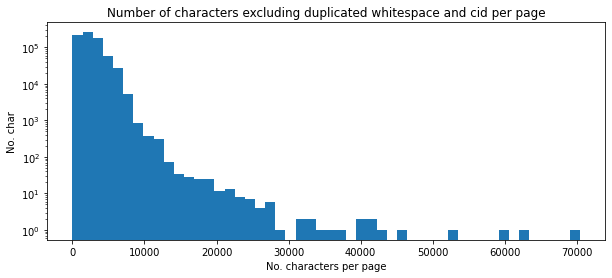

In [47]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. characters per page')
plt.ylabel('No. char')
plt.title('Number of characters excluding duplicated whitespace and cid per page')
plt.show()

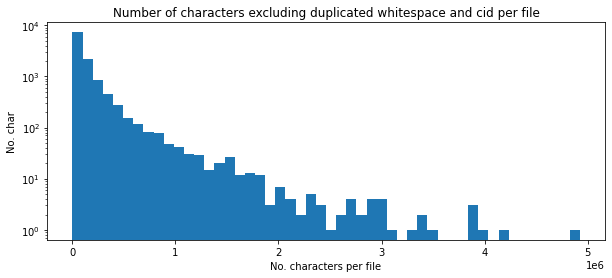

In [48]:
v = df[['id1','file', 'nchars_stripped_nocid']].groupby(['id1', 'file']).nchars_stripped_nocid.sum()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. characters per file')
plt.ylabel('No. char')
plt.title('Number of characters excluding duplicated whitespace and cid per file')
plt.show()

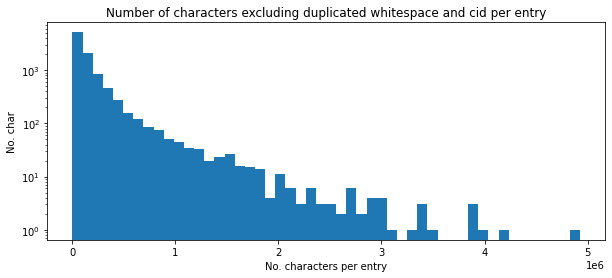

In [49]:
v = df[['id1','file', 'nchars_stripped_nocid']].groupby(['id1']).nchars_stripped_nocid.sum()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. characters per entry')
plt.ylabel('No. char')
plt.title('Number of characters excluding duplicated whitespace and cid per entry')
plt.show()

**analysis** there is a significant diference in the number of characters per page and per file (we have a non-homogenous set of documents)

In [ ]:
# are the entries with the largest/smalles num characters per entry have the pages with 
# the smallest/largest number of entries?

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns 

bins = [0, 5000, 10000, 20000, 40000, 80000]
#bins = [x*1000 for x in bins]
print(bins)


v = df[['id1','file', 'pg','nchars_stripped_nocid']].groupby(['id1', 'file', 'pg']).agg(['mean', 'min', 'max', 'median', 'count', 'sum'])

[0, 5000, 10000, 20000, 40000, 80000]


,id1,file,pg,mean,min,max,median,count,sum,sum_id1,sum_id1_bins
0,4680,/nrcan_p2/data/02_intermediate/4680.pdfminer_s...,0.0,28.833333,4,135,8.0,6,173,78775,"[40000, 80000)"
1,4680,/nrcan_p2/data/02_intermediate/4680.pdfminer_s...,1.0,73.000000,11,135,73.0,2,146,78775,"[40000, 80000)"
2,4680,/nrcan_p2/data/02_intermediate/4680.pdfminer_s...,2.0,147.000000,136,158,147.0,2,294,78775,"[40000, 80000)"
3,4680,/nrcan_p2/data/02_intermediate/4680.pdfminer_s...,3.0,36.833333,6,135,15.0,6,221,78775,"[40000, 80000)"
4,4680,/nrcan_p2/data/02_intermediate/4680.pdfminer_s...,4.0,28.391304,4,79,22.0,23,653,78775,"[40000, 80000)"
...,...,...,...,...,...,...,...,...,...,...,...
755462,327322,/nrcan_p2/data/02_intermediate/20201117/geosca...,12.0,87.100000,0,271,47.5,10,871,30528,"[20000, 40000)"
755463,327322,/nrcan_p2/data/02_intermediate/20201117/geosca...,13.0,83.516129,0,895,15.0,31,2589,30528,"[20000, 40000)"
755464,327322,/nrcan_p2/data/02_intermediate/20201117/geosca...,14.0,45.000000,0,330,8.0,17,765,30528,"[20000, 40000)"
755465,327322,/nrcan_p2/data/02_intermediate/20201117/geosca...,15.0,60.708333,0,559,4.5,24,1457,30528,"[20000, 40000)"


[0, 5000)
[5000, 10000)
[10000, 20000)
[20000, 40000)
[40000, 80000)


Text(0.5, 0.98, 'No. chars per page for each GEOSCAN entry')

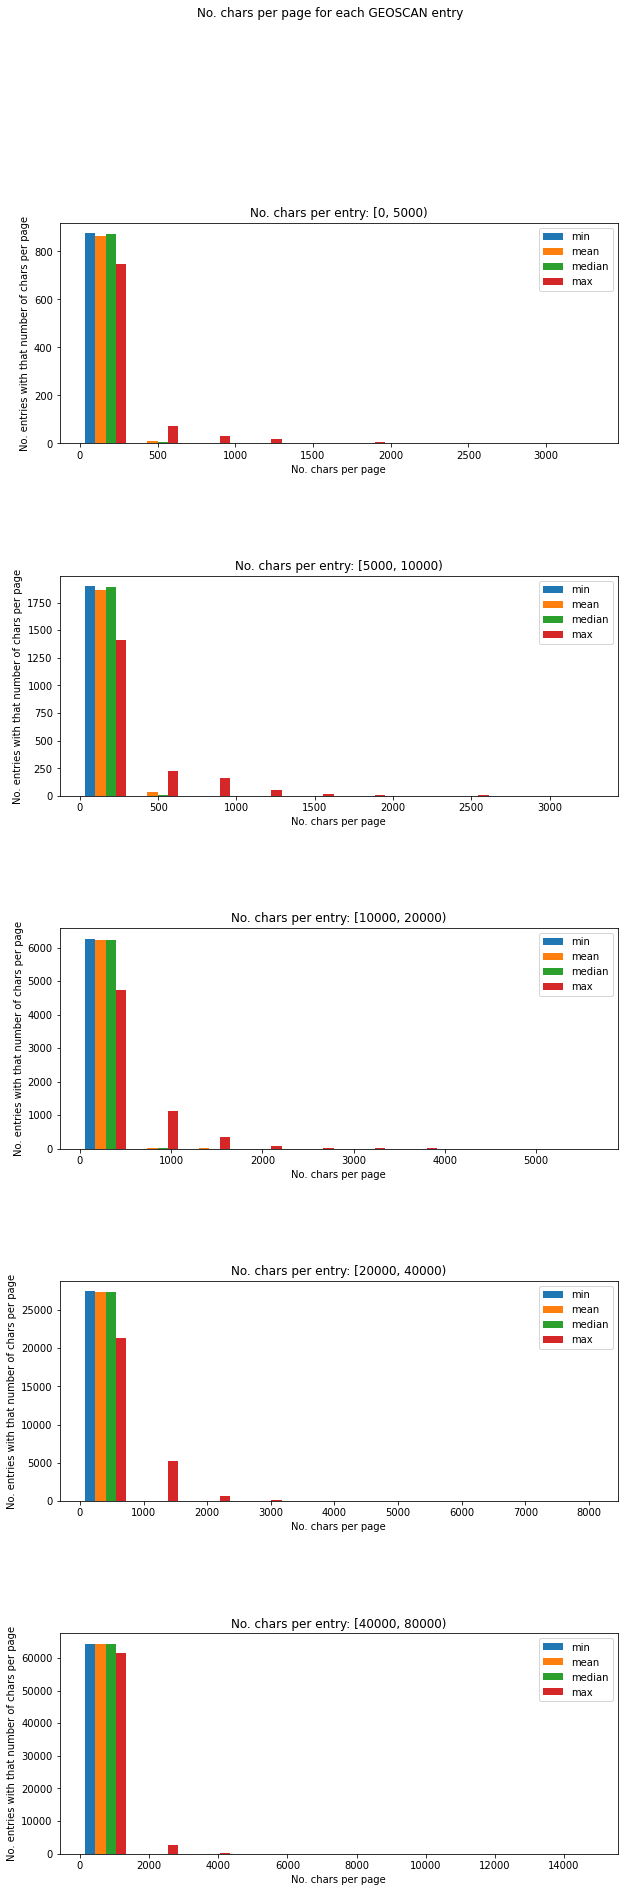

In [51]:
vv = v.droplevel(level=0, axis=1).reset_index().groupby(['id1'])['sum'].sum().to_frame()
gs = pd.merge( v.droplevel(level=0, axis=1).reset_index(), vv, on='id1', suffixes=('', '_id1'))

gs['sum_id1_bins'] = pd.cut(gs['sum_id1'], bins, right=False)
#display(gs)

fig, axes = plt.subplots(gs.groupby('sum_id1_bins').ngroups,1, figsize=(10,30),gridspec_kw=dict(hspace=0.6) )
for (gname, group), ax in zip(gs.groupby('sum_id1_bins'), axes.flatten()):
    print(gname)

    ax.hist(group[['min', 'mean', 'median', 'max']], stacked=False)
    ax.legend(['min', 'mean', 'median', 'max'])

    ax.set_title(f"No. chars per entry: {gname}")
    ax.set_xlabel("No. chars per page")
    ax.set_ylabel('No. entries with that number of chars per page')
#g=  sns.FacetGrid(v, row='count_bins', aspect=4)
#g.map(sns.histplot, data=v[['min', 'mean', 'median', 'max']], bins=20, multiple='dodge', legend=True, ax=ax)
#g.map(v[['min', 'mean', 'median', 'max']].plot.hist, bins=20)
#fig.legend()
fig.suptitle('No. chars per page for each GEOSCAN entry')

**analysis** there isn't much difference in characters per page when we look at longer and shorter documents. longer documents do seem to have longer pages, but it's not really significant.

[0, 5000)
[5000, 10000)
[10000, 20000)
[20000, 40000)
[40000, 80000)


Text(0.5, 0.98, 'No. chars per page for each GEOSCAN file')

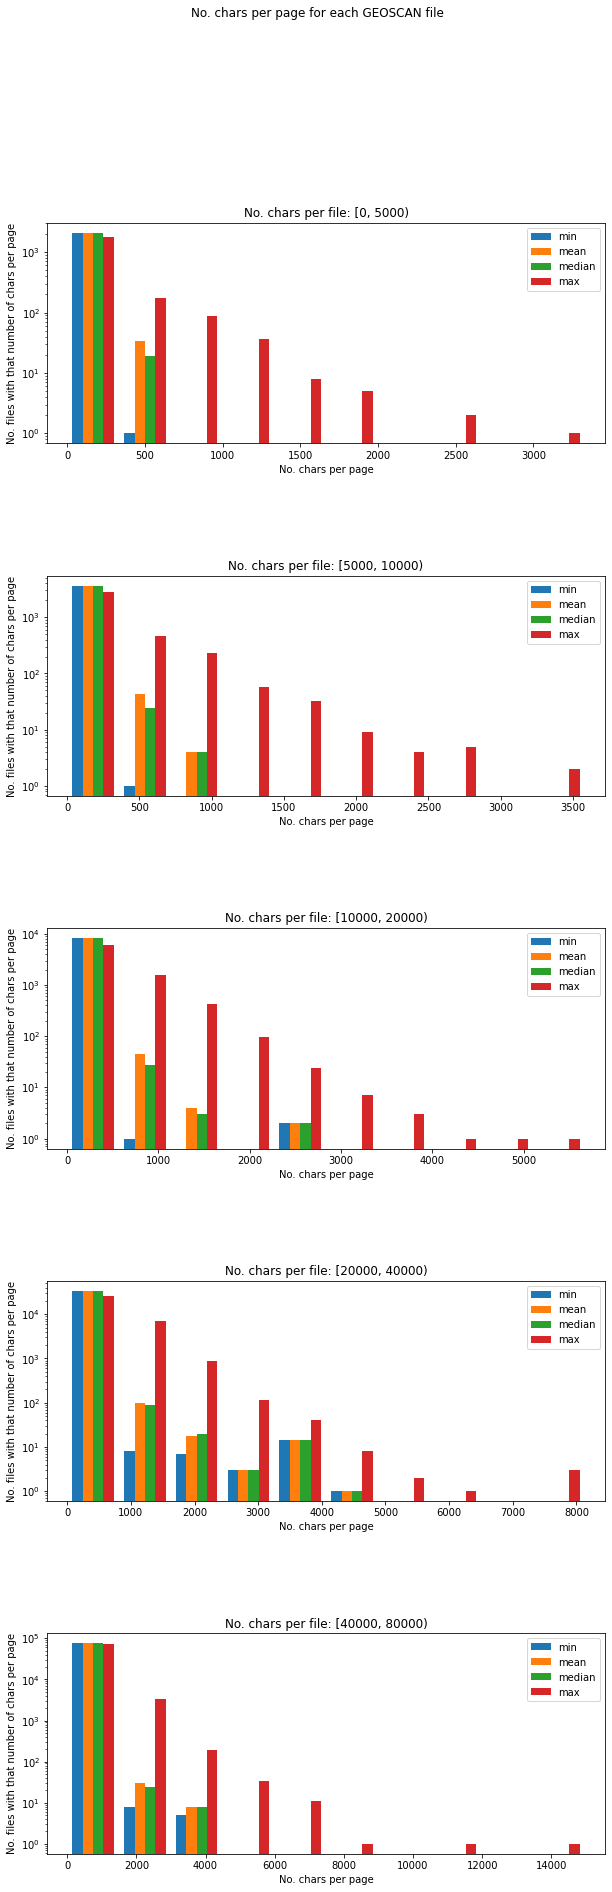

In [52]:
vv = v.droplevel(level=0, axis=1).reset_index().groupby(['id1', 'file'])['sum'].sum().to_frame()

gs = pd.merge( v.droplevel(level=0, axis=1).reset_index(), vv, on=['id1','file'], suffixes=('', '_id1'))

gs['sum_id1_bins'] = pd.cut(gs['sum_id1'], bins, right=False)
gs

fig, axes = plt.subplots(gs.groupby('sum_id1_bins').ngroups,1, figsize=(10,30),gridspec_kw=dict(hspace=0.6) )
for (gname, group), ax in zip(gs.groupby('sum_id1_bins'), axes.flatten()):
    print(gname)

    ax.hist(group[['min', 'mean', 'median', 'max']], stacked=False)
    ax.legend(['min', 'mean', 'median', 'max'])

    ax.set_title(f"No. chars per file: {gname}")
    ax.set_xlabel("No. chars per page")
    ax.set_yscale('log')
    ax.set_ylabel('No. files with that number of chars per page')
#g=  sns.FacetGrid(v, row='count_bins', aspect=4)
#g.map(sns.histplot, data=v[['min', 'mean', 'median', 'max']], bins=20, multiple='dodge', legend=True, ax=ax)
#g.map(v[['min', 'mean', 'median', 'max']].plot.hist, bins=20)
#fig.legend()
fig.suptitle('No. chars per page for each GEOSCAN file')

**analysis** (similar to per entry above) 

### Number of boxes per page, per file, per entry

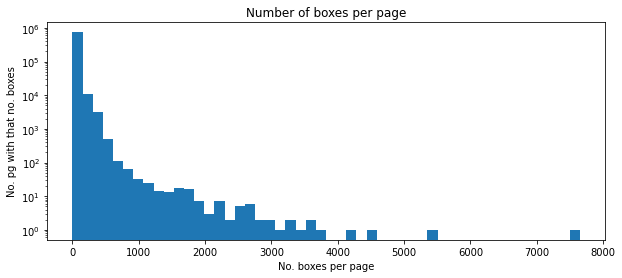

In [53]:
import matplotlib.pyplot as plt
df.groupby(['id1', 'file', 'pg']).text.count().plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. boxes per page')
plt.ylabel('No. pg with that no. boxes')
plt.title('Number of boxes per page')
plt.show()

**analysis** there are a few documents with a lot of boxes per page

In [55]:
v = df.groupby(['id1', 'file', 'pg']).text.count() 
v[v>4000]

id1     file                                                                                                           pg  
220706  /nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs/220706_ImageJ.pdfminer_split.txt              1.0     4586
220854  /nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs/220854_GSC_Open_File_4972.pdfminer_split.txt  25.0    7646
                                                                                                                       26.0    5462
247426  /nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs/247426_v2_0698.pdfminer_split.txt             4.0     4198
Name: text, dtype: int64

In [57]:
df[(df.file == '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs/220706_ImageJ.pdfminer_split.txt') & (df.pg == 1)].nchars_stripped.describe()

count    4586.000000
mean        0.834496
std         0.371675
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: nchars_stripped, dtype: float64

In [ ]:
**analysis**: it seems like these examples, with many boxes, are maps etc. with very few characters per box

In [58]:
v = df.groupby(['id1', 'file', 'pg']).agg({'text': 'count', 'nchars_stripped_nocid': 'sum'})
v

text  \
id1    file                                               pg           
4680   /nrcan_p2/data/02_intermediate/4680.pdfminer_sp... 0.0      6   
                                                          1.0      2   
                                                          2.0      2   
                                                          3.0      6   
                                                          4.0     23   
...                                                              ...   
327322 /nrcan_p2/data/02_intermediate/20201117/geoscan... 12.0    10   
                                                          13.0    31   
                                                          14.0    17   
                                                          15.0    24   
                                                          16.0     9   

                                                                nchars_stripped_nocid  
id1    file                                               pg                           
4680   /nrcan_p2/data/02_intermediate/4680.pdfminer_sp... 0.0                     173  
                                                          1.0                     146  
                                                          2.0                     294  
                                                          3.0                     221  
                                                          4.0                     653  
...                                                                               ...  
327322 /nrcan_p2/data/02_intermediate/20201117/geoscan... 12.0                    871  
                                                          13.0                   2589  
                                                          14.0                    765  
                                                          15.0                   1457  
                                                          16.0                    642  

[755467 rows x 2 columns]

Text(0.5, 1.0, 'Number of boxes vs number of chars (stripped no cid) per page')

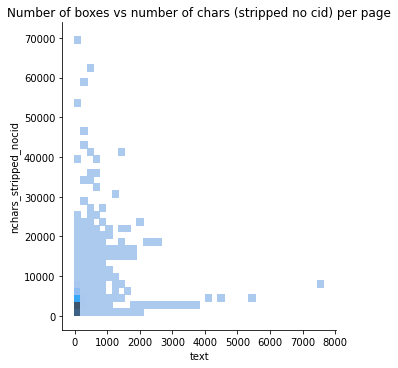

In [62]:
sns.displot(v, x='text', y='nchars_stripped_nocid', bins=40)
plt.title('Number of boxes vs number of chars (stripped no cid) per page')

**analysis** we see that more boxes -> still leads to few characters per page. 

Text(0.5, 1.0, 'Number of boxes vs number of chars (stripped no cid) per box')

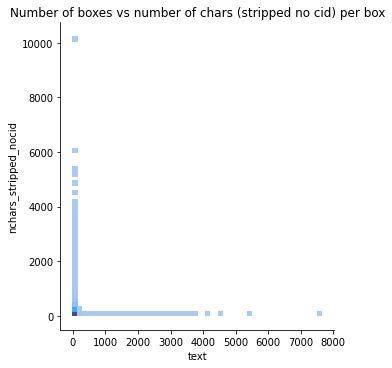

In [68]:
v = df.groupby(['id1', 'file', 'pg']).agg({'text': 'count', 'nchars_stripped_nocid': 'mean'})
ax = sns.displot(v, x='text', y='nchars_stripped_nocid', bins=60)
#ax.set_yscale('log')
#plt.yscale('log')
plt.title('Number of boxes vs number of chars (stripped no cid) per box')

**analysis** large number of boxes -> few characters per box (supporting the "they're maps" or "ocr'd landscape page" hypothesis

## Number of real words

In [3]:
!pip install pyenchant

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 55 kB 6.3 MB/s eta 0:00:01


In [8]:
import enchant
display(enchant.list_languages())
d = enchant.Dict("en")

display(df.iloc[0:2,:].text_stripped_nocid)
df.iloc[0:2,:].text_stripped_nocid.apply(lambda x: [d.check(xx) for xx in x.split()]) 

['en_US', 'en', 'en_AU', 'en_CA', 'en_GB']

Unnamed: 0
0                             ~s 1.51
1    SL.\VE · POI~T D,\ Tt:~\ PROJECT
Name: text_stripped_nocid, dtype: object

Unnamed: 0
0                                [False, True]
1    [False, False, False, False, False, True]
Name: text_stripped_nocid, dtype: object

In [3]:
s = 'This i!s a terrible. Paragraph about Canada...'
[d.check(ss) for ss in s.split()]

[True, False, True, True, True, True, True]

In [9]:
from tqdm import tqdm
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
df['is_enchant_word'] = df.text_stripped_nocid.progress_apply(lambda x: [d.check(xx) for xx in x.split()])

df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant.parquet')

 78%|███████▊  | 19642318/25288289 [3:49:15<50:55, 1847.59it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 84%|████████▍ | 21355627/25288289 [4:08:19<24:27, 2680.49it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 89%|████████▉ | 22552176/25288289 [4:25:46<2:11:55, 345.65it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set

In [13]:
#df['is_enchant_word_ntrue'] = df.is_enchant_word.progress_apply(lambda x: len([xx for xx in x if xx == True]))
df['is_enchant_word_ntrue_perc'] = df.is_enchant_word_ntrue / df.nwords_stripped_nocid
df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_2.parquet')

In [14]:
df

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,nchars_stripped,nwords_stripped,nchars_stripped_dbl,text_stripped_nocid,nchars_stripped_nocid,nwords_stripped_nocid,area,is_enchant_word,is_enchant_word_ntrue,is_enchant_word_ntrue_perc
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,252.7300,774.7300,338.896600,793.2065,~s 1.51 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,86.166600,...,8,2,8,~s 1.51,7,2,1592.057185,"[False, True]",1,0.500000
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,162.9900,560.5981,351.490061,572.5393,"SL.\VE · POI~T D,\ Tt:~\ PROJECT \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,188.500061,...,34,6,33,"SL.\VE · POI~T D,\ Tt:~\ PROJECT",32,6,2250.916931,"[False, False, False, False, False, True]",1,0.166667
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,141.3700,524.1281,191.928100,536.0693,PHASE I \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,50.558100,...,8,2,8,PHASE I,7,2,603.724384,"[True, True]",2,1.000000
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,207.7600,522.8912,397.459655,541.1936,IXVESTIG..\TIO:\ or OUTCROPS \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,189.699655,...,30,3,29,IXVESTIG..\TIO:\ or OUTCROPS,28,3,3471.958968,"[False, True, True]",2,0.666667
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,162.9100,486.9281,365.388683,498.8693,RA.-\SCll and AS SOCI A TES; LTD. \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,202.478683,...,36,7,34,RA.-\SCll and AS SOCI A TES; LTD.,33,7,2417.838447,"[False, True, True, False, True, False, True]",4,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,<class 'pdfminer.layout.LTTextBoxHorizontal'>,60.0,64.8696,585.1974,226.316400,660.5182,"Head Office: \nP. 0 . Box 8508, Ottawa, \...",/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,161.446800,...,118,17,105,"Head Office: P. 0 . Box 8508, Ottawa, Ontario,...",104,17,12160.302133,"[True, False, True, True, True, True, False, F...",10,0.588235
1913,<class 'pdfminer.layout.LTTextBoxHorizontal'>,60.0,64.7200,468.5674,285.840800,544.1334,Western Regionc:il Office: \n683 East Hast...,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,221.120800,...,143,17,130,Western Regionc:il Office: 683 East Hastings S...,129,17,16709.214373,"[True, False, False, True, True, True, False, ...",10,0.588235
1914,<class 'pdfminer.layout.LTTextBoxHorizontal'>,60.0,26.7700,476.7895,42.535866,495.2035,. .... \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,15.765866,...,6,2,7,. ....,6,2,290.312657,"[True, True]",2,1.000000


In [18]:
vocab_stripped_nocid = df.text_stripped_nocid.str.split().explode().to_frame().value_counts().to_frame()
vocab_stripped_nocid = vocab_stripped_nocid.rename(columns={0: 'count'})
vocab_stripped_nocid.to_parquet('/nrcan_p2/data/02_intermediate/20210119/vocab_3_enchant_2.parquet')

In [1]:
import pandas as pd
vocab_stripped_nocid = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/vocab_3_enchant_2.parquet')

In [19]:
vocab_stripped_nocid

,count
text_stripped_nocid,
.,10877455
the,10657191
of,8832513
and,6411239
in,3986988
...,...
MOCA.,1
159-3:1,1
"MOC>S&-skin-Johny,",1


In [30]:
vocab_stripped_nocid.describe(percentiles=percentiles)

,count
count,9.788562e+06
mean,3.263964e+01
std,6.782899e+03
min,1.000000e+00
0%,1.000000e+00
1%,1.000000e+00
10%,1.000000e+00
20%,1.000000e+00
25%,1.000000e+00
30%,1.000000e+00


In [38]:
vocab_stripped_nocid.sample(10)

,count
text_stripped_nocid,
"DuL""ham",1
"gro<>n,",1
immigl'anLs,1
"kiitutatsih,",1
~.w.=.-.u~~.m.-.-.~.-.-.,1
(360-400,1
81U239,1
TM-MPB20,8
isolé;:;,1


**analysis** naively there are 9.7M tokens! And a huge tail: about 60% of the words appear only once 

In [15]:
import re
punctuation=r'\W' #[.\-,:!?]'
splitstr = f'(^{punctuation}+|{punctuation}+$)'
re.split(splitstr,'"---blah0,.."')

from tqdm import tqdm
tqdm.pandas()

vocab_stripped_no_cid_split_ending_punct = vocab_stripped_nocid.reset_index().text_stripped_nocid.str.split(splitstr).progress_apply(lambda x: [xx for xx in x if xx != ''])
vocab_stripped_no_cid_split_ending_punct = vocab_stripped_no_cid_split_ending_punct.explode()
vocab_stripped_no_cid_split_ending_punct

100%|██████████| 9788562/9788562 [00:18<00:00, 525597.91it/s]


0                          .
1                        the
2                         of
3                        and
4                         in
                 ...        
9788559    MOC>S&-skin-Johny
9788559                    ,
9788560                  MOC
9788560                    :
9788561                 I5.5
Name: text_stripped_nocid, Length: 15104825, dtype: object

In [17]:
#res = pd.merge(vocab_stripped_no_cid_split_ending_punct.to_frame(), vocab_stripped_nocid, right_index=True, left_on='text_stripped_nocid', how='left')
#res = res.fillna(1)
#res = res.reset_index()
#res['text_stripped_nocid'] = res.text_stripped_nocid.str.strip()
#res = res.groupby('text_stripped_nocid').sum()
res = res.drop(columns='index')
res

,count
text_stripped_nocid,
,1715140.0
,222.0
,23.0
,3.0
,9.0
...,...
𝟏−𝑨𝑨𝑹,1.0
𝟏𝟏−𝐞𝐞𝐞𝐞𝐞𝐞,1.0
𝟐,1.0


In [21]:
res.index[1]

'\x01\x01'

In [22]:
vocab_stripped_no_cid_split_ending_punct = res
vocab_stripped_no_cid_split_ending_punct.to_parquet('/nrcan_p2/data/02_intermediate/20210119/vocab_3_enchant_3.parquet')
vocab_stripped_no_cid_split_ending_punct

,count
text_stripped_nocid,
,1715140.0
,222.0
,23.0
,3.0
,9.0
...,...
𝟏−𝑨𝑨𝑹,1.0
𝟏𝟏−𝐞𝐞𝐞𝐞𝐞𝐞,1.0
𝟐,1.0


In [26]:
vocab_stripped_no_cid_split_ending_punct.sort_values('count', ascending=False)

,count
text_stripped_nocid,
.,9.765866e+12
",",7.561358e+11
-,4.555946e+11
(,8.623278e+10
',4.666917e+10
...,...
C·104227,1.000000e+00
C·103849,1.000000e+00
C·103764,1.000000e+00


In [31]:
vocab_stripped_no_cid_split_ending_punct[vocab_stripped_no_cid_split_ending_punct['count']>1].sort_values('count', ascending=False)

,count
text_stripped_nocid,
.,9.765866e+12
",",7.561358e+11
-,4.555946e+11
(,8.623278e+10
',4.666917e+10
...,...
Galler,2.000000e+00
Gallenkamp,2.000000e+00
Gallegos,2.000000e+00


In [32]:
vocab_stripped_no_cid_split_ending_punct.sort_values('count', ascending=False).iloc[0:20]

,count
text_stripped_nocid,
.,9.765866e+12
",",7.561358e+11
-,4.555946e+11
(,8.623278e+10
',4.666917e+10
:,4.633506e+10
~,4.525276e+10
"""",4.406121e+10
..,3.262824e+10


In [29]:
vocab_stripped_no_cid_split_ending_punct.describe(percentiles=percentiles)

,count
count,6.925400e+06
mean,1.675434e+06
std,3.726514e+09
min,1.000000e+00
0%,1.000000e+00
1%,1.000000e+00
10%,1.000000e+00
20%,1.000000e+00
25%,1.000000e+00
30%,1.000000e+00


**analysis** stripping/splitting the punctuation greatly reduces the vocab (to 6.9M - still huge). Still 60^ of the words appear only once. 
Note that we're seeing a bunch of unicode here: \x01 looks like space, but actually is a real unicode character. (We need to remove unicode)
We'll also have to do this kind of splitting for glove

In [85]:
""" Preprocessing functions running on df inputs """
from unidecode import unidecode, unidecode_expect_nonascii, unidecode_expect_ascii

def rm_nonprintables(dfcol):
    remove_printables_str = f'[^{re.escape(string.printable)}]'
    return rm_dbl_space(dfcol.str.replace(remove_printables_str, ' '))

def rm_dbl_space(dfcol):
    return dfcol.str.replace('[^\S\n]+', ' ')

def rm_cid(dfcol):
    return dfcol.str.replace('\(cid:[0-9]+\)', '')

def rm_dbl_punct(dfcol):
    s = r"([!\-\"#$%&\'()*+,/:;<=>?@[\\\]^_`{|}~])\1+"
    ss = r"([.])\1{3,}"    
    return dfcol.str.replace(s, r'\1').str.replace(ss, r'\1')

def convert_to_ascii(dfcol):
    return dfcol.apply(lambda x: unidecode_expect_ascii(x)).str.replace('\[\?\]', ' ')

def lower(dfcol):
    return dfcol.str.lower()

def rm_punct(dfcol):
    return rm_dbl_space(dfcol.str.replace(r'[^\w\s]|_',' '))

def rm_newline(dfcol):
    return rm_dbl_space(dfcol.str.replace(r"\n", " "))

In [54]:
vocab_nocid = convert_to_ascii(vocab_stripped_no_cid_split_ending_punct.reset_index().text_stripped_nocid)
vocab_nocid

<ipython-input-34-4261ad946418>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  return dfcol.apply(lambda x: unidecode_expect_ascii(x)).str.replace('\[\?\]', ' ')


0                     
1                    
2                   
3                  
4                 
               ...     
6925395           1-AAR
6925396       11-eeeeee
6925397               2
6925398     22 |HHHH|22
6925399    22 HHHH HHHH
Name: text_stripped_nocid, Length: 6925400, dtype: object

In [58]:
#vocab_nocid_df = vocab_stripped_no_cid_split_ending_punct.reset_index()
#vocab_nocid_df['text_ascii'] = vocab_nocid
#vocab_nocid_df = vocab_nocid_df.drop(columns='vocab_ascii')
#vocab_nocid_df = vocab_nocid_df[['text_ascii', 'count']]

#vocab_nocid_df['text_ascii_split'] = vocab_nocid_df.text_ascii.str.split()
res = vocab_nocid_df.explode(column='text_ascii_split')
res['text_ascii_split'] = res.text_ascii_split.str.strip()
res = res.groupby('text_ascii_split').agg({'count': 'sum'})

In [64]:
res.index[1]

'\x01\x01'

In [65]:
vocab_ascii = res
vocab_ascii

,count
text_ascii_split,
,1715141.0
,222.0
,23.0
,3.0
,9.0
...,...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.0


In [66]:
vocab_ascii.sort_values('count')

,count
text_ascii_split,
Labntdor,1.000000e+00
Ten*ante,1.000000e+00
Ten*ane,1.000000e+00
Ten*a1n,1.000000e+00
Ten*Pneuve,1.000000e+00
...,...
*,4.787071e+10
(,8.623278e+10
-,4.559394e+11


In [68]:
vocab_ascii.to_parquet('/nrcan_p2/data/02_intermediate/20210119/vocab_3_enchant_4.parquet')

**analysis**: converting the special unicode to ascii reduced the vocab to 6.8M (still to high).
    Note that the special characters \x01 are still present

In [75]:
import string
import re
remove_printables_str = f'[^{re.escape(string.printable)}]'
print(remove_printables_str)

[^0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~\ \	\
\\]


In [74]:
vocab_real_ascii = vocab_ascii.reset_index()
vocab_real_ascii['text_ascii_split'] = vocab_real_ascii.reset_index().text_ascii_split.str.replace(remove_printables_str, ' ').str.strip()
vocab_real_ascii

<ipython-input-74-762b213dadb6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_real_ascii['text_ascii_split'] = vocab_real_ascii.reset_index().text_ascii_split.str.replace(remove_printables_str, ' ').str.strip()


,text_ascii_split,count
0,,1715141.0
1,,222.0
2,,23.0
3,,3.0
4,,9.0
...,...,...
6800352,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0
6800353,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0
6800354,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0
6800355,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0


In [76]:
vocab_real_ascii['text_ascii_split'] = vocab_real_ascii['text_ascii_split'].str.split()
res = vocab_real_ascii.explode(column='text_ascii_split')
res['text_ascii_split'] = res.text_ascii_split.str.strip()
res

,text_ascii_split,count
0,NaN,1715141.0
1,NaN,222.0
2,NaN,23.0
3,NaN,3.0
4,NaN,9.0
...,...,...
6800352,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0
6800353,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0
6800354,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0
6800355,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.0


In [77]:
res = res.dropna()
res = res.groupby('text_ascii_split').agg({'count': 'sum'})
res

,count
text_ascii_split,
!,5.801236e+09
!!,4.336826e+06
!!!,1.913520e+05
!!!!,6.825000e+03
!!!!!,2.097000e+03
...,...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00


In [78]:
vocab_real_ascii = res
vocab_real_ascii.to_parquet('/nrcan_p2/data/02_intermediate/20210119/vocab_3_enchant_5.parquet')

In [81]:
vocab_real_ascii.sort_values('count')

,count
text_ascii_split,
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00
TIlD.p-area,1.000000e+00
TIlBps,1.000000e+00
TIl1,1.000000e+00
TIl.Y,1.000000e+00
...,...
*,4.787071e+10
(,8.623278e+10
-,4.559394e+11


In [82]:
vocab_real_ascii.describe(percentiles=percentiles)

,count
count,6.795108e+06
mean,1.707559e+06
std,3.762103e+09
min,1.000000e+00
0%,1.000000e+00
1%,1.000000e+00
10%,1.000000e+00
20%,1.000000e+00
25%,1.000000e+00
30%,1.000000e+00


**analysis** removing non printable characters reduces the vocab only slightly (from 6.8M to 6.795M), but it is still definitely worth doing


In [84]:
df.columns

Index(['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text',
       'file', 'id1', 'width', 'height', 'nchars_stripped', 'nwords_stripped',
       'nchars_stripped_dbl', 'text_stripped_nocid', 'nchars_stripped_nocid',
       'nwords_stripped_nocid', 'area'],
      dtype='object')

In [91]:
df = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_2.parquet')
df['text_ascii'] = rm_dbl_space(convert_to_ascii(df.text_stripped_nocid))
df['text_ascii'] = rm_dbl_space(rm_nonprintables(df.text_stripped_nocid))
df.text_ascii

<ipython-input-85-207034e53195>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  return dfcol.apply(lambda x: unidecode_expect_ascii(x)).str.replace('\[\?\]', ' ')
<ipython-input-85-207034e53195>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  return dfcol.str.replace('[^\S\n]+', ' ')
<ipython-input-85-207034e53195>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  return rm_dbl_space(dfcol.str.replace(remove_printables_str, ' '))


Unnamed: 0
0                                                 ~s 1.51
1                          SL.\VE POI~T D,\ Tt:~\ PROJECT
2                                                 PHASE I
3                            IXVESTIG..\TIO:\ or OUTCROPS
4                       RA.-\SCll and AS SOCI A TES; LTD.
                              ...                        
1912    Head Office: P. 0 . Box 8508, Ottawa, Ontario,...
1913    Western Regionc:il Office: 683 East Hastings S...
1914                                               . ....
1915                                               . ,. <
1916    Eastern Regional Office : 800 Windmil! Road. D...
Name: text_ascii, Length: 25288289, dtype: object

In [94]:
df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_3.parquet')

In [93]:
df.columns

Index(['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text',
       'file', 'id1', 'width', 'height', 'nchars_stripped', 'nwords_stripped',
       'nchars_stripped_dbl', 'text_stripped_nocid', 'nchars_stripped_nocid',
       'nwords_stripped_nocid', 'area', 'is_enchant_word',
       'is_enchant_word_ntrue', 'is_enchant_word_ntrue_perc', 'text_ascii'],
      dtype='object')

In [ ]:
df.is_enchant_word_ntrue_perc

Text(0.5, 1.0, 'Distribution of % real words across boxes')

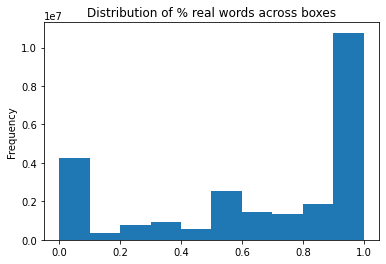

In [126]:
import matplotlib.pyplot as plt 
df.is_enchant_word_ntrue_perc.plot.hist()
plt.title('Distribution of % real words across boxes')

In [122]:
df.is_enchant_word_ntrue_perc.describe(percentiles=percentiles)

count    2.482455e+07
mean     6.598878e-01
std      3.768905e-01
min      0.000000e+00
0%       0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
20%      2.500000e-01
25%      3.750000e-01
30%      5.000000e-01
40%      6.666667e-01
50%      8.000000e-01
60%      9.651163e-01
70%      1.000000e+00
80%      1.000000e+00
90%      1.000000e+00
99%      1.000000e+00
100%     1.000000e+00
max      1.000000e+00
Name: is_enchant_word_ntrue_perc, dtype: float64

**analysis** 
* removing words with <0.25 true words removes 20% of the dataset boxes
* removing words with <0.50 true words removes 30% of the dataset boxes <-- that's not bad really
* removing words with <0.80 true words removes 50% of the dataset boxes <-- this is a bit stringent

In [124]:
df[df.is_enchant_word_ntrue_perc > 0.2].text_ascii.str.split().explode().value_counts()

.                         11003537
the                       10660884
of                         8832761
and                        6370037
in                         3988432
                            ...   
O.JOSOfeet                       1
risk-centered                    1
l\Iuskox                         1
.,....................           1
pebbly-sandy-mud                 1
Name: text_ascii, Length: 7763369, dtype: int64

**analysis**

the above isn't really helpful because I haven't removed any of the punct etc...


In [98]:
display(df[df.is_enchant_word_ntrue_perc < 0.2].text_ascii.iloc[0:20])
df[df.is_enchant_word_ntrue_perc < 0.2].text_ascii.iloc[-20:]

Unnamed: 0
1                         SL.\VE POI~T D,\ Tt:~\ PROJECT
7                                                   - ,.
42                                     A6 A6 A6 A6 A? A7
43                                                   - -
46                                         Illustrnttons
47                                          Facin~ pap;e
61                              Stringocephalus Zonation
88                                              --- - ,.
118                                  MA.C.KENZIE VALLE'(
119                                           CU\C.R()PS
121    G-\-\ T\.\t: R!\M '?~RT S G-t\f\ Cf\'W C:.A~C....
125                                                  t!O
128            ~.::mc;;~{-;;- ;;:xJ:mu::itoo\l A<"~'l.~~
132                                                    )
173                                                   '\
207                                              ,.. ,..
280                            (Kindle & Bosworth, 1921)
308                 

Unnamed: 0
1690               -2.12S6
1693               -0.S948
1694               -0.727S
1696               -2.S302
1697             - : .12 -
1711                    2S
1714            lS 2S 36.S
1715               -2.847S
1718               -------
1722            lS 2S 36.S
1735         4,978,193.68N
1753          (4,981,220.0
1754            661,230.0)
1796           NORTHJi\!GS
1811            NORT!IINGS
1820    WOLVES-WHITEH ORSE
1857          Conclu sions
1884          4,980,233.8N
1896          4,962,867.0N
1899         4,962,833.41N
Name: text_ascii, dtype: object

In [100]:
display(df[df.is_enchant_word_ntrue_perc < 0.8].text_ascii.iloc[0:20])
df[df.is_enchant_word_ntrue_perc < 0.8].text_ascii.iloc[-20:]

Unnamed: 0
0                                               ~s 1.51
1                        SL.\VE POI~T D,\ Tt:~\ PROJECT
3                          IXVESTIG..\TIO:\ or OUTCROPS
4                     RA.-\SCll and AS SOCI A TES; LTD.
5                                                   ~ .
6                                                  ,. .
7                                                  - ,.
10                           SLAVE POI~T DATU~ PRO JECT
12                          INV ESTIGATION OP OUTCRO PS
13                                   Tnblc of Con tents
14    Probl ~m and Objective Stra ti~rnuhic 9ound~ri...
15    Hare Indian Formation Fort Good P.ope Format i...
16                       Fa unal zones and AssemblaR"es
18    String ocephalus Zones Cyr tina pand a Zone Po...
20                                     Ladji a Lad ji a
21                            l and esi Zone ( n. sp. )
23                                 11 Slave Point" Zone
24        Spinatrypa horn ensis Zone 

Unnamed: 0
1884                                         4,980,233.8N
1885                                          66 5,610.7E
1886                                  Calcula t ed values
1887                                    4,980 , 196 . 22N
1888                                         665,590 .07E
1889                                         Differ ences
1893                                             42.87m .
1895                               Puhlished NBEPC values
1896                                         4,962,867.0N
1897                                         675,338 . 2E
1899                                        4,962,833.41N
1900                                        675 ,108 .60E
1905                                           232 .04m .
1906    It was th ese errors that r esult ed in the re...
1908                                               - 17 -
1911                                        ComDev Marine
1912    Head Office: P. 0 . Box 8508, Ottawa, Ontario,...
191

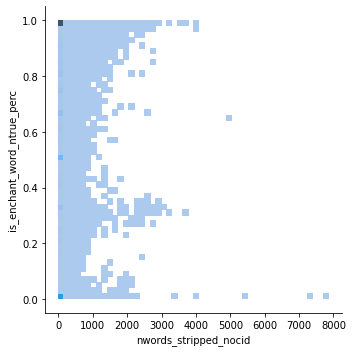

In [104]:
import seaborn as sns
sns.displot(df, x='nwords_stripped_nocid', y='is_enchant_word_ntrue_perc', bins=50)

**analyis** 
* many words have spacing issues (punct in the middle of a word, word split by arbitrary punct)
* 

In [108]:
punct = re.escape(string.punctuation)
print(punct)

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [113]:
res = vocab_real_ascii.reset_index()
res['text_nopunct'] = res.text_ascii_split.str.replace(f'[{punct}]', ' ').str.strip()

<ipython-input-113-165f0a6ad07e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  res['text_nopunct'] = res.text_ascii_split.str.replace(f'[{punct}]', ' ').str.strip()


In [116]:
res = res[res.text_nopunct != '']

In [118]:
import enchant
display(enchant.list_languages())
d = enchant.Dict("en")

res['text_nopunct_split'] = res.text_nopunct.str.split()
res = res.explode(column='text_nopunct_split')
res = res.groupby('text_nopunct_split').agg({'count':'sum'})
res
#

['en_US', 'en', 'en_AU', 'en_CA', 'en_GB']

<ipython-input-118-32a139968e50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['text_nopunct_split'] = res.text_nopunct.str.split()


,count
text_nopunct_split,
0,6.490632e+09
00,1.428248e+08
000,3.275829e+07
0000,8.240300e+05
00000,1.481500e+04
...,...
zzzzzzz,1.000000e+00
zzzzzzzzeeeeee,1.000000e+00
zzzzzzzzzzzZ,1.000000e+00


**analysis** this vocab isn't definitive, but basically what we've done is to strip punct and split words to try to see how many of the character words aren't real ones (are there real scientific words that they miss
(note: 3.2M words this way)

In [120]:
res = res.reset_index()
res['is_enchant_word'] = res.reset_index().text_nopunct_split.progress_apply(lambda x: d.check(x))
res

100%|██████████| 3253574/3253574 [04:24<00:00, 12306.52it/s]


,text_nopunct_split,count,is_enchant_word
0,0,6.490632e+09,True
1,00,1.428248e+08,True
2,000,3.275829e+07,True
3,0000,8.240300e+05,True
4,00000,1.481500e+04,True
...,...,...,...
3253569,zzzzzzz,1.000000e+00,False
3253570,zzzzzzzzeeeeee,1.000000e+00,False
3253571,zzzzzzzzzzzZ,1.000000e+00,False
3253572,zzzzzzzzzzzz,1.000000e+00,False


In [130]:
res.is_enchant_word.value_counts()

False    2724447
True      529127
Name: is_enchant_word, dtype: int64

**analysis** out of a vocab of 3.2M words, there are only 500k real words in the vocab, with 270k not real words.

In [132]:
res[res.is_enchant_word].iloc[100:200,:]

,text_nopunct_split,count,is_enchant_word
123,00000101,1.0,True
124,00000102,1.0,True
125,00000103,1.0,True
126,00000104,1.0,True
127,00000105,1.0,True
...,...,...,...
221,0000092,1.0,True
222,00000923,4.0,True
223,00000931,1.0,True
224,00000937,1.0,True


**analysis** a bunch of the "real" words are just numbers. Let's get rid of them

In [134]:
res['is_numeric'] = res.text_nopunct_split.progress_apply(lambda x: x.isnumeric())
res

100%|██████████| 3253574/3253574 [00:04<00:00, 736006.71it/s]


,text_nopunct_split,count,is_enchant_word,is_numeric
0,0,6.490632e+09,True,True
1,00,1.428248e+08,True,True
2,000,3.275829e+07,True,True
3,0000,8.240300e+05,True,True
4,00000,1.481500e+04,True,True
...,...,...,...,...
3253569,zzzzzzz,1.000000e+00,False,False
3253570,zzzzzzzzeeeeee,1.000000e+00,False,False
3253571,zzzzzzzzzzzZ,1.000000e+00,False,False
3253572,zzzzzzzzzzzz,1.000000e+00,False,False


In [137]:
res[~res['is_numeric']].is_enchant_word.value_counts()

False    2724382
True      110442
Name: is_enchant_word, dtype: int64

**analysis** only 2.8M non numeric words, only 110K real words

In [146]:
display(res[~res['is_numeric'] & res.is_enchant_word].iloc[319:400])

res_non_numbers = res[~res['is_numeric'] & res.is_enchant_word].iloc[320:]

,text_nopunct_split,count,is_enchant_word,is_numeric
696374,9th,2.003900e+04,True,False
696655,A,1.624855e+09,True,False
700333,AA,6.440090e+05,True,False
700438,AAA,2.874000e+03,True,False
700591,AAH,3.000000e+00,True,False
...,...,...,...,...
701580,ABSORPTION,2.256000e+03,True,False
701599,ABSTRACT,8.082700e+04,True,False
701601,ABSTRACTED,1.000000e+00,True,False
701603,ABSTRACTING,4.000000e+00,True,False


In [148]:
res_non_numbers.shape

(110122, 5)

**analysis** there are exactly 320 numbers still left "3rd" etc. (110K "real words" total)

In [151]:
res_non_numbers['text_nopunct_split_lowered'] = res_non_numbers.text_nopunct_split.str.lower()
res_really_non_numbers = res_non_numbers.groupby('text_nopunct_split_lowered').agg({'count': 'sum'})
res_really_non_numbers = pd.merge(res_really_non_numbers, res_non_numbers.set_index('text_nopunct_split')[['is_enchant_word', 'is_numeric']], right_index=True, left_index=True)
res_really_non_numbers

,count,is_enchant_word,is_numeric
a,1.477069e+10,True,False
aah,1.500000e+01,True,False
ab,8.195040e+05,True,False
aback,3.000000e+00,True,False
abacus,5.600000e+01,True,False
...,...,...,...
zoophytes,5.100000e+01,True,False
zooplankton,4.270000e+02,True,False
zoos,1.600000e+01,True,False
zoster,3.000000e+00,True,False


In [156]:
res_really_non_numbers.sort_values('count')

,count,is_enchant_word,is_numeric
lightface,1.000000e+00,True,False
healthily,1.000000e+00,True,False
healers,1.000000e+00,True,False
headwaiter,1.000000e+00,True,False
headstrong,1.000000e+00,True,False
...,...,...,...
of,5.564012e+09,True,False
r,7.199804e+09,True,False
t,1.008842e+10,True,False
a,1.477069e+10,True,False


In [159]:
res_really_non_numbers[res_really_non_numbers['count']>1].sort_values('count')

,count,is_enchant_word,is_numeric
complacently,2.000000e+00,True,False
imperialism,2.000000e+00,True,False
aspersions,2.000000e+00,True,False
retractions,2.000000e+00,True,False
cabinetry,2.000000e+00,True,False
...,...,...,...
of,5.564012e+09,True,False
r,7.199804e+09,True,False
t,1.008842e+10,True,False
a,1.477069e+10,True,False


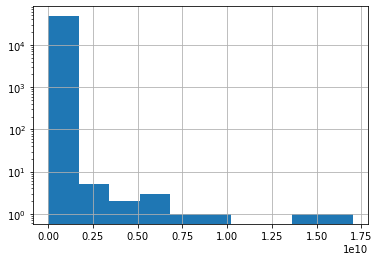

In [155]:
res_really_non_numbers['count'].hist()
plt.yscale('log')

**analysis** there are actually only 47k unique non numeric real words in the dataset (this is excluding numbers and 3rd type numbers). it also removes all punctuation

*caveats*
* it excludes word parts (Spa nish would have been treated as two separate tokens or discarded)
* it excludes all geological words that might not be in enchant's vocab (CHECK THIS)

Note that some "real words" do appear only once and very real words (complacently, imperialism etc) appear twice.

In [161]:
geological_words_1 = """Mississippian	Pennsylvanian
Hadean	Archean
Eoarchean	Paleoarchean
Ash	Volcano
Flood	River
Landslide	Earthquake
Wave	Tsunami
Wave	Earthquake
Argillic	Alteration
Calcsilicate	Alteration
Carbonate	Alteration
Chloritic	Alteration
Cobalt	Chrome
Cobalt	Silver
Copper	Molybdenum
Copper	Gold
Gold	Silver
Greisen	Alteration
Iron	Hematite
Iron 	Magnetite
Laterite	Weathering
Lead	Zinc
Nickel	Copper
Platinum	Palladium
Potassic	Alteration
Proven	Probable
Reserve	Resource
Sericite	Alteration
Vein	Hydrothermal
Nickel	Sulphide
Nickel	Sulfide
Albite	Oligoclase
Albite	Anorthite
Almandite	Spessartine
Biotite	Mica
Bladed	Acicular
Calcsilicate	Carbonate
Diopside	Augite
Enstatite	Pigeonite
Equant	Isotropic
Euhedral	Subhedral
Ferruginous	Iron
Forsterite	Fayalite
Hematite	Magnetite
Hypersthene	Ferrosilite
Muscovite	Mica
Olivine	Serpentine
Oscillatory 	Zoning
Pyrite 	Pyrrhotite
Resorbed	Rounded
Sulphide	Sulfide
Anorthosite	Troctolite
Arc	Magmatism
Arc	Subduction
Basalt	Diabase
Basalt	Trachyte
Crystal	Tuff
Diorite	Gabbro
Gabbro	Norite
Granite	Granitoid
Hydrothermal	Vent
Komatiite	Basalt
Laccolith	Flat
Lava	Melt
Lherzolite	Harzburgite
Lopolith	Flat
Megacryst	Coarse
Monzogranite	Syenogranite
Olivine	Pyroxene
Olivine	Cumulate
Pahoehoe	Lava
Peridotite	Gabbro
Peridotite	Pyroxenite
Phenocryst	Coarse
Phonolite	Tephrite
Rhyolite 	Dacite
Ridge	Volcanism
Subaerial	Surface
Subaqueous	Water
Syenite	Monzonite
Tonalite	Granodiorite
Trachytic	Flow
Ultramafic 	Mafic
Vesicular	Volcanic
Xenolith	Inclusion
Dyke	Dike
Sill	Dyke
Sill	Dike
Auerole	Intrusion
Basalt	Amphibolite
Basalt	Zeolite
Blueschist 	Eclogite
Charnokite	Enderbite
Granite	Gneiss
Granulite	Charnokite
Greenschist	Amphibolite
Indurated	Hard
Marble	Limestone
Porphyroblast	Coarse
Sandstone	Quarzite
Sanidinite	Hornfels
Slate	Phyllite
Abrasion 	Erosion
Angular	Subangular
Arenite	Wacke
Bedding	Layering
Boulder	Cobble
Breccia	Conglomerate
Cementation	Deposition
Compaction	Burial
Conglomerate	Sandstone
Coquine	Chalk
Exfoliation	Weathering
Glacial	Diamictite
Hydrolysis	Weathering
Limestone	Dolostone
Lithic	Rock
Marine	Shale
Mud	Clay
Pelitic	Aluminim
Petroleum	Oil
Porosity	Space
Quartz	Chert
River	Sandstone
Salt	Diapir
Sandstone	Wacke
Sandstone	Arkose
Shale	Slate
Silica	Radiolarian
Strata	Stratigraphy
Supergroup	Group
Unconsolidated	Loose
Sandstone	Psammite
Sandstone	Arenite
Arcuate	Curved
Bedding	Foliation
Breccia	Gouge
Buttress	Contact
Cataclasite	Mylonite
Cleavage	Foliation
Deformed	Folded
Fault	Shear
Graben	Fault
Horst	Fault
Joint	Fracture
Planar	Sheet
Plastic	Ductile
Plate	Tectonics
Prolate	Oblate
Ribbon	Thin
Rod	Lineation
Shale	Cleavage
Slate	Cleavage
Slickenline	Lineation
Stretching	Elongation
Enveloped	Rimmed
Diamond	Slave
Gold	Abitibi
Nickel	Sudbury
Uranium	Athabasca
Abitibi	Ontario
Abitibi	Quebec
Athabasca	Saskatchewan
Flin Flon 	Manitoba
Porphyry	Cordillera
Raglan	Quebec
Sudbury	Ontario"""
geological_words_1 = geological_words_1.split()
geological_words_1

['Mississippian',
 'Pennsylvanian',
 'Hadean',
 'Archean',
 'Eoarchean',
 'Paleoarchean',
 'Ash',
 'Volcano',
 'Flood',
 'River',
 'Landslide',
 'Earthquake',
 'Wave',
 'Tsunami',
 'Wave',
 'Earthquake',
 'Argillic',
 'Alteration',
 'Calcsilicate',
 'Alteration',
 'Carbonate',
 'Alteration',
 'Chloritic',
 'Alteration',
 'Cobalt',
 'Chrome',
 'Cobalt',
 'Silver',
 'Copper',
 'Molybdenum',
 'Copper',
 'Gold',
 'Gold',
 'Silver',
 'Greisen',
 'Alteration',
 'Iron',
 'Hematite',
 'Iron',
 'Magnetite',
 'Laterite',
 'Weathering',
 'Lead',
 'Zinc',
 'Nickel',
 'Copper',
 'Platinum',
 'Palladium',
 'Potassic',
 'Alteration',
 'Proven',
 'Probable',
 'Reserve',
 'Resource',
 'Sericite',
 'Alteration',
 'Vein',
 'Hydrothermal',
 'Nickel',
 'Sulphide',
 'Nickel',
 'Sulfide',
 'Albite',
 'Oligoclase',
 'Albite',
 'Anorthite',
 'Almandite',
 'Spessartine',
 'Biotite',
 'Mica',
 'Bladed',
 'Acicular',
 'Calcsilicate',
 'Carbonate',
 'Diopside',
 'Augite',
 'Enstatite',
 'Pigeonite',
 'Equant',
 'I

In [162]:
geo_words_df = pd.DataFrame({'words': geological_words_1})
geo_words_df['is_enchant_word'] = geo_words_df.words.apply(lambda x: d.check(x))
geo_words_df

,words,is_enchant_word
0,Mississippian,True
1,Pennsylvanian,True
2,Hadean,False
3,Archean,True
4,Eoarchean,False
...,...,...
330,Cordillera,True
331,Raglan,True
332,Quebec,True
333,Sudbury,False


In [164]:
geo_words_df.is_enchant_word.value_counts(normalize=True)

True     0.591045
False    0.408955
Name: is_enchant_word, dtype: float64

**analysis** YIKES! enchant won't recognize about 40% of the geology words in this subset! 
This means we need to go hunting for real geology words in the "not real words" set 

In [166]:
res[~res.is_enchant_word & ~res.is_numeric]

,text_nopunct_split,count,is_enchant_word,is_numeric
45,0000000000000000vvV,1.0,False,False
55,00000000000NOOO,1.0,False,False
58,000000000C,1.0,False,False
59,000000000w000000000000,1.0,False,False
71,00000000E,1.0,False,False
...,...,...,...,...
3253569,zzzzzzz,1.0,False,False
3253570,zzzzzzzzeeeeee,1.0,False,False
3253571,zzzzzzzzzzzZ,1.0,False,False
3253572,zzzzzzzzzzzz,1.0,False,False


**analysis** of the 2.7M "not real words", a bunch of them are garbage... what about those that appear more than once?

In [171]:
res[~res.is_enchant_word & ~res.is_numeric & (res['count'] > 1)]

,text_nopunct_split,count,is_enchant_word,is_numeric
85,0000000E,3.0,False,False
229,00000E,40.0,False,False
321,0000193z,2.0,False,False
323,00001C1,2.0,False,False
954,0000E,229.0,False,False
...,...,...,...,...
3253557,zzy,12.0,False,False
3253558,zzz,24.0,False,False
3253563,zzzz,4.0,False,False
3253566,zzzzz,2.0,False,False


In [172]:
res['contains_number'] = res.text_nopunct_split.str.contains('[0-9]')

In [175]:
res[res.contains_number]

,text_nopunct_split,count,is_enchant_word,is_numeric,contains_number
0,0,6.490632e+09,True,True,True
1,00,1.428248e+08,True,True,True
2,000,3.275829e+07,True,True,True
3,0000,8.240300e+05,True,True,True
4,00000,1.481500e+04,True,True,True
...,...,...,...,...,...
3253542,zzo1,1.000000e+00,False,False,True
3253543,zzo1za,1.000000e+00,False,False,True
3253554,zzt10,1.000000e+00,False,False,True
3253559,zzz1,1.000000e+00,False,False,True


In [174]:
res[~res.is_enchant_word & ~res.is_numeric & (res['count'] > 1) & (~res['contains_number'])]

,text_nopunct_split,count,is_enchant_word,is_numeric,contains_number
700442,AAAA,152.0,False,False,False
700443,AAAAA,22.0,False,False,False
700444,AAAAAA,25.0,False,False,False
700445,AAAAAAA,11.0,False,False,False
700446,AAAAAAAA,16.0,False,False,False
...,...,...,...,...,...
3253557,zzy,12.0,False,False,False
3253558,zzz,24.0,False,False,False
3253563,zzzz,4.0,False,False,False
3253566,zzzzz,2.0,False,False,False


**analysis** 970k not real words appear > 1 time. But a bunch of these are garbage because they contain numbers. So onyl 783k are just letters

In [177]:
res2 = res.copy()
res2['text_nopunct_split'] = res2['text_nopunct_split'].str.lower()
res2 = res2.groupby('text_nopunct_split').agg({'count': 'sum'})
res2 = pd.merge(res.drop(columns=['count']), res2, on='text_nopunct_split')
res2

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count
0,0,True,True,True,6.490632e+09
1,00,True,True,True,1.428248e+08
2,000,True,True,True,3.275829e+07
3,0000,True,True,True,8.240300e+05
4,00000,True,True,True,1.481500e+04
...,...,...,...,...,...
1668005,zzzzzzjzzzzzzzz,False,False,False,1.000000e+00
1668006,zzzzzzz,False,False,False,1.000000e+00
1668007,zzzzzzzzeeeeee,False,False,False,1.000000e+00
1668008,zzzzzzzzzzzz,False,False,False,2.000000e+00


In [180]:
res3 = res2[~res2.is_enchant_word & ~res2.is_numeric & (res2['count'] > 1) & (~res2['contains_number'])]
res3

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count
533693,aa,False,False,False,693030.0
533717,aaa,False,False,False,3228.0
533722,aaaa,False,False,False,228.0
533724,aaaaa,False,False,False,29.0
533725,aaaaaa,False,False,False,31.0
...,...,...,...,...,...
1667997,zzz,False,False,False,68.0
1668001,zzzz,False,False,False,7.0
1668003,zzzzz,False,False,False,3.0
1668004,zzzzzz,False,False,False,14.0


**analysis** With lowering, we're down to a vocab of 426k

In [204]:
res3['has_triple_letter'] = res3.text_nopunct_split.str.contains(r'(.)\1{2,}')

/opt/conda/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-204-56b14d508340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res3['has_triple_letter'] = res3.text_nopunct_split.str.contains(r'(.)\1{2,}')


In [207]:
res3.has_triple_letter.value_counts()
#res3['count'] > 1]

False    422918
True       3422
Name: has_triple_letter, dtype: int64

**analysis** dropping words with triple letters gives us 423k "not real words"

In [209]:
res3[(res3['count'] > 2) & (~res3.has_triple_letter)]#.iloc[1100:1200]

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count,has_triple_letter
533693,aa,False,False,False,693030.0,False
533763,aab,False,False,False,335.0,False
533766,aabboouutt,False,False,False,6.0,False
533777,aac,False,False,False,6647.0,False
533779,aaca,False,False,False,3.0,False
...,...,...,...,...,...,...
1667990,zzs,False,False,False,5.0,False
1667992,zzt,False,False,False,7.0,False
1667994,zzu,False,False,False,3.0,False
1667995,zzum,False,False,False,10.0,False


In [210]:
res3[(res3['count'] > 2) & (~res3.has_triple_letter)].iloc[1100:1200]

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count,has_triple_letter
537791,acanthotheca,False,False,False,3.0,False
537792,acanths,False,False,False,3.0,False
537801,acantlwceras,False,False,False,4.0,False
537808,acao,False,False,False,29.0,False
537813,acar,False,False,False,12.0,False
...,...,...,...,...,...,...
538268,accelerometrique,False,False,False,10.0,False
538269,accelerometriques,False,False,False,16.0,False
538270,accelerometro,False,False,False,9.0,False
538272,accelerorneter,False,False,False,3.0,False


**analysis** there are still definitely garbage words in the set wtihout triples that appear more than twice...

In [218]:
res3[(res3['count'] > 100) & (~res3.has_triple_letter)].iloc[6000:7000]

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count,has_triple_letter
653875,cany,False,False,False,285.0,False
653880,canying,False,False,False,278.0,False
653885,canyo,False,False,False,192.0,False
653913,cao,False,False,False,602691.0,False
653962,caoutchouc,False,False,False,6125.0,False
...,...,...,...,...,...,...
671713,chena,False,False,False,126.0,False
671723,chenal,False,False,False,24856.0,False
671739,chenaux,False,False,False,13746.0,False
671746,chene,False,False,False,2089.0,False


**analysis** but overall, most of the words that appear more than once and don't have tripples seem legit... lets see how many times our geology words appear in this dataset...

In [224]:
res3[res3.text_nopunct_split.isin(geo_words_df.words.str.lower())]['count'].describe(percentiles=percentiles)

count    1.220000e+02
mean     7.547291e+05
std      2.929064e+06
min      1.000000e+01
0%       1.000000e+01
1%       2.105000e+01
10%      1.173900e+03
20%      3.500000e+03
25%      5.833000e+03
30%      1.114380e+04
40%      2.601440e+04
50%      5.910700e+04
60%      1.094226e+05
70%      2.354539e+05
80%      5.230992e+05
90%      1.335891e+06
99%      1.432281e+07
100%     2.645850e+07
max      2.645850e+07
Name: count, dtype: float64

In [228]:
ff = res3[res3.text_nopunct_split.isin(geo_words_df.words.str.lower())]
ff[ff['count'] < 100]

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count,has_triple_letter
670404,charnokite,False,False,False,44.0,False
828870,eoarchean,False,False,False,20.0,False
1357255,quarzite,False,False,False,94.0,False
1444611,sanidinite,False,False,False,25.0,False
1477037,slickenline,False,False,False,10.0,False


**analysis** this is bad. there are some real geology words (in my test set) that appear only once. I can't fix this. 

In [237]:
import enchant
enchant.set_param("enchant.myspell.dictionary.path","/nrcan_p2/workspace/sraimondo/usr/share/hunspell")  
broker = enchant.Broker()
broker.describe()
#broker.list_languages()

[<Enchant: Ispell Provider>,
 <Enchant: Hspell Provider>,
 <Enchant: Myspell Provider>,
 <Enchant: Aspell Provider>]

In [238]:
import enchant
display(enchant.list_languages())
d_fr = enchant.request_dict("fr")

d_fr
#res3['is_enchant_fr_word'] = 

['en_US',
 'fr',
 'fr_BE',
 'fr_CA',
 'fr_CH',
 'fr_FR',
 'fr_LU',
 'en',
 'en_AU',
 'en_CA',
 'en_GB']

In [241]:
res3['is_enchant_fr_word'] = res3.text_nopunct_split.progress_apply(lambda x: d_fr.check(x))

100%|██████████| 426340/426340 [00:21<00:00, 20040.58it/s]
<ipython-input-241-9f954a49df77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res3['is_enchant_fr_word'] = res3.text_nopunct_split.progress_apply(lambda x: d_fr.check(x))


In [243]:
res3.is_enchant_fr_word.value_counts()

False    404224
True      22116
Name: is_enchant_fr_word, dtype: int64

In [244]:
res3[~res3.has_triple_letter & ~res3.is_enchant_fr_word]

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count,has_triple_letter,is_enchant_fr_word
533693,aa,False,False,False,693030.0,False,False
533763,aab,False,False,False,335.0,False,False
533766,aabboouutt,False,False,False,6.0,False,False
533768,aabbro,False,False,False,2.0,False,False
533770,aabe,False,False,False,2.0,False,False
...,...,...,...,...,...,...,...
1667990,zzs,False,False,False,5.0,False,False
1667992,zzt,False,False,False,7.0,False,False
1667994,zzu,False,False,False,3.0,False,False
1667995,zzum,False,False,False,10.0,False,False


**analysis** of the words without triple letters, 22k of them were legal french words, leaving 400k of non-french non-legal words without numbers and triple letters

In [245]:
res3[~res3.has_triple_letter & ~res3.is_enchant_fr_word].iloc[4000:5000]

,text_nopunct_split,is_enchant_word,is_numeric,contains_number,count,has_triple_letter,is_enchant_fr_word
545350,adinni,False,False,False,4.0,False,False
545353,adinole,False,False,False,36.0,False,False
545354,adinoles,False,False,False,12.0,False,False
545355,adinolitc,False,False,False,2.0,False,False
545357,adinolized,False,False,False,4.0,False,False
...,...,...,...,...,...,...,...
548308,aeri,False,False,False,112.0,False,False
548310,aeria,False,False,False,219.0,False,False
548312,aeriail,False,False,False,2.0,False,False
548325,aericite,False,False,False,3.0,False,False


**analysis** it doesn't look like there's a good way of detecting geology words from fake words...

Let's go back to finding good/better ways to drop punctuation. Question: should we drop punctuation mid sentence

In [251]:
vocab_real_ascii

,count
text_ascii_split,
!,5.801236e+09
!!,4.336826e+06
!!!,1.913520e+05
!!!!,6.825000e+03
!!!!!,2.097000e+03
...,...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,1.000000e+00


In [256]:
punct
display(vocab_real_ascii.reset_index())
n_punct_char = vocab_real_ascii.reset_index().text_ascii_split.str.count(f'[{punct}]')
n_punct_char

,text_ascii_split,count
0,!,5.801236e+09
1,!!,4.336826e+06
2,!!!,1.913520e+05
3,!!!!,6.825000e+03
4,!!!!!,2.097000e+03
...,...,...
6795103,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00
6795104,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00
6795105,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00
6795106,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00


0           1
1           2
2           3
3           4
4           5
           ..
6795103    66
6795104    67
6795105    68
6795106    76
6795107    73
Name: text_ascii_split, Length: 6795108, dtype: int64

In [257]:
vocab_real_ascii = vocab_real_ascii.reset_index()
vocab_real_ascii['n_punct_char'] = n_punct_char
vocab_real_ascii['n_punct_perc'] = vocab_real_ascii.n_punct_char / vocab_real_ascii.text_ascii_split.str.len()
#vocab_real_ascii.reset_index('text_ascii_split')
vocab_real_ascii

,text_ascii_split,count,n_punct_char,n_punct_perc
0,!,5.801236e+09,1,1.0
1,!!,4.336826e+06,2,1.0
2,!!!,1.913520e+05,3,1.0
3,!!!!,6.825000e+03,4,1.0
4,!!!!!,2.097000e+03,5,1.0
...,...,...,...,...
6795103,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00,66,1.0
6795104,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00,67,1.0
6795105,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00,68,1.0
6795106,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~...,1.000000e+00,76,1.0


<AxesSubplot:>

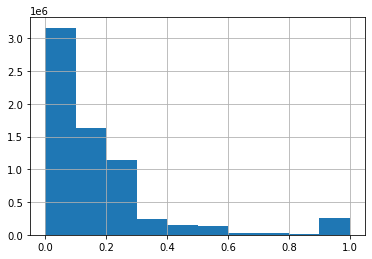

In [259]:
vocab_real_ascii.n_punct_perc.hist()

In [363]:
punct = re.escape(string.punctuation)
print(punct)
mid_text_illegal_punct = re.escape('!"#$%&\()*+,/:;<=>?@[\\]^_`{|}~') #text punctuation - no dash, ' or .
rstr = f'(?<=[a-zA-Z0-9]|[{punct}])[{mid_text_illegal_punct}]+(?=[a-zA-Z0-9]|[{punct}])'
print(rstr)
rstr2 = f'((?<=[a-zA-Z0-9][{punct}])[{punct}]+(?=[a-zA-Z0-9]))|((?<=[a-zA-Z0-9])[{punct}]+(?=[{punct}][a-zA-Z0-9]))'
print(rstr2)

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
(?<=[a-zA-Z0-9]|[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])[!"\#\$%\&\\\(\)\*\+,/:;<=>\?@\[\\\]\^_`\{\|\}\~]+(?=[a-zA-Z0-9]|[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])
((?<=[a-zA-Z0-9][!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+(?=[a-zA-Z0-9]))|((?<=[a-zA-Z0-9])[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+(?=[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~][a-zA-Z0-9]))


In [364]:
vocab_real_ascii['text_drop_mid_punct'] = vocab_real_ascii.text_ascii_split.str.replace(rstr, '')
vocab_real_ascii['text_drop_mid_punct'] = vocab_real_ascii.text_drop_mid_punct.str.replace(rstr2, '')

<ipython-input-364-ddc9e5fbc072>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_real_ascii['text_drop_mid_punct'] = vocab_real_ascii.text_ascii_split.str.replace(rstr, '')
<ipython-input-364-ddc9e5fbc072>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_real_ascii['text_drop_mid_punct'] = vocab_real_ascii.text_drop_mid_punct.str.replace(rstr2, '')


In [365]:
vocab_real_ascii[(vocab_real_ascii.n_punct_char > 2) & (vocab_real_ascii.n_punct_perc < 1.0)].sample(20) # & (vocab_real_ascii.n_punct_perc < 0.3)]


,text_ascii_split,count,n_punct_char,n_punct_perc,text_drop_mid_punct,text_drop_mid_punct_num_split,text_drop_mid_punct_brackets
5447224,l'6mporc..ry,1.0,3,0.250000,l'6mporcry,l'6mporcry,l'6mporcry
3617414,"No2*~'""':;;i",1.0,8,0.666667,No2i,No2:i,No2:i
3874791,"RHOW,VCB,VCS,TB1,TB2,TS1,TS2,PERBED,PERSUSP,WD...",1.0,12,0.187500,RHOWVCBVCSTB1TB2TS1TS2PERBEDPERSUSPWDIRCDIRSED...,RHOWVCBVCSTB1TB2TS1TS2PERBEDPERSUSPWDIRCDIRSED...,RHOWVCBVCSTB1TB2TS1TS2PERBEDPERSUSPWDIRCDIRSED...
5688031,mangane::;e,1.0,3,0.272727,manganee,manganee,manganee
4291636,WD-WNR(NWT)-WRB-SS-87-1,1.0,7,0.304348,WD-WNRNWT-WRB-SS-87-1,WD-WNRNWTWRB-SS-87 - 1,WD-WNRNWTWRB-SS-87-1
473914,"105-110,114,117,118",1.0,4,0.210526,105-110114117118,105 - 110114117118,105-110114117118
2226726,910.5-919.0,1.0,3,0.272727,910.5-919.0,910.5 - 919.0,910.5-919.0
6654838,up-to-the-west,1.0,3,0.214286,up-to-the-west,up-to-the-west,up-to-the-west
6485404,"t--""'~,~_~--;o-T=~~'-'-'-,0..,'~=--.---.-.'---...",1.0,53,0.868852,t-o-T-0.Ll'Tf,"t;o-T,0:L=l'Tf","t;o-T,0:L=l'Tf"
4986420,eniviloE-560S-KAB-80,1.0,3,0.150000,eniviloE-560S-KAB-80,eniviloE-560S-KAB-80,eniviloE-560S-KAB-80


In [366]:
vocab_real_ascii['text_drop_mid_punct_brackets'] = vocab_real_ascii.text_drop_mid_punct.str.replace('(\([^\)]+\))', ' \\1 ')

<ipython-input-366-fbd039c16023>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_real_ascii['text_drop_mid_punct_brackets'] = vocab_real_ascii.text_drop_mid_punct.str.replace('(\([^\)]+\))', ' \\1 ')


In [367]:
print(string.punctuation)
mid_num_punct = re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~""") 
mid_num_punct_r = f'(((?<=[0-9])(\+\-|\-\+)(?=[0-9]))|((?<=[0-9])[{mid_num_punct}](?=[0-9])))'
print(mid_num_punct_r)
vocab_real_ascii['text_drop_mid_punct_num_split'] = vocab_real_ascii.text_drop_mid_punct_brackets.str.replace(mid_num_punct_r, ' \\1 ')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
(((?<=[0-9])(\+\-|\-\+)(?=[0-9]))|((?<=[0-9])[!"\#\$%\&'\(\)\*\+,\-/:;<=>\?@\[\\\]\^_`\{\|\}\~](?=[0-9])))


<ipython-input-367-1951a230cd4c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  vocab_real_ascii['text_drop_mid_punct_num_split'] = vocab_real_ascii.text_drop_mid_punct_brackets.str.replace(mid_num_punct_r, ' \\1 ')


In [374]:
vocab_real_ascii[vocab_real_ascii.text_ascii_split != vocab_real_ascii.text_drop_mid_punct].sample(20)

,text_ascii_split,count,n_punct_char,n_punct_perc,text_drop_mid_punct,text_drop_mid_punct_num_split,text_drop_mid_punct_brackets
1655878,"53deg55'30""N",1.0,2,0.166667,53deg55'30N,53deg55 ' 30N,53deg55'30N
5113968,folt:1pathic,1.0,1,0.083333,folt1pathic,folt1pathic,folt1pathic
5771180,"n(,merous",1.0,2,0.222222,nmerous,nmerous,nmerous
3466857,"MD,U,TH",1.0,2,0.285714,MDUTH,MDUTH,MDUTH
5784405,n\tii`-9,20.0,3,0.375000,ntii-9,ntii-9,ntii-9
5270258,hydrothe]-mally,1.0,2,0.133333,hydrothe-mally,hydrothe-mally,hydrothe-mally
72111,*.*..*.*...*..**.*.**,1.0,21,1.000000,*...........*,*...........*,*...........*
868616,1:pv2,1.0,1,0.200000,1pv2,1pv2,1pv2
1439384,429/00,2.0,1,0.166667,42900,42900,42900
3318372,"KIRKHAH,R.V",2.0,2,0.181818,KIRKHAHR.V,KIRKHAHR.V,KIRKHAHR.V


125deg01'30W
Alleyne"Descriptions
2259E+01l

In [372]:
vocab_real_ascii[vocab_real_ascii.text_drop_mid_punct != vocab_real_ascii.text_drop_mid_punct_brackets].sample(20)

,text_ascii_split,count,n_punct_char,n_punct_perc,text_drop_mid_punct,text_drop_mid_punct_num_split,text_drop_mid_punct_brackets
41493,(![.),1.0,5,1.0,(.),(.),(.)
43580,().),144.0,4,1.0,(.),(.),(.)
44854,(.')(),1.0,6,1.0,(.'),(.'),(.')
42637,"('.""'.)",1.0,7,1.0,('.'.),('.'.),('.'.)
46364,(=-),1.0,4,1.0,(-),(-),(-)
44641,(-----),1.0,7,1.0,(-----),(-----),(-----)
46572,(?-),2.0,4,1.0,(-),(-),(-)
43926,"(*,.)",1.0,5,1.0,(.),(.),(.)
41429,(!.:'.?),1.0,8,1.0,(.'.),(.'.),(.'.)
44193,"(,()-()",1.0,7,1.0,(-),(-),(-)


In [373]:
vocab_real_ascii[vocab_real_ascii.text_drop_mid_punct_num_split != vocab_real_ascii.text_drop_mid_punct_brackets].sample(20)

,text_ascii_split,count,n_punct_char,n_punct_perc,text_drop_mid_punct,text_drop_mid_punct_num_split,text_drop_mid_punct_brackets
3323089,KZ-08-RL-7-C-E-1-5,4.0,7,0.388889,KZ-08-RL-7-C-E-1-5,KZ-08-RL-7-C-E-1 - 5,KZ-08-RL-7-C-E-1-5
2102318,80-230degC,2.0,1,0.100000,80-230degC,80 - 230degC,80-230degC
320908,08-09-?2,1.0,3,0.375000,08-09-2,08 - 09 - 2,08-09-2
5974924,p197-2,1.0,1,0.166667,p197-2,p197 - 2,p197-2
398324,"1-,,0011",1.0,3,0.375000,1-0011,1 - 0011,1-0011
257639,01-04-24.5,1.0,3,0.300000,01-04-24.5,01 - 04 - 24.5,01-04-24.5
757662,17-26-51,1.0,2,0.250000,17-26-51,17 - 26 - 51,17-26-51
770879,1749+-150,1.0,2,0.222222,1749-150,1749 - 150,1749-150
503850,11-31-38,1.0,2,0.250000,11-31-38,11 - 31 - 38,11-31-38
259876,01-49-50.5,1.0,3,0.300000,01-49-50.5,01 - 49 - 50.5,01-49-50.5


**analysis** we just added a couple new functions:
* removing punctuation that is surrounded by other punctuation or letters/numbers but is not - or . (which are legal)
* putting space around ()
* splitting numbers up 

There are a few negative outcomes with this, but it's not a huge deal, I think. 

In [430]:
vocab_real_ascii['tdmpb_split'] = vocab_real_ascii.text_drop_mid_punct_num_split.str.split().apply(lambda x: [xx.strip() for xx in x if xx.strip() != ''])
res = vocab_real_ascii[['tdmpb_split', 'count']].explode(column='tdmpb_split').groupby('tdmpb_split').agg({'count': 'sum'})

In [431]:
res

,count
tdmpb_split,
!,5.801236e+09
!!,4.566755e+06
"!""",1.759014e+06
!#,3.642000e+03
!$,9.924000e+03
...,...
~tmtm---------....-,1.000000e+00
~tm~,1.000000e+00
~{,1.001300e+04


In [432]:
res.sort_values('count')

,count
tdmpb_split,
P1QOUCTION,1.000000e+00
MAfROST,1.000000e+00
MAfSTlICHIIAN,1.000000e+00
MAfSmiCHTIAN,1.000000e+00
MAff_,1.000000e+00
...,...
*,4.787071e+10
(,8.623278e+10
-,4.559462e+11


**analysis** with the above processing, we end up with 5.4M words (much better!)

There are still some problems like ~tmtm------...-

In [434]:
res = res.reset_index()
punct = re.escape(string.punctuation)
res['is_all_punct'] = res.tdmpb_split.str.contains(f'^[{punct}]+$')
res

,tdmpb_split,count,is_all_punct
0,!,5.801236e+09,True
1,!!,4.566755e+06,True
2,"!""",1.759014e+06,True
3,!#,3.642000e+03,True
4,!$,9.924000e+03,True
...,...,...,...
5467037,~tmtm---------....-,1.000000e+00,False
5467038,~tm~,1.000000e+00,False
5467039,~{,1.001300e+04,True
5467040,~},1.241800e+04,True


In [435]:
res[~res.is_all_punct]

,tdmpb_split,count,is_all_punct
43,!'''Y*,1.0,False
72,!''deg*,1.0,False
102,!'--'deg,1.0,False
255,!'.deg'*,1.0,False
256,!'.deg),1.0,False
...,...,...,...
5467034,~tm',1.0,False
5467035,~tm),37.0,False
5467036,~tm-!,1.0,False
5467037,~tmtm---------....-,1.0,False


**analysis** only 30k words were actually all punctuation, there are a bunch more garbage ones though

In [437]:
res['punct_count'] = res.tdmpb_split.str.count(f'[{punct}]')
res['punct_perc'] = res.punct_count / res.tdmpb_split.str.len()

In [438]:
res

,tdmpb_split,count,is_all_punct,punct_count,punct_perc
0,!,5.801236e+09,True,1,1.000000
1,!!,4.566755e+06,True,2,1.000000
2,"!""",1.759014e+06,True,2,1.000000
3,!#,3.642000e+03,True,2,1.000000
4,!$,9.924000e+03,True,2,1.000000
...,...,...,...,...,...
5467037,~tmtm---------....-,1.000000e+00,False,15,0.789474
5467038,~tm~,1.000000e+00,False,2,0.500000
5467039,~{,1.001300e+04,True,2,1.000000
5467040,~},1.241800e+04,True,2,1.000000


In [439]:
res[res.punct_perc <= 0.5]

,tdmpb_split,count,is_all_punct,punct_count,punct_perc
269,!'EUR,1.0,False,2,0.4
270,!'EUR:,3.0,False,3,0.5
271,!'PS,7.0,False,2,0.5
274,!'SS,1.0,False,2,0.5
280,!'deg,9.0,False,2,0.4
...,...,...,...,...,...
5467031,~rr),1.0,False,2,0.5
5467032,~rrr@,1.0,False,2,0.4
5467034,~tm',1.0,False,2,0.5
5467035,~tm),37.0,False,2,0.5


In [440]:
res[res.punct_perc <= 0.5].sample(10)

,tdmpb_split,count,is_all_punct,punct_count,punct_perc
1973082,EPIDIO,1.0,False,0,0.000000
3151890,Tekai-Chetang,1.0,False,1,0.076923
788690,4.2293,1.0,False,1,0.166667
735140,360001,2.0,False,0,0.000000
2931550,RonER'rsoN,1.0,False,1,0.100000
3669557,congediai,3.0,False,0,0.000000
2816419,Pltosplate,1.0,False,0,0.000000
4506068,matianite,21.0,False,0,0.000000
1569200,Arachniograptu,1.0,False,0,0.000000
5319413,ttices,2.0,False,0,0.000000


**analysis** without removing punctuuation, we have still 5.4M non full punct words and a lot of garbage

In [441]:
#res['triple_letter'] = res.tdmpb_split.str.contains(r'(.)\1{2,}')
res['tdmpb_split_notriples'] = res.tdmpb_split.str.replace(r'((.)\2{2,})', r'\2').str.strip()

<ipython-input-441-2ef36cc065b8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  res['tdmpb_split_notriples'] = res.tdmpb_split.str.replace(r'((.)\2{2,})', r'\2').str.strip()


In [442]:
res2 = res.groupby('tdmpb_split_notriples').agg({'count': 'sum'})
res2 = pd.merge(res2, res.drop(columns=['count']), left_index=True, right_on='tdmpb_split_notriples', how='left')
res2

,count,tdmpb_split,is_all_punct,punct_count,punct_perc,tdmpb_split_notriples
0,5.801236e+09,!,True,1,1.000000,!
1,4.566755e+06,!!,True,2,1.000000,!!
2,1.759014e+06,"!""",True,2,1.000000,"!"""
3,3.642000e+03,!#,True,2,1.000000,!#
4,9.924000e+03,!$,True,2,1.000000,!$
...,...,...,...,...,...,...
5467037,1.000000e+00,~tmtm---------....-,False,15,0.789474,~tmtm-.-
5467038,1.000000e+00,~tm~,False,2,0.500000,~tm~
5467039,1.001300e+04,~{,True,2,1.000000,~{
5467040,1.241800e+04,~},True,2,1.000000,~}


**analysis** awkwardly, removing any triple characters doesn't reduce the vocab size. Those were all coming from unique words

In [443]:
res2['punct_count'] = res2.tdmpb_split.str.count(f'[{punct}]')
res2['punct_perc'] = res2.punct_count / res2.tdmpb_split.str.len()

In [444]:
res2

,count,tdmpb_split,is_all_punct,punct_count,punct_perc,tdmpb_split_notriples
0,5.801236e+09,!,True,1,1.000000,!
1,4.566755e+06,!!,True,2,1.000000,!!
2,1.759014e+06,"!""",True,2,1.000000,"!"""
3,3.642000e+03,!#,True,2,1.000000,!#
4,9.924000e+03,!$,True,2,1.000000,!$
...,...,...,...,...,...,...
5467037,1.000000e+00,~tmtm---------....-,False,15,0.789474,~tmtm-.-
5467038,1.000000e+00,~tm~,False,2,0.500000,~tm~
5467039,1.001300e+04,~{,True,2,1.000000,~{
5467040,1.241800e+04,~},True,2,1.000000,~}


In [450]:
res2[(res2.punct_perc < 0.5) & (res2['count'] > 1)]

,count,tdmpb_split,is_all_punct,punct_count,punct_perc,tdmpb_split_notriples
280,9.0,!'deg,False,2,0.400000,!'deg
678,3.0,!-deg,False,2,0.400000,!-deg
987,4.0,!EUR,False,1,0.250000,!EUR
989,264.0,!PS,False,1,0.333333,!PS
1014,2.0,!SSSS,False,1,0.200000,!S
...,...,...,...,...,...,...
5467008,4.0,~deg-,False,2,0.400000,~deg-
5467011,3.0,~deg.,False,2,0.400000,~deg.
5467018,3.0,~deg:,False,2,0.400000,~deg:
5467023,3.0,~deg~,False,2,0.400000,~deg~


In [456]:
res2[(res2.punct_perc <= 0.5) & (res2.punct_perc > 0.45)].sample(10)

,count,tdmpb_split,is_all_punct,punct_count,punct_perc,tdmpb_split_notriples
497877,2.0,2.9_,False,2,0.5,2.9_
3352858,2.0,_Q.2,False,2,0.5,_Q.2
3346487,1.0,_.Pl,False,2,0.5,_.Pl
4909066,1.0,r-o-r.cc-r._,False,6,0.5,r-o-r.cc-r._
3356896,1.0,_l.A,False,2,0.5,_l.A
3341788,1.0,_''--.--.-IH-4-f-l-IHlIHHlt-l-H-i.L.WJ,False,19,0.5,_''--.--.-IH-4-f-l-IHlIHHlt-l-H-i.L.WJ
4650697,1.0,o-LoC--_,False,4,0.5,o-LoC--_
7498,2.0,(PS\,False,2,0.5,(PS\
1955220,1.0,E-le-v._,False,4,0.5,E-le-v._
3349552,2.0,_9.Q,False,2,0.5,_9.Q


In [459]:
res2[(res2['count'] > 1) & (res2.punct_perc <= 0.5)].sample(10)

,count,tdmpb_split,is_all_punct,punct_count,punct_perc,tdmpb_split_notriples
3051916,1609.0,Sinotectirostrum,False,0,0.0,Sinotectirostrum
1784556,29.0,Canadai,False,0,0.0,Canadai
3604682,4776.0,chercher,False,0,0.0,chercher
1168579,2.0,660016,False,0,0.0,660016
1449712,2.0,96359,False,0,0.0,96359
3109966,22.0,Swinton,False,0,0.0,Swinton
5139304,10.0,southec.st,False,1,0.1,southec.st
5138127,3.0,soutenons,False,0,0.0,soutenons
848825,3.0,4489997,False,0,0.0,44897
2133550,306.0,Glaces,False,0,0.0,Glaces


**analysis** this is similar. 5.4M with punct < 0.5 -> 1.8M words that appear more than once!

now lets add our fancy processing back to our text boxes and see whether we can eliminate some bad ones...

In [463]:
punct = re.escape(string.punctuation)
print(punct)
mid_text_illegal_punct = re.escape('!"#$%&\()*+,/:;<=>?@[\\]^_`{|}~') #text punctuation - no dash, ' or .
rstr = f'(?<=[a-zA-Z0-9]|[{punct}])[{mid_text_illegal_punct}]+(?=[a-zA-Z0-9]|[{punct}])'
print(rstr)
rstr2 = f'((?<=[a-zA-Z0-9][{punct}])[{punct}]+(?=[a-zA-Z0-9]))|((?<=[a-zA-Z0-9])[{punct}]+(?=[{punct}][a-zA-Z0-9]))'
print(rstr2)


df['text_drop_mid_punct'] = df.text_ascii.str.replace(rstr, '')
df['text_drop_mid_punct'] = df.text_drop_mid_punct.str.replace(rstr2, '')
print('...doing brackets')
df['text_drop_mid_punct_brackets'] = df.text_drop_mid_punct.str.replace('(\([^\)]+\))', ' \\1 ')
mid_num_punct = re.escape("""!"#$%&'()*+,-/:;<=>?@[\]^_`{|}~""") 
mid_num_punct_r = f'(((?<=[0-9])(\+\-|\-\+)(?=[0-9]))|((?<=[0-9])[{mid_num_punct}](?=[0-9])))'
print('...doing nums')
df['text_drop_mid_punct_num_split'] = df.text_drop_mid_punct_brackets.str.replace(mid_num_punct_r, ' \\1 ')
df['tdmpb_split_notriples'] = df.text_drop_mid_punct_num_split.str.replace(r'((.)\2{2,})', r'\2').str.strip()
df['tdmpb_split_notriples'] = rm_dbl_space(df.tdmpb_split_notriples)



!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~
(?<=[a-zA-Z0-9]|[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])[!"\#\$%\&\\\(\)\*\+,/:;<=>\?@\[\\\]\^_`\{\|\}\~]+(?=[a-zA-Z0-9]|[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])
((?<=[a-zA-Z0-9][!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~])[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+(?=[a-zA-Z0-9]))|((?<=[a-zA-Z0-9])[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]+(?=[!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~][a-zA-Z0-9]))


<ipython-input-463-d21ad0eb1c5c>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_drop_mid_punct'] = df.text_ascii.str.replace(rstr, '')
<ipython-input-463-d21ad0eb1c5c>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_drop_mid_punct'] = df.text_drop_mid_punct.str.replace(rstr2, '')


...doing brackets


<ipython-input-463-d21ad0eb1c5c>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_drop_mid_punct_brackets'] = df.text_drop_mid_punct.str.replace('(\([^\)]+\))', ' \\1 ')


...doing nums


<ipython-input-463-d21ad0eb1c5c>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_drop_mid_punct_num_split'] = df.text_drop_mid_punct_brackets.str.replace(mid_num_punct_r, ' \\1 ')
<ipython-input-463-d21ad0eb1c5c>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tdmpb_split_notriples'] = df.text_drop_mid_punct_num_split.str.replace(r'((.)\2{2,})', r'\2').str.strip()
<ipython-input-85-207034e53195>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  return dfcol.str.replace('[^\S\n]+', ' ')


In [464]:
df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_4.parquet')

In [2]:
import pandas as pd
df = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_4.parquet')

In [3]:
df.sample(10)[['text', 'tdmpb_split_notriples']]

,text,tdmpb_split_notriples
Unnamed: 0,,
7120,"The same structural styles, metamorphic f...","The same structural styles, metamorphic facies..."
4392,(.llfacoun.) Canada. \n,(.llfacoun.) Canada.
110,The intrusives of the district include d...,"The intrusives of the district include dunite,..."
2454,B \n,B
20692,bedding\n,bedding
55157,F\n,F
637,When the bulrush zone occurs in shallow ...,When the bulrush zone occurs in shallow water ...
13737,Depth \n,Depth
21225,ZnO\n,ZnO


Now investigate whether the output overall is better or worse than before, and decide whether to drop certain boxes.

In [9]:
import re
import string
from tqdm import tqdm
tqdm.pandas()

punct = re.escape(string.punctuation)
df['punct_count'] = df.tdmpb_split_notriples.str.count(f'[{punct}]')
df['punct_perc'] = df.punct_count / df.tdmpb_split_notriples.str.len()
df['word_is_all_punct'] = df.tdmpb_split_notriples.str.split().progress_apply(lambda x: [True if re.match(f'^[{punct}]+$',xx) else False for xx in x])
#res2['punct_count'] = res2.tdmpb_split.str.count(f'[{punct}]')
#res2['punct_perc'] = res2.punct_count / res2.tdmpb_split.str.len()

100%|██████████| 25288289/25288289 [08:17<00:00, 50867.67it/s] 


In [10]:
#df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5.parquet')

In [11]:
import enchant
display(enchant.list_languages())
d = enchant.Dict("en")

df['is_enchant_word_tdm'] = df.tdmpb_split_notriples.progress_apply(lambda x: [d.check(xx) for xx in x.split()])
df['is_enchant_word_ntrue_tdm'] = df.is_enchant_word_tdm.progress_apply(lambda x: len([xx for xx in x if xx == True]))
df['nwords_stripped_tdm'] = df.tdmpb_split_notriples.str.split().str.len()
df['is_enchant_word_ntrue_perc_tdm'] = df.is_enchant_word_ntrue_tdm / df.nwords_stripped_tdm

#df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5.parquet')

['en_US', 'en', 'en_AU', 'en_CA', 'en_GB']

100%|██████████| 25288289/25288289 [00:59<00:00, 424024.25it/s]


In [76]:
df['space_count'] = df.tdmpb_split_notriples.str.count(f'\s')
df['space_perc'] = df.space_count / df.tdmpb_split_notriples.str.len()

In [92]:
df['letter_count'] = df.tdmpb_split_notriples.str.count(f'[a-zA-Z]')
df['letter_perc'] = df.letter_count / df.tdmpb_split_notriples.str.len()
df['num_count'] = df.tdmpb_split_notriples.str.count(f'[0-9]')
df['num_perc'] = df.num_count / df.tdmpb_split_notriples.str.len()

In [94]:
df['word_letter_num'] = df.tdmpb_split_notriples.str.split().progress_apply(lambda x: [len(re.findall('[a-zA-Z]', xx)) for xx in x])
df['word_letter_perc'] = df.tdmpb_split_notriples.str.split().progress_apply(lambda x: [len(re.findall('[a-zA-Z]', xx))/float(len(xx)) for xx in x])

100%|██████████| 25288289/25288289 [11:35<00:00, 36367.64it/s] 


In [95]:
df.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5.parquet')

In [1]:
import pandas as pd
df = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5.parquet')

In [13]:
df.head()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,text_drop_mid_punct_brackets,text_drop_mid_punct_num_split,tdmpb_split_notriples,punct_count,punct_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,252.73,774.7300,338.896600,793.2065,~s 1.51 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,86.166600,...,~s 1.51,~s 1.51,~s 1.51,2,0.285714,"[False, False]","[False, True]",1,2,0.500000
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,162.99,560.5981,351.490061,572.5393,"SL.\VE · POI~T D,\ Tt:~\ PROJECT \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,188.500061,...,SL.VE POIT D\ Tt\ PROJECT,SL.VE POIT D\ Tt\ PROJECT,SL.VE POIT D\ Tt\ PROJECT,3,0.120000,"[False, False, False, False, False]","[False, False, False, False, True]",1,5,0.200000
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,141.37,524.1281,191.928100,536.0693,PHASE I \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,50.558100,...,PHASE I,PHASE I,PHASE I,0,0.000000,"[False, False]","[True, True]",2,2,1.000000
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,207.76,522.8912,397.459655,541.1936,IXVESTIG..\TIO:\ or OUTCROPS \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,189.699655,...,IXVESTIGTIO\ or OUTCROPS,IXVESTIGTIO\ or OUTCROPS,IXVESTIGTIO\ or OUTCROPS,1,0.041667,"[False, False, False]","[False, True, True]",2,3,0.666667
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,162.91,486.9281,365.388683,498.8693,RA.-\SCll and AS SOCI A TES; LTD. \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,202.478683,...,RASCll and AS SOCI A TES; LTD.,RASCll and AS SOCI A TES; LTD.,RASCll and AS SOCI A TES; LTD.,2,0.066667,"[False, False, False, False, False, False, False]","[False, True, True, False, True, False, True]",4,7,0.571429


In [17]:
print(df.shape)
res = df[df.is_enchant_word_ntrue_perc_tdm == 0]
res

(25288289, 33)


,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,text_drop_mid_punct_brackets,text_drop_mid_punct_num_split,tdmpb_split_notriples,punct_count,punct_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
7,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,475.61,-0.756800,492.461440,13.57760,"- ,. \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,16.851440,...,"- ,.","- ,.","- ,.",3,0.750000,"[True, True]","[False, False]",0,2,0.0
42,<class 'pdfminer.layout.LTTextBoxHorizontal'>,2.0,399.58,617.995000,417.831880,704.62520,A6 \nA6 \nA6 \nA6 \nA? \nA7 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,18.251880,...,A6 A6 A6 A6 A? A7,A6 A6 A6 A6 A? A7,A6 A6 A6 A6 A? A7,1,0.058824,"[False, False, False, False, False, False]","[False, False, False, False, False, False]",0,6,0.0
43,<class 'pdfminer.layout.LTTextBoxHorizontal'>,2.0,380.51,-22.346822,403.038845,33.89969,-\n-\n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,22.528845,...,- -,- -,- -,2,0.666667,"[True, True]","[False, False]",0,2,0.0
46,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,218.04,711.102400,316.913082,725.38720,Illustrnttons \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,98.873082,...,Illustrnttons,Illustrnttons,Illustrnttons,0,0.000000,[False],[False],0,1,0.0
47,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,433.68,688.020000,518.359200,702.35720,Facin~ pap;e \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,84.679200,...,Facin~ pape,Facin~ pape,Facin~ pape,1,0.090909,"[False, False]","[False, False]",0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,<class 'pdfminer.layout.LTTextBoxHorizontal'>,57.0,25.17,375.219600,129.611537,387.71880,WOLVES-WHITEH ORSE \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,104.441537,...,WOLVES-WHITEH ORSE,WOLVES-WHITEH ORSE,WOLVES-WHITEH ORSE,1,0.055556,"[False, False]","[False, False]",0,2,0.0
1857,<class 'pdfminer.layout.LTTextBoxHorizontal'>,58.0,82.44,648.678100,151.768730,660.61930,Conclu sions \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,69.328730,...,Conclu sions,Conclu sions,Conclu sions,0,0.000000,"[False, False]","[False, False]",0,2,0.0
1884,<class 'pdfminer.layout.LTTextBoxHorizontal'>,59.0,286.27,566.489600,362.049917,578.98880,"4,980,233.8N \n",/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,75.779917,...,4980233.8N,4980233.8N,4980233.8N,1,0.100000,[False],[False],0,1,0.0


**analysis** Of the 25M rows in the dataset, 3M of them do not contain a single legal english word (excepting of course unknown words in the vocab)

In [19]:
res.sample(10)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,text_drop_mid_punct_brackets,text_drop_mid_punct_num_split,tdmpb_split_notriples,punct_count,punct_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10958,<class 'pdfminer.layout.LTTextBoxHorizontal'>,291.0,307.2092,602.092950,321.037400,612.276450,(4) \n,/nrcan_p2/data/02_intermediate/119797.pdfminer...,119797,13.828200,...,(4),(4),(4),2,0.666667,[False],[False],0,1,0.0
226,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8.0,387.5997,181.922175,463.191700,191.314675,des Bchantillons \n,/nrcan_p2/data/02_intermediate/123596.pdfminer...,123596,75.592000,...,des Bchantillons,des Bchantillons,des Bchantillons,0,0.000000,"[False, False]","[False, False]",0,2,0.0
879,<class 'pdfminer.layout.LTTextBoxHorizontal'>,9.0,376.4976,528.493600,378.936400,534.504800,' \n,/nrcan_p2/data/02_intermediate/8545.pdfminer_s...,8545,2.438800,...,',',',1,1.000000,[True],[False],0,1,0.0
3530,<class 'pdfminer.layout.LTTextBoxHorizontal'>,112.0,297.8236,364.759300,312.128164,376.434900,", ,/ \n",/nrcan_p2/data/02_intermediate/20201117/geosca...,129342,14.304564,...,", ,/",", ,/",", ,/",3,0.750000,"[True, True]","[False, False]",0,2,0.0
3277,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,39.8119,364.971000,152.772000,376.465800,"Frog-Raven, Gitenmaks) \n",/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,112.960100,...,"Frog-Raven, Gitenmaks)","Frog-Raven, Gitenmaks)","Frog-Raven, Gitenmaks)",3,0.136364,"[False, False]","[False, False]",0,2,0.0
897,<class 'pdfminer.layout.LTTextBoxHorizontal'>,22.0,439.2600,323.030220,478.209678,341.637600,BAHR\n,/nrcan_p2/data/02_intermediate/216215.pdfminer...,216215,38.949678,...,BAHR,BAHR,BAHR,0,0.000000,[False],[False],0,1,0.0
18084,<class 'pdfminer.layout.LTTextBoxHorizontal'>,623.0,186.6515,396.758900,254.429239,406.021700,RJ:;FERENCES\n,/nrcan_p2/data/02_intermediate/102480.pdfminer...,102480,67.777739,...,RJFERENCES,RJFERENCES,RJFERENCES,0,0.000000,[False],[False],0,1,0.0
5582,<class 'pdfminer.layout.LTTextBoxHorizontal'>,43.0,985.5501,415.652179,996.954104,421.894695,_ t_ \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,101734,11.404004,...,_ t_,_ t_,_ t_,2,0.500000,"[True, False]","[False, False]",0,2,0.0
7950,<class 'pdfminer.layout.LTTextBoxHorizontal'>,99.0,403.8731,690.695200,405.417272,698.093600,'.\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,119609,1.544172,...,'.,'.,'.,2,1.000000,[True],[False],0,1,0.0


In [25]:
row = res[(res.pg == 167) & (res.index==3277)].iloc[0]
display(row.pg)
df[(df.pg == row.pg) & (df.file == row.file)]

167.0

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,text_drop_mid_punct_brackets,text_drop_mid_punct_num_split,tdmpb_split_notriples,punct_count,punct_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3260,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,180.5900,606.6996,198.025684,619.1988,159 \n,/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,17.435684,...,159,159,159,0,0.000000,[False],[True],1,1,1.000000
3261,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,167.8000,587.3017,212.732721,598.1917,The Wolf \n,/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,44.932721,...,The Wolf,The Wolf,The Wolf,0,0.000000,"[False, False]","[True, True]",2,2,1.000000
3262,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,21.2700,561.0549,358.407900,582.6197,"The Wolf, Keebu, six times repeated (Arhtee...",/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,337.137900,...,"The Wolf, Keebu, six times repeated (Arhteeh, ...","The Wolf, Keebu, six times repeated (Arhteeh, ...","The Wolf, Keebu, six times repeated (Arhteeh, ...",13,0.092199,"[False, False, False, False, False, False, Fal...","[True, False, False, True, True, True, False, ...",9,18,0.500000
3263,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,41.1691,551.2149,149.842020,562.7132,"erhs, Wolf, Gitwinlkul). \n",/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,108.672920,...,"erhs, Wolf, Gitwinlkul.","erhs, Wolf, Gitwinlkul.","erhs, Wolf, Gitwinlkul.",3,0.130435,"[False, False, False]","[False, False, False]",0,3,0.000000
3264,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,20.7900,531.0515,357.904670,552.6197,"The Wolf, twice or thrice repeated (Willits a...",/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,337.114670,...,"The Wolf, twice or thrice repeated (Willits an...","The Wolf, twice or thrice repeated (Willits an...","The Wolf, twice or thrice repeated (Willits an...",13,0.088435,"[False, False, False, False, False, False, Fal...","[True, False, True, True, True, True, False, T...",7,18,0.388889
3265,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,21.0853,511.1244,355.286300,522.6197,"Without-knowledge, Ah-wullayest (Kwawhadaq ...",/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,334.201000,...,"Without-knowledge, Ah-wullayest (Kwawhadaq or ...","Without-knowledge, Ah-wullayest (Kwawhadaq or ...","Without-knowledge, Ah-wullayest (Kwawhadaq or ...",7,0.104478,"[False, False, False, False, False, False, False]","[False, False, False, True, False, False, False]",1,7,0.142857
3266,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,41.2630,521.2184,73.502000,532.7132,maks). \n,/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,32.239000,...,maks.,maks.,maks.,1,0.200000,[False],[False],0,1,0.000000
3267,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,41.0230,501.0515,72.977720,512.5463,maks). \n,/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,31.954720,...,maks.,maks.,maks.,1,0.200000,[False],[False],0,1,0.000000
3268,<class 'pdfminer.layout.LTTextBoxHorizontal'>,167.0,20.2992,471.0547,309.111100,502.4697,"The Wolf, Yis or Iyis (Waws, Wolf, Hagwelg...",/nrcan_p2/data/02_intermediate/306026.pdfminer...,306026,288.811900,...,"The Wolf, Yis or Iyis (Waws, Wolf, Hagwelget....","The Wolf, Yis or Iyis (Waws, Wolf, Hagwelget....","The Wolf, Yis or Iyis (Waws, Wolf, Hagwelget. ...",17,0.111111,"[False, False, False, False, False, False, Fal...","[True, False, False, True, False, False, False...",7,20,0.350000


**analysis** this is somewhat problematic: at least some of the text boxes with 100% non real words shouldn't be removed

In [36]:
df[df.punct_perc == 1.0].sample(10)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,text_drop_mid_punct_brackets,text_drop_mid_punct_num_split,tdmpb_split_notriples,punct_count,punct_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
187,<class 'pdfminer.layout.LTTextBoxHorizontal'>,10.0,496.299260,331.142200,501.427460,348.944600,-\n,/nrcan_p2/data/02_intermediate/102577.pdfminer...,102577,5.128200,...,-,-,-,1,1.0,[True],[False],0,1,0.0
10392,<class 'pdfminer.layout.LTTextBoxHorizontal'>,65.0,204.250000,654.614000,211.740000,671.692000,.... (cid:9)\nô (cid:9)\n,/nrcan_p2/data/02_intermediate/21116.pdfminer_...,21116,7.490000,...,....,....,.,1,1.0,[True],[True],1,1,1.0
1354,<class 'pdfminer.layout.LTTextBoxHorizontal'>,35.0,161.350000,472.680400,169.452400,487.477200,""" \n",/nrcan_p2/data/02_intermediate/106638.pdfminer...,106638,8.102400,...,"""","""","""",1,1.0,[True],[False],0,1,0.0
4988,<class 'pdfminer.layout.LTTextBoxHorizontal'>,42.0,410.520000,228.771000,417.204655,236.583000,",, \n",/nrcan_p2/data/02_intermediate/20201117/geosca...,125165,6.684655,...,",,",",,",",,",2,1.0,[True],[False],0,1,0.0
5352,<class 'pdfminer.layout.LTTextBoxHorizontal'>,42.0,763.380000,246.902478,774.932289,255.272590,Î)' \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,100879,11.552289,...,)',)',)',2,1.0,[True],[False],0,1,0.0
9186,<class 'pdfminer.layout.LTTextBoxHorizontal'>,420.0,339.915900,482.596678,344.719366,490.743590,""" \n",/nrcan_p2/data/02_intermediate/20201117/geosca...,292704,4.803466,...,"""","""","""",1,1.0,[True],[False],0,1,0.0
4107,<class 'pdfminer.layout.LTTextBoxHorizontal'>,40.0,676.360000,550.777800,685.601800,567.655400,""" \n",/nrcan_p2/data/02_intermediate/20201117/geosca...,101734,9.241800,...,"""","""","""",1,1.0,[True],[False],0,1,0.0
6752,<class 'pdfminer.layout.LTTextBoxHorizontal'>,152.0,244.800000,324.571800,247.228800,329.705400,/ \n,/nrcan_p2/data/02_intermediate/247712.pdfminer...,247712,2.428800,...,/,/,/,1,1.0,[True],[False],0,1,0.0
38132,<class 'pdfminer.layout.LTTextBoxHorizontal'>,66.0,621.378038,422.235442,624.234248,425.597609,!\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,293618,2.856210,...,!,!,!,1,1.0,[True],[False],0,1,0.0


**analysis** there are 1M text boxes that are just punctuation. I have sampled 10 rows about 10 times and I haven't seen any "real text" that would be accidentally removed.

In [83]:
df[(df.punct_perc <0.4)&(df.punct_perc >=0.3)].sample(10)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,tdmpb_split_notriples,punct_count,punct_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm,space_count,space_perc
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
168,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8.0,78.83510,351.828700,96.652130,363.609700,5.4 \n,/nrcan_p2/data/02_intermediate/8520.pdfminer_s...,8520,17.817030,...,5.4,1,0.333333,[False],[True],1,1,1.000000,0,0.000000
224,<class 'pdfminer.layout.LTTextBoxHorizontal'>,11.0,88.11750,334.813500,132.650335,375.069100,3 ........ \n10 ........ \n17 .. ...... \n24 ....,/nrcan_p2/data/02_intermediate/8659.pdfminer_s...,8659,44.532835,...,3 . 10 . 17 .. . 24 .. .,8,0.333333,"[False, True, False, True, False, True, True, ...","[True, True, True, True, True, True, True, Tru...",10,10,1.000000,9,0.375000
30596,<class 'pdfminer.layout.LTTextBoxHorizontal'>,267.0,36.21370,148.209100,184.630900,156.803800,Fossils . ... .. . . .. ... ........ . ... ......,/nrcan_p2/data/02_intermediate/215323.pdfminer...,215323,148.417200,...,"Fossils . . .. . . .. . . . . . . 11, 12 B",15,0.357143,"[False, True, True, True, True, True, True, Tr...","[True, True, True, True, True, True, True, Tru...",15,16,0.937500,15,0.357143
1277,<class 'pdfminer.layout.LTTextBoxHorizontal'>,10.0,274.62000,246.880800,297.321680,290.608700,c \nc \n. . . . . . \nc \ncC \n,/nrcan_p2/data/02_intermediate/311147.pdfminer...,311147,22.701680,...,c c . . . . . . c cC,6,0.300000,"[False, False, True, True, True, True, True, T...","[True, True, True, True, True, True, True, Tru...",9,10,0.900000,9,0.450000
9683,<class 'pdfminer.layout.LTTextBoxHorizontal'>,46.0,81.09900,408.788500,91.726500,416.042500,9.0 (cid:9)\n,/nrcan_p2/data/02_intermediate/21117.pdfminer_...,21117,10.627500,...,9.0,1,0.333333,[False],[True],1,1,1.000000,0,0.000000
57870,<class 'pdfminer.layout.LTTextBoxHorizontal'>,402.0,190.26000,296.709000,237.466000,331.353400,' \n:11:· \ni:I :11 .T :1: \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,8909,47.206000,...,' :11: iI :11 .T :1:,7,0.350000,"[True, False, False, False, False, False]","[False, False, False, False, False, False]",0,6,0.000000,5,0.250000
396,<class 'pdfminer.layout.LTTextBoxHorizontal'>,27.0,194.49375,187.980900,377.689157,197.800295,Sha/8 ___ __ _ ____ _ _____ _ Sampls 1871 \n,/nrcan_p2/data/02_intermediate/101550.pdfminer...,101550,183.195407,...,Sha8 __ __ _ __ _ __ _ Sampls 1871,11,0.323529,"[False, True, True, True, True, True, True, Tr...","[False, False, False, False, False, False, Fal...",1,10,0.100000,9,0.264706
457,<class 'pdfminer.layout.LTTextBoxHorizontal'>,15.0,80.00000,398.485678,89.484009,502.199600,z \n<i: \n-\nex: \nCll \n:E \n<i: \n() \nex: \...,/nrcan_p2/data/02_intermediate/124915.pdfminer...,124915,9.484009,...,z <i: - ex: Cll :E <i: () ex: w c.. c.. :>,16,0.380952,"[False, False, True, False, False, False, Fals...","[True, False, False, False, False, False, Fals...",4,13,0.307692,12,0.285714
24112,<class 'pdfminer.layout.LTTextBoxHorizontal'>,239.0,264.77500,481.607000,283.717000,496.622000,C.C\n,/nrcan_p2/data/02_intermediate/325459.pdfminer...,325459,18.942000,...,C.C,1,0.333333,[False],[False],0,1,0.000000,0,0.000000


**analysis** there are only 386 text boxes that are >=0.9 punctuation (and <1.0). I have sampled 10 rows about 10 times (from the >=0.9 < 1.0 set) and I haven't seen any "real text" that would be accidentally removed.

31257 rows with >=0.8 <1.0
82083 >=0.7
391525 >=0.6
570072 >=0.5 --> 1.8%  |  (69.8) | (Sm)	2 <-- this is starting to get tricky
308919 >= 0.4 --> N.W.T .	| Introduction __ __ __ __ __ __ __ __ __ 550	18 | 7.5% 5%	3  | 
    Ami. H. rM.. .. .. .. . . A-naJ.y.sis
817960 >=0.3            ~.mc-- ;xJmuitool A'l.~ | . . v -191- |	- 13 -	
     Fossils . . .. . . .. . . . . . . 11, 12 B | -10.00 -10. 0 0 -9.99 -9.98 -CJ. CJ5 -9. 91 -9...	53
     
     
It seems like we can safely discard >=0.6 punctuation. But let's double check we're not dropping any "real words"

In [144]:
res = df[(df.punct_perc >=0.6)]

In [99]:
res.is_enchant_word_ntrue_perc_tdm.describe(percentiles=percentiles)

count    1.514812e+06
mean     1.905741e-01
std      3.733056e-01
min      0.000000e+00
0%       0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
25%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      0.000000e+00
70%      0.000000e+00
80%      5.000000e-01
90%      1.000000e+00
99%      1.000000e+00
100%     1.000000e+00
max      1.000000e+00
Name: is_enchant_word_ntrue_perc_tdm, dtype: float64

In [100]:
res[res.is_enchant_word_ntrue_perc_tdm >0.9].sample(10)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm,space_count,space_perc,letter_count,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
146,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,285.440000,808.046700,289.137751,810.24310,. .\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,100411,3.697751,...,2,1.0,1,0.333333,0,0.0,0,0.000000,"[0, 0]","[0.0, 0.0]"
1000,<class 'pdfminer.layout.LTTextBoxHorizontal'>,37.0,111.218628,509.832678,118.746637,517.53319,. . \n,/nrcan_p2/data/02_intermediate/297669.pdfminer...,297669,7.528009,...,2,1.0,1,0.333333,0,0.0,0,0.000000,"[0, 0]","[0.0, 0.0]"
1229,<class 'pdfminer.layout.LTTextBoxHorizontal'>,35.0,738.510000,421.616200,741.610000,428.53540,. \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,289989,3.100000,...,1,1.0,0,0.000000,0,0.0,0,0.000000,[0],[0.0]
1611,<class 'pdfminer.layout.LTTextBoxHorizontal'>,38.0,191.610000,387.542478,244.656985,395.91259,. .. .. . .. . .... .. \n,/nrcan_p2/data/02_intermediate/247629.pdfminer...,247629,53.046985,...,8,1.0,7,0.368421,0,0.0,0,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3096,<class 'pdfminer.layout.LTTextBoxHorizontal'>,104.0,311.630900,254.413400,326.210800,265.01540,.. ........ \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,209908,14.579900,...,2,1.0,1,0.250000,0,0.0,0,0.000000,"[0, 0]","[0.0, 0.0]"
4328,<class 'pdfminer.layout.LTTextBoxHorizontal'>,258.0,210.530000,210.924178,290.102755,219.18269,.. .... .. .. .. ..... . ..\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,224992,79.572755,...,8,1.0,7,0.350000,0,0.0,0,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
929,<class 'pdfminer.layout.LTTextBoxHorizontal'>,24.0,59.000000,237.867200,60.440000,239.12960,. \n,/nrcan_p2/data/02_intermediate/298071.pdfminer...,298071,1.440000,...,1,1.0,0,0.000000,0,0.0,0,0.000000,[0],[0.0]
237,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7.0,227.120000,866.991300,244.244676,879.37890,-5-\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,101830,17.124676,...,1,1.0,0,0.000000,0,0.0,1,0.333333,[0],[0.0]
345,<class 'pdfminer.layout.LTTextBoxHorizontal'>,10.0,444.000000,519.216800,448.800000,529.93040,. \n,/nrcan_p2/data/02_intermediate/298179.pdfminer...,298179,4.800000,...,1,1.0,0,0.000000,0,0.0,0,0.000000,[0],[0.0]


In [101]:
res.letter_perc.describe(percentiles=percentiles)

count    1.514812e+06
mean     1.695264e-02
std      6.778710e-02
min      0.000000e+00
0%       0.000000e+00
1%       0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
25%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      0.000000e+00
70%      0.000000e+00
80%      0.000000e+00
90%      0.000000e+00
99%      3.333333e-01
100%     4.000000e-01
max      4.000000e-01
Name: letter_perc, dtype: float64

In [135]:
res[(res.letter_perc < 0.1) & (res.letter_perc > 0.0)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
4138,".. ~~-\n. ·:-;i:'~· ... .. ) \n~~-\n~~ : , \n...",".. ~- . :-i'~ . .. ) ~- ~~ : , ~ .. . ! . . . ..."
4582,""".. \n'-' \nt--) \n",""".. '-' t--)"
2526,"(""(') \n......__ \nN \n>< \n",(') ._ N ><
21024,"t .. - .. ""., \n","t .. - .. "".,"
9571,(:.::. :-.: ... :·.~· ... ... ~ .. :--~.··.:·...,(.. :-.: . : .~ . . ~ .. :--. .: ~.-- :: r i -...
10073,"'""' a:: ., \n'""' ""' \n","'' a: ., '' ""'"
5498,".. ,--r:"":.· .... :: •'' \n·."" ,· . :~ . ·' ...",".. ,--r. . :: '' ."" , . :~ . ' . ,, . :: . ~ ...."
3017,",.......,„£; ..,--- \n..,«;iii..„.""...; ..,, \n",",., ; ..- .., ;i.. .; ..,"
609,--e-\n- 1-..._.__ ~----+--·- •~ \n,--e- - 1-._ ~- - ~


In [155]:
res[(res.letter_perc > 0.3) & (res.letter_perc > 0.3)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
2753,i.;; \n,i.;
17675,"'""""""V"" \n","'V"""
817,(b)\n,(b)
542,(a) \n,(a)
875,(v) \n,(v)
44804,",-j \n",",-j"
8098,r--\n,r--
5840,(J) \n,(J)
8164,t.! \n,t.!


**analysis** even in the >0.6 % punct there are some characters that are real, but maybe they're not useful words anyway. I think we can pretty safely ditch all >0.6 punct boxes entirely

In [3]:
res2 = df[df.word_letter_perc.apply(lambda x: any([xx > 0.3 for xx in x]))]

In [15]:
res2[res2.punct_perc >= 0.6][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
5056,"))up-._, \n",")up-.,"
21370,(a). (cid:9)\n,(a.
23922,"/V """" \n","/V """""
2292,'![J~ \n,'J~
114724,(a) \n,(a)
8525,"'-r-'r-"" \n","'-rr-"""
8991,~ \nI') \n,~ I')
5757,(k$)\n,(k)
2119,{\ \nI\ \n,{\ I\


In [21]:
df[df.punct_perc < 0.6].shape

(23145761, 41)

**analysis** even after looking at the rows with words that have > 30% letters, I haven't found any rows that aren't deletable. 

*CONCLUSION* remove rows with > 0.6 punct. That leaves 23M rows

In [20]:
res2[(res2.punct_perc < 0.6) & (res2.punct_perc > 0.4)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
66937,from._ . .. . . . . . . . . . . \n,from._ . .. . . . . . . . . . .
1263,",,_ l -· \n",",_ l -"
391,.P \n,.P
2253,U.S.C.G.S. \n,U.S.C.G.S.
24,Theory ..... . ..... . . . ..... . .......... ...,Theory . . . . . . . . . . . . . . . . . .. .
2784,"Fe20,.................... .... ... \nIron oxid...",Fe20. . . Iron oxide. . . . .. . . . . . . . ....
6816,"' \n"" \n""""' V \n/V \n"""""" \n","' "" ""' V /V """""
310,a. \n,a.
8959,. . . . s \n,. . . . s


In [22]:
res3 = df[df.word_letter_perc.apply(lambda x: all([xx <= 0.3 for xx in x]))]

In [29]:
res3[(res3.punct_perc < 0.6) & (res3.punct_perc > 0.4)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
93061,. . . .... .\n,. . . . .
2905,1886 ........... . ...... .. . . ... ... . . ....,1886 . . . .. . . . . . . . . . $ 208 1887 . ....
1996,;3 \n,;3
217,6. \n,6.
486,. .\n. .\n. .\n. .\n. .\n. .\n,. . . . . . . . . . . .
3241,- - -\n- -\n- - -\n- - - -\n,- - - - - - - - - - - -
1170,+ + + + + \n,+ + + + +
553,. . - . . . . . . . . \n,. . - . . . . . . . .
9878,. . . . \n. . . . \n,. . . . . . . .


**analysis** I've run this sampling 10 times and not one returns text boxes with words in it. 
This is boxes with 0.4<perc punct <0.6 AND NO words with >0.3 letters

In [36]:
res3[(res3.punct_perc < 0.4) & (res3.punct_perc > 0.2)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
5021,10.0 \n14.0 \n16.0 \n20.8 \n23.6 \n35.6 \n,10.0 14.0 16.0 20.8 23.6 35.6
1695,-11 \n,-11
12109,3.4 \n3.7 \n3.2 \n0.9 \n4.4 \n,3.4 3.7 3.2 0.9 4.4
12092,23.4 \n20.1 \n1.1 \n,23.4 20.1 1.1
28282,5.38\n,5.38
17227,"[41,717] \n",[41717]
10255,0.01 \n,0.01
6742,28.1 \n,28.1
26187,-14. 4 \n,-14. 4


In [ ]:
**analysis** same here: we're removing a large amount of numeric text, but no words yet

In [49]:
res3[(res3.punct_perc < 0.2) & (res3.punct_perc > 0.0)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
8082,177.6 \n180.4 \n,177.6 180.4
1946,"5,397 \n8,439 \n16, 972 \n48,071 \n36,426 \n31...","5397 8439 16, 972 48071 36426 31944 69616 8015..."
8167,9.2809 \n)4. 95b7 \n29.0540 \nb.3310 \n9 .6245 \n,9.2809 )4. 95b7 29.0540 b.3310 9 .6245
646,25 - 100 \n,25 - 100
2514,6802.99\n,6802.99
1401,506 -562i \n,506 -562i
2801,23.0 \n26.4 \n2 8 . 1 \n1 3 . 2 \n1 8 .5 \n,23.0 26.4 2 8 . 1 1 3 . 2 1 8 .5
2006,3 .1 80 ±0.00 1 \n,3 .1 80 0.00 1
3887,14.0 \n59.2 \n61.4 \n37.4 \n24 . 4 \n,14.0 59.2 61.4 37.4 24 . 4


In [56]:
res3[(res3.punct_perc < 0.2)].num_perc.describe(percentiles=percentiles)

count    4.424322e+06
mean     8.816066e-01
std      1.542439e-01
min      3.084112e-01
0%       3.084112e-01
1%       5.000000e-01
10%      6.666667e-01
20%      7.222222e-01
25%      7.500000e-01
30%      7.894737e-01
40%      8.571429e-01
50%      1.000000e+00
60%      1.000000e+00
70%      1.000000e+00
80%      1.000000e+00
90%      1.000000e+00
99%      1.000000e+00
100%     1.000000e+00
max      1.000000e+00
Name: num_perc, dtype: float64

In [85]:
res3[(res3.punct_perc < 0.2) & (res3.letter_perc > 0.2)][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
778,M224 \n,M224
621,D239 \n,D239
82561,1691B06A \n,1691B06A
174900,...,360n
2955,"l,985 \n",l985
6303,10YR712 \n,10YR712
789,21E/5 \n,21E5
22849,0.75!1/lb 3 \n,0.751lb 3
1566,123c \n,123c


In [61]:
df.columns

Index(['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text',
       'file', 'id1', 'width', 'height', 'nchars_stripped', 'nwords_stripped',
       'nchars_stripped_dbl', 'text_stripped_nocid', 'nchars_stripped_nocid',
       'nwords_stripped_nocid', 'area', 'is_enchant_word',
       'is_enchant_word_ntrue', 'is_enchant_word_ntrue_perc', 'text_ascii',
       'text_drop_mid_punct', 'text_drop_mid_punct_brackets',
       'text_drop_mid_punct_num_split', 'tdmpb_split_notriples', 'punct_count',
       'punct_perc', 'word_is_all_punct', 'is_enchant_word_tdm',
       'is_enchant_word_ntrue_tdm', 'nwords_stripped_tdm',
       'is_enchant_word_ntrue_perc_tdm', 'space_count', 'space_perc',
       'letter_count', 'letter_perc', 'num_count', 'num_perc',
       'word_letter_num', 'word_letter_perc'],
      dtype='object')

In [2]:
res3 = df[(df.punct_perc <0.6) & df.word_letter_perc.apply(lambda x: any([xx > 0.3 for xx in x]))]
res3.shape

(16940113, 41)

In [3]:
res3.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered.parquet')

In [2]:
import pandas as pd
res3 = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered.parquet')

In [89]:
df.shape

(25288289, 41)

**analysis** same here: we're removing a large amount of numeric text, but no words yet

*Conclusion* Remove all boxes with >0.6 punct. Then remove all boxes with no words with > .3 letters
Note that there are some 29k boxes in that subset with > 0.2 letters overall, but none of them with >0.3 and none that I've found have real words 

That leaves us with 16.9M boxes (out of an original 25M) (about 30% dropped)

In [94]:
res3[['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
100,• • • • • • • • o • • o • • • o \n,o o o
312,"Pelletier, B.R. and Stott, D.F. \n","Pelletier, B.R. and Stott, D.F."
4024,Figure 8. Brachia! view of young individ...,Figure 8. Brachia! view of young individual. N...
24463,t o accompany \n1982: D e s c r i p t i v e...,t o accompany 1982: D e s c r i p t i v e n o ...
1642,"Gaspe Peninsula -\nrian Stratigraphy , Ordovi...","Gaspe Peninsula - rian Stratigraphy , Ordovici..."
207,I\n,I
2171,Project \n:-lumber \n,Project :-lumber
109,Upper Triassic \n,Upper Triassic
22733,Yellowknife \n,Yellowknife


In [98]:
res3[res3.punct_perc > 0.3][['text', 'tdmpb_split_notriples']].sample(10)

,text,tdmpb_split_notriples
Unnamed: 0,,
598,(T): \n(G): \n,(T: (G:
2973,.. .. .. . . N.-E. \n.. .. .. .. N.-0. \n....,.. .. .. . . NE. .. .. .. .. N0. .. .. .. .. N...
1439,7.3 \n(EM) \n(estd.) \n,7.3 (EM) (estd.)
310,U-Cu-Ag-Au-Ni-Co-Bi\n,U-Cu-Ag-Au-Ni-Co-Bi
28315,"Shear zone , ' \nTownship line, ""' .. ', , _...","Shear zone , ' Township line, ""' .. ', , __ _ ..."
2216,• \n·K .. ' \n,K .. '
334,f;ihce ..... ... .. . . ..\nAlumine .........\...,fihce . . .. . . .. Alumine . Oxyde ferrique ....
1433,Feb. 16. .. \n,Feb. 16. ..
1091,"., r · ~ \n","., r ~"


In [100]:
res3.columns

Index(['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text',
       'file', 'id1', 'width', 'height', 'nchars_stripped', 'nwords_stripped',
       'nchars_stripped_dbl', 'text_stripped_nocid', 'nchars_stripped_nocid',
       'nwords_stripped_nocid', 'area', 'is_enchant_word',
       'is_enchant_word_ntrue', 'is_enchant_word_ntrue_perc', 'text_ascii',
       'text_drop_mid_punct', 'text_drop_mid_punct_brackets',
       'text_drop_mid_punct_num_split', 'tdmpb_split_notriples', 'punct_count',
       'punct_perc', 'word_is_all_punct', 'is_enchant_word_tdm',
       'is_enchant_word_ntrue_tdm', 'nwords_stripped_tdm',
       'is_enchant_word_ntrue_perc_tdm', 'space_count', 'space_perc',
       'letter_count', 'letter_perc', 'num_count', 'num_perc',
       'word_letter_num', 'word_letter_perc'],
      dtype='object')

In [3]:
res3 = res3.tdmpb_split_notriples.str.split().explode().value_counts()
res3
##res = res.explode()
#res3
#res3 = res3.reset_index()
#res3 = res3.drop(columns='Unnamed: 0')
#res3 = res3.tdmpb_split_notriples.str.strip()
#res3 = res3.groupby('tdmpb_split_notriples').count()
#res3

.                  11421558
the                10662666
of                  8836437
and                 6417226
in                  3991805
                     ...   
1.01.45'                  1
106078,                   1
current-setting           1
<Ohr1-l'I)                1
d'acierage,               1
Name: tdmpb_split_notriples, Length: 6875997, dtype: int64

**analysis** there are 6.8M words (compare to 9.7M)

In [4]:
res3 = res3.to_frame().reset_index()

In [8]:
res3[res3['tdmpb_split_notriples'] > 1]

,index,tdmpb_split_notriples
0,.,11421558
1,the,10662666
2,of,8836437
3,and,6417226
4,in,3991805
...,...,...
2486195,diode;,2
2486196,SECHART,2
2486197,lnformatique,2
2486198,61484,2


**analysis** only 2.4M appear more than 1 time. 

In [17]:
import string
import re
punct = re.escape(string.punctuation)
res3['is_all_punct'] = res3['index'].str.strip().str.contains(f'^[{punct}]+$')

In [18]:
res3.is_all_punct.value_counts()

False    6867504
True        8493
Name: is_all_punct, dtype: int64

In [21]:
a = res3[res3.is_all_punct].tdmpb_split_notriples.sum()
b = res3.tdmpb_split_notriples.sum()
display(a,b,a/b)

18955268

302301943

0.06270309681734332

In [19]:
res3[res3.is_all_punct].sample(10)

,index,tdmpb_split_notriples,is_all_punct
5884155,}.'.'/,1,True
836935,+-..,6,True
922497,"""-.~",5,True
243446,'.?,33,True
128551,#),86,True
4377705,+--.--'-'-'~,1,True
1235660,",'-~",3,True
4846838,.-'/,1,True
89237,+~,146,True
147715,;._,70,True


**analysis** there are only 8k words that are "all punct" (6% of the words)

In [26]:
res3[~res3.is_all_punct].sample(10)

,index,tdmpb_split_notriples,is_all_punct
6792563,481087,1,False
2419951,curiosity-oriented,2,False
1906584,20142,2,False
4893166,'Fan',1,False
5808585,902.63,1,False
975429,reconstitues,5,False
5628721,OF7322SourceBanksOF7322.accdbDrillersLogs.,1,False
5890167,M'lrin,1,False
369783,section],18,False
4529589,4-z-,1,False


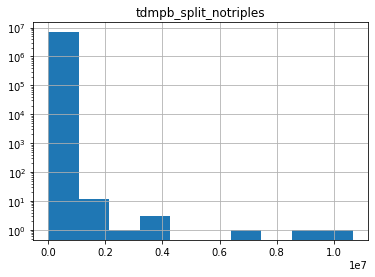

In [28]:
import matplotlib.pyplot as plt
res3[~res3.is_all_punct].hist()
plt.yscale('log')

In [30]:
res3

,index,tdmpb_split_notriples,is_all_punct
0,.,11421558,True
1,the,10662666,False
2,of,8836437,False
3,and,6417226,False
4,in,3991805,False
...,...,...,...
6875992,1.01.45',1,False
6875993,"106078,",1,False
6875994,current-setting,1,False
6875995,<Ohr1-l'I),1,False


In [1]:
import pandas as pd
df3 = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered.parquet')

In [32]:
df3.columns

Index(['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text',
       'file', 'id1', 'width', 'height', 'nchars_stripped', 'nwords_stripped',
       'nchars_stripped_dbl', 'text_stripped_nocid', 'nchars_stripped_nocid',
       'nwords_stripped_nocid', 'area', 'is_enchant_word',
       'is_enchant_word_ntrue', 'is_enchant_word_ntrue_perc', 'text_ascii',
       'text_drop_mid_punct', 'text_drop_mid_punct_brackets',
       'text_drop_mid_punct_num_split', 'tdmpb_split_notriples', 'punct_count',
       'punct_perc', 'word_is_all_punct', 'is_enchant_word_tdm',
       'is_enchant_word_ntrue_tdm', 'nwords_stripped_tdm',
       'is_enchant_word_ntrue_perc_tdm', 'space_count', 'space_perc',
       'letter_count', 'letter_perc', 'num_count', 'num_perc',
       'word_letter_num', 'word_letter_perc'],
      dtype='object')

In [34]:
df3.word_is_all_punct

Unnamed: 0
0                                          [False, False]
1                     [False, False, False, False, False]
2                                          [False, False]
3                                   [False, False, False]
4       [False, False, False, False, False, False, False]
                              ...                        
1907    [False, False, False, False, False, False, Fal...
1911                                       [False, False]
1912    [False, False, False, False, True, False, Fals...
1913    [False, False, False, False, False, False, Fal...
1916    [False, False, False, True, False, False, Fals...
Name: word_is_all_punct, Length: 16940113, dtype: object

Let's see what the effect of removing words with high punct percentages

In [2]:
import string
import re
from tqdm import tqdm
tqdm.pandas() 

punct = re.escape(string.punctuation)
df3['word_punct_num'] = df3.tdmpb_split_notriples.str.split().progress_apply(lambda x: [len(re.findall(f'[{punct}]', xx)) for xx in x])
df3['word_punct_perc'] = df3.tdmpb_split_notriples.str.split().progress_apply(lambda x: [len(re.findall(f'[{punct}]', xx))/float(len(xx)) for xx in x])

100%|██████████| 16940113/16940113 [08:35<00:00, 32843.03it/s] 


In [3]:
df3.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered_2.parquet')

In [4]:
df3['tdmpb_word_l100_punct'] = df3.progress_apply(lambda row: ' '.join([word for word,punct_perc in zip(row.tdmpb_split_notriples.split(), row.word_punct_perc) if punct_perc < 1.0]), axis=1)

100%|██████████| 16940113/16940113 [10:01<00:00, 28171.96it/s]


In [5]:
df3.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered_3.parquet')

In [6]:
df3['tdmpb_word_le50_punct'] = df3.progress_apply(lambda row: ' '.join([word for word,punct_perc in zip(row.tdmpb_split_notriples.split(), row.word_punct_perc) if punct_perc <= 0.5]), axis=1)

100%|██████████| 16940113/16940113 [10:09<00:00, 27772.88it/s]


In [2]:
import pandas as pd
df3 = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered_3.parquet')

In [4]:
from tqdm import tqdm
tqdm.pandas()
df3['tdmpb_word_le67_punct'] = df3.progress_apply(lambda row: ' '.join([word for word,punct_perc in zip(row.tdmpb_split_notriples.split(), row.word_punct_perc) if punct_perc <= 0.67]), axis=1)

100%|██████████| 16940113/16940113 [11:22<00:00, 24808.16it/s]


In [5]:
df3.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered_3.parquet')

In [9]:
res = df3[df3.tdmpb_split_notriples != df3.tdmpb_word_l100_punct]
res.shape

(3594220, 45)

In [17]:
test = res.sample(10).filter(regex='tdmpb')
test

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct
Unnamed: 0,,,
4908,"Unit 15, 441.0 - 455.0 m (14.0 m) Lime mudston...","Unit 15, 441.0 455.0 m (14.0 m) Lime mudstone:...","Unit 15, 441.0 455.0 m (14.0 m) Lime mudstone:..."
68338,\[ l' I[ II,l' I[ II,l' I[ II
102411,Agates from. . . . . . . . . . . . . . . . . ....,Agates from. 15 T tJacbolong from near. 25 T C...,Agates from. 15 T tJacbolong from near. 25 T C...
2489,: I,I,I
2100,PLC= PlaceName FTR = FeatureN. LCL= Loca1N. GN...,PLC= PlaceName FTR FeatureN. LCL= Loca1N. GNR ...,PLC= PlaceName FTR FeatureN. LCL= Loca1N. GNR ...
7636,1963: Recent and Pleistocene geology of southe...,1963: Recent and Pleistocene geology of southe...,1963: Recent and Pleistocene geology of southe...
1152,"Rise in the first Fall, including the currents...","Rise in the first Fall, including the currents...","Rise in the first Fall, including the currents..."
62148,Ni ppm 3 40 42 69 58 60 48 66 113 47 190 90 87...,Ni ppm 3 40 42 69 58 60 48 66 113 47 190 90 87...,Ni ppm 3 40 42 69 58 60 48 66 113 47 190 90 87...
5303,"1 pro uct, w 1c , optwa y, resem es a zeo 1te,...","1 pro uct, w 1c optwa y, resem es a zeo 1te, u...","1 pro uct, w 1c optwa y, resem es a zeo 1te, u..."


**analysis** things that are lost by removing words that are just punct:
    Cadmium - Production, Trade and Consumption	Cadmium Production, Trade and Consumption	
    49 - 8 49 - 8 Mean. . . . . .	49 8 49 8 Mean.	
    + 5 - 10 mm + 10 mm	5 10 mm 10 mm
    
    maybe this isn't so bad
    

In [18]:
res = df3[df3.tdmpb_word_l100_punct != df3.tdmpb_word_le50_punct]
res.shape

(994186, 45)

In [19]:
test = res.sample(10).filter(regex='tdmpb')
test

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct
Unnamed: 0,,,
8079,Sep 2015 Aug 2016 Depth (m) 0.5 1 1.5 2 4 7 12 16,Sep 2015 Aug 2016 Depth (m) 0.5 1 1.5 2 4 7 12 16,Sep 2015 Aug 2016 Depth 0.5 1 1.5 2 4 7 12 16
1175,Canadian Government documents . .. . . . . . ....,Canadian Government documents Foreign document...,Canadian Government documents Foreign document...
1095,"De plus, vous pouvez obtenir des renseignement...","De plus, vous pouvez obtenir des renseignement...","De plus, vous pouvez obtenir des renseignement..."
5865,4 ~ E ~ ~ ~ ~ q u ~ a ~ ~ In N o v i S C O T I...,4 E q u a In N o v i S C O T I A A proof opera...,4 E q u a In N o v i S C O T I A A proof opera...
9578,B. Coarsening-upward cycles in Martin Creek Fo...,B. Coarsening-upward cycles in Martin Creek Fo...,B. Coarsening-upward cycles in Martin Creek Fo...
520,"9331. SHIMA, M., ""Elastic Theory and Elastic P...","9331. SHIMA, M., ""Elastic Theory and Elastic P...","9331. SHIMA, ""Elastic Theory and Elastic Prope..."
65629,"Middleton, G.V., Eyles, N., Chapple, N., and W...","Middleton, G.V., Eyles, N., Chapple, N., and W...","Middleton, Eyles, Chapple, and Watson, 2009. N..."
4372,"A number of Canadian companies (e.g., MDA, Can...","A number of Canadian companies (e.g., MDA, Can...","A number of Canadian companies MDA, Canadian p..."
27447,"B .HONNE, :f. J.","B .HONNE, :f. J.","B .HONNE, J."


** analysis** removing words with >50% punct is actually too much: 
    9331. SHIMA, M., "Elastic Theory and Elastic P...	9331. SHIMA, M., "Elastic Theory and Elastic P...	9331. SHIMA, "Elastic Theory and Elastic Prope...
    legal endings (m) "m" "m," m.,

In [6]:
res = df3[df3.tdmpb_word_le67_punct != df3.tdmpb_word_le50_punct]
res.shape

(947087, 46)

In [11]:
test = res.sample(10).filter(regex='tdmpb')
test

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,
233,Figure 13. Paleoproterozoic Thelon zone igneou...,Figure 13. Paleoproterozoic Thelon zone igneou...,Figure 13. Paleoproterozoic Thelon zone igneou...,Figure 13. Paleoproterozoic Thelon zone igneou...
167,3) identify minerals suitable to measure in-si...,3) identify minerals suitable to measure in-si...,3) identify minerals suitable to measure in-si...,3) identify minerals suitable to measure in-si...
126,W. van den Belt: wcrked sandstone object from ...,W. van den Belt: wcrked sandstone object from ...,W. van den Belt: wcrked sandstone object from ...,W. van den Belt: wcrked sandstone object from ...
243,"Zagorevski, A., Mihalynuk, M.G., McGoldrick, S...","Zagorevski, A., Mihalynuk, M.G., McGoldrick, S...","Zagorevski, Mihalynuk, McGoldrick, Bedard, Gol...","Zagorevski, A., Mihalynuk, M.G., McGoldrick, S..."
77257,"Deb, M., tiwary, A. et Palmer, M.R., 1997. tou...","Deb, M., tiwary, A. et Palmer, M.R., 1997. tou...","Deb, tiwary, A. et Palmer, 1997. tourmaline in","Deb, M., tiwary, A. et Palmer, M.R., 1997. tou..."
4919,"Renne P. R., Mundil R., Balco G., Min K. and L...","Renne P. R., Mundil R., Balco G., Min K. and L...",Renne P. Mundil Balco Min K. and Ludwig K. 201...,"Renne P. R., Mundil R., Balco G., Min K. and L..."
802,z ~ z w :2: z :2: marginifera ~ <: z u.. 0 > w...,z z w :2: z :2: marginifera z u.. 0 w 0 a: w a...,z z w z marginifera z 0 w 0 a: w,z z w :2: z :2: marginifera z u.. 0 w 0 a: w a...
1062,"laminae (black, (c) structurally contorted (fr...","laminae (black, (c) structurally contorted (fr...","laminae (black, structurally contorted (from M...","laminae (black, (c) structurally contorted (fr..."
3340,"The top of the second unit (Fig. 5, unit 2) is...","The top of the second unit (Fig. 5, unit 2) is...","The top of the second unit (Fig. 5, unit 2) is...","The top of the second unit (Fig. 5, unit 2) is..."


In [9]:
test.loc[388].values

array(['Panneau d avertissement Lemieux, Ontario (J. Aylsworth)',
       'Panneau d avertissement Lemieux, Ontario (J. Aylsworth)',
       'Panneau d avertissement Lemieux, Ontario Aylsworth)',
       'Panneau d avertissement Lemieux, Ontario (J. Aylsworth)'],
      dtype=object)

In [12]:
test.loc[802].values

array(['z ~ z w :2: z :2: marginifera ~ <: z u.. 0 > w 0 a: w a.. a.. :>',
       'z z w :2: z :2: marginifera z u.. 0 w 0 a: w a.. a..',
       'z z w z marginifera z 0 w 0 a: w',
       'z z w :2: z :2: marginifera z u.. 0 w 0 a: w a.. a..'],
      dtype=object)

**analysis** Above, we have an example of why you want to be more permissive (0.67), below why you want to be less permissive

In [13]:
res = df3[df3.tdmpb_word_l100_punct != df3.tdmpb_word_le67_punct]
res.shape

(76231, 46)

In [14]:
test = res.sample(10).filter(regex='tdmpb')
test

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,
113,",.v.r, $-9' -26",",.v.r, $-9' -26",-26,",.v.r, -26"
1217,Synonymy: Cladonia rangiferina (L.) Wigg.,Synonymy: Cladonia rangiferina (L.) Wigg.,Synonymy: Cladonia rangiferina Wigg.,Synonymy: Cladonia rangiferina Wigg.
194,' cT. ci F.\ cc :.icis Q .. .. .r . c -' tD '....,cT. ci F.\ cc :.icis Q .r c tD '.1' a` T` r: ....,cT. ci cc :.icis Q .r c tD a` T` r: .c 4rD yo ...,cT. ci F.\ cc :.icis Q .r c tD a` T` r: .c 4rD...
809,"lt i, lhc h..: lid of th; .iuthor' th ;rt tL' ...","lt i, lhc h..: lid of th; .iuthor' th ;rt tL' ...","lt i, lhc lid of th; .iuthor' th ;rt tL' ll th...","lt i, lhc lid of th; .iuthor' th ;rt tL' ll th..."
5078,The General Mining Association have also worke...,The General Mining Association have also worke...,The General Mining Association have also worke...,The General Mining Association have also worke...
125,ro ro o..- 0. E H E ro v ro ro g :g - ~ u ~ o ...,ro ro o..- 0. E H E ro v ro ro g :g u o ro B H...,ro ro 0. E H E ro v ro ro g :g u o ro B H V w ...,ro ro 0. E H E ro v ro ro g :g u o ro B H V w ...
2459,"nrr, Gric i M j E { 63azts L; :l2 132g. yilid ...","nrr, Gric i M j E 63azts L; :l2 132g. yilid j,...","nrr, Gric i M j E 63azts L; :l2 132g. yilid j,...","nrr, Gric i M j E 63azts L; :l2 132g. yilid j,..."
7237,",: :; : Ii: i, i: :i ,i' ,Ii j"" i'i! ,i: ~ :' ...","Ii: i, i: :i ,i' ,Ii j"" i'i! ,i: 'Ii: ,i': ,Ii...","Ii: i, i: :i ,Ii j"" i'i! 'Ii: ,Ii! 'i ,il' t ~...","Ii: i, i: :i ,i' ,Ii j"" i'i! ,i: 'Ii: ,Ii! 'i ..."
14740,". :i-.] . <'ii ! ""'Egs~ 1i ""II :l: ~ . :I E i:...",":i-.] <'ii ""'Egs~ 1i ""II :l: :I E i: ~..i.83 :...","<'ii ""'Egs~ 1i ""II :I E i: :ll13i gu.s ~lJ; i8...","<'ii ""'Egs~ 1i ""II :l: :I E i: ~..i.83 :ll13i ..."


In [15]:
test.loc[7237].values

array([',: :; : Ii: i, i: :i ,i\' ,Ii j" i\'i! ,i: ~ :\' :, :: \'Ii: ,i\': ,Ii! \'i ,g~ ~~ ,il\' ,1~ ~ :~ ~ ~ t ~4 ~~ ,i ,!',
       'Ii: i, i: :i ,i\' ,Ii j" i\'i! ,i: \'Ii: ,i\': ,Ii! \'i ,g~ ,il\' ,1~ t ~4 ,i',
       'Ii: i, i: :i ,Ii j" i\'i! \'Ii: ,Ii! \'i ,il\' t ~4 ,i',
       'Ii: i, i: :i ,i\' ,Ii j" i\'i! ,i: \'Ii: ,Ii! \'i ,g~ ,il\' ,1~ t ~4 ,i'],
      dtype=object)

In [20]:
res.loc[7237].iloc[3]

obj_type                              <class 'pdfminer.layout.LTTextBoxHorizontal'>
pg                                                                            153.0
pos_x0                                                                     116.8969
pos_y0                                                                     261.3912
pos_x1                                                                     125.6902
pos_y1                                                                     284.4481
text                                                               .\n"\ny.\n,''C\n
file                              /nrcan_p2/data/02_intermediate/20201117/geosca...
id1                                                                          209767
width                                                                        8.7933
height                                                                      23.0569
nchars_stripped                                                             

In [70]:
res = df3[(df3.letter_perc <= 0.01)]
res

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
68,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,160.9050,40.4600,279.308510,644.5690,9 506600 6973500 \n9 467000 6958200 \n9 4...,/nrcan_p2/data/02_intermediate/100335.pdfminer...,100335,118.403510,...,0.004994,633,0.790262,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9 506600 6973500 9 4670 6958200 9 455900 69607...,9 506600 6973500 9 4670 6958200 9 455900 69607...,9 506600 6973500 9 4670 6958200 9 455900 69607...
160,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,245.3500,24.7215,278.331527,496.5195,10 \n10 \n10 \n10 \n10 \n11 \n11 \n11 \n10/11 ...,/nrcan_p2/data/02_intermediate/100354.pdfminer...,100354,32.981527,...,0.009009,72,0.648649,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10 10 10 10 10 11 11 11 1011 11 11 11 11 11 11...,10 10 10 10 10 11 11 11 1011 11 11 11 11 11 11...,10 10 10 10 10 11 11 11 1011 11 11 11 11 11 11...
502,<class 'pdfminer.layout.LTTextBoxHorizontal'>,12.0,324.2595,49.9315,397.138831,291.5695,3682. 5' \n3683' \n3683-3684' \n3684- 3684. 5'...,/nrcan_p2/data/02_intermediate/100354.pdfminer...,100354,72.879331,...,0.006711,92,0.617450,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, ...","[0.2, 0.5, 0.2, 0.0, 1.0, 0.2, 0.2, 0.2, 0.5, ...",3682. 5' 3683' 3683 3684' 3684- 3684. 5' 3687 ...,3682. 5' 3683' 3683 3684' 3684- 3684. 5' 3687 ...,3682. 5' 3683' 3683 3684' 3684- 3684. 5' 3687 ...
831,<class 'pdfminer.layout.LTTextBoxHorizontal'>,19.0,335.4700,63.8168,396.486090,686.2194,12 70-1275' \n1270.5' \n1275-1279' \n1280-1285...,/nrcan_p2/data/02_intermediate/100354.pdfminer...,100354,61.016090,...,0.001916,320,0.613027,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, ...","[0.0, 0.0, 1.0, 0.2, 0.2857142857142857, 0.0, ...",12 70 1275' 1270.5' 1275 1279' 1280 1285' 1284...,12 70 1275' 1270.5' 1275 1279' 1280 1285' 1284...,12 70 1275' 1270.5' 1275 1279' 1280 1285' 1284...
890,<class 'pdfminer.layout.LTTextBoxHorizontal'>,21.0,329.0500,42.2081,394.340793,680.3093,4123-4128' \n4128-4133' \n4133-4138' \n4138-41...,/nrcan_p2/data/02_intermediate/100354.pdfminer...,100354,65.290793,...,0.010000,367,0.611667,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...","[0.0, 1.0, 0.2, 0.0, 1.0, 0.2, 0.0, 1.0, 0.2, ...",4123 4128' 4128 4133' 4133 4138' 4138 4143' 41...,4123 4128' 4128 4133' 4133 4138' 4138 4143' 41...,4123 4128' 4128 4133' 4133 4138' 4138 4143' 41...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,<class 'pdfminer.layout.LTTextBoxHorizontal'>,2.0,374.6800,78.3784,437.243200,292.9816,. . \n- : ' \n. :; \n. ·-\n. -\n- : \n. -...,/nrcan_p2/data/02_intermediate/20201117/geosca...,129144,62.563200,...,0.005988,1,0.005988,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0 I,0 I,0 I
137,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,408.0500,346.5633,437.013600,595.3802,...... ... -. : \n-. ....... ~ \n-... .........,/nrcan_p2/data/02_intermediate/20201117/geosca...,129144,28.963600,...,0.007092,1,0.007092,"[0, 0, 0, 0, 0, 0, 

In [82]:
test = res.sample(10)
test.filter(regex='tdmpb')

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,
4065,19 to 20 412 407 408 408 409 408 409 413 408 3...,19 to 20 412 407 408 408 409 408 409 413 408 3...,19 to 20 412 407 408 408 409 408 409 413 408 3...,19 to 20 412 407 408 408 409 408 409 413 408 3...
1925,1961 1962 1963 1964 1965 1966 1967 1968 1969 1...,1961 1962 1963 1964 1965 1966 1967 1968 1969 1...,1961 1962 1963 1964 1965 1966 1967 1968 1969 1...,1961 1962 1963 1964 1965 1966 1967 1968 1969 1...
811,2 .0 1. 5 1 .o 1 .0 1.0 1 1.0 1 1. 5 3 1. 5 2 ...,2 .0 1. 5 1 .o 1 .0 1.0 1 1.0 1 1. 5 3 1. 5 2 ...,2 .0 1. 5 1 .o 1 .0 1.0 1 1.0 1 1. 5 3 1. 5 2 ...,2 .0 1. 5 1 .o 1 .0 1.0 1 1.0 1 1. 5 3 1. 5 2 ...
366,"J. - 17 6 1 ! . . . . . . . , - 25 1 1. 2 . . ...",J. 17 6 1 25 1 1. 2 18 1 13 6 14 7 1,J. 17 6 1 25 1 1. 2 18 1 13 6 14 7 1,J. 17 6 1 25 1 1. 2 18 1 13 6 14 7 1
1616,u-w 7.4 0.05 7.2 0.02 7.6 0.02 7.9 0.08 7.4 0....,u-w 7.4 0.05 7.2 0.02 7.6 0.02 7.9 0.08 7.4 0....,u-w 7.4 0.05 7.2 0.02 7.6 0.02 7.9 0.08 7.4 0....,u-w 7.4 0.05 7.2 0.02 7.6 0.02 7.9 0.08 7.4 0....
1373,976 1039 996 858 492 929 1068 1062 1050 1016 1...,976 1039 996 858 492 929 1068 1062 1050 1016 1...,976 1039 996 858 492 929 1068 1062 1050 1016 1...,976 1039 996 858 492 929 1068 1062 1050 1016 1...
2558,- 17635 - - - - 17295 - - - - - 17636 - - - 17...,"17635 17295 17636 17637, 17638 17639 17744 176...","17635 17295 17636 17637, 17638 17639 17744 176...","17635 17295 17636 17637, 17638 17639 17744 176..."
786,300 0.5 185 1.0 358 0 . 5 30 1.0 72 0.5 78 0 ....,300 0.5 185 1.0 358 0 5 30 1.0 72 0.5 78 0 .5 ...,300 0.5 185 1.0 358 0 5 30 1.0 72 0.5 78 0 .5 ...,300 0.5 185 1.0 358 0 5 30 1.0 72 0.5 78 0 .5 ...
12664,to 1 756 745 744 744 744 737 746 753 732 737 7...,to 1 756 745 744 744 744 737 746 753 732 737 7...,to 1 756 745 744 744 744 737 746 753 732 737 7...,to 1 756 745 744 744 744 737 746 753 732 737 7...


In [ ]:
**analysis** 13.6k boxes with <= 1% text. These seem reasonable to delete.

In [83]:
res = df3[(df3.letter_perc <= 0.05)]
res

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
429,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,76.490000,1063.634900,127.038000,1111.068100,'. : : ; : i : . : : \n.:· : · :1.: \n. .....,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,50.548000,...,0.022222,1,0.022222,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 3, 1, 2, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",i :1.:,i,i
440,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,477.373200,1007.342900,507.068800,1024.932500,"' ,· '.· 1,•' .· \n; ; , : : I : : \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,29.695600,...,0.034483,1,0.034483,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]","[1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, ...","1, I","1, I","1, I"
523,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,683.900000,226.582000,732.702800,299.748800,": I : : : : : ~ : ~ : \n'!""'""'""""'"" \n. · ····...",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,48.802800,...,0.019417,3,0.029126,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",I j: :11 1:,I j: :11 1:,I j: :11 1:
524,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,684.410000,152.690600,733.341898,218.196600,"::: !::::: \n... , . . , .. \n··· ·· j··· \n.....",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,48.931898,...,0.031250,1,0.010417,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",j 1 i :I,j 1 i :I,j 1 i :I
685,<class 'pdfminer.layout.LTTextBoxHorizontal'>,23.0,976.270000,716.032600,1017.973440,742.971600,: : ~ ! : : : : \n~ : ; : f ; : : \n• •...,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,41.703440,...,0.026316,1,0.026316,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",f 1,f 1,f 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,602.690000,110.784500,620.210245,434.668500,47 \n49 \n33 \n36 \n54 \n57 \n18 \n21 \n30 \n3...,/nrcan_p2/data/02_intermediate/20201117/geosca...,129178,17.520245,...,0.025000,52,0.650000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",47 49 33 36 54 57 18 21 30 33 35 38 48 55 SA 4...,47 49 33 36 54 57 18 21 30 33 35 38 48 55 SA 4...,47 49 33 36 54 57 18 21 30 33 35 38 48 55 SA 4...
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,276.490000,236.531500,307.450000,293.530000,"~. \n41( < V ,._ \nü(; \n0 _. \n",/nrcan_p2/data/02_intermediate/20201117/geosca...,129338,30.960000,...,0.045455,3,0.136364,"[0, 0, 0, 1, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[2, 1, 1, 0, 3, 2, 0, 2]","[1.0, 0.3333333333333333, 1.0, 0.0, 1.0, 1.0, ...",41( V 0,41( V 0,41( V 0
7,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,21.600000,0.850000,426.204472,18.894290,"·""11 \n~_;.:. ... , ,. ~-· _ - .. t"":..!..~....",/nrcan_p2/data/02_intermediate/20201117/geosca...,129338,404.604472,...,0.030000,2,0.020000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..

In [90]:
test = res.sample(10)
test.filter(regex='tdmpb')

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,
9440,.O* * -3 . 00 . O* ** .0* * 14 . 06 4.01 -3.00...,.O* -3 00 O* .0* 14 06 4.01 -3.00 .0* .O* -3.0...,-3 00 O* 14 06 4.01 -3.00 -3.00 4 07 14.5 -3 ....,.O* -3 00 O* .0* 14 06 4.01 -3.00 .0* .O* -3.0...
29031,-.87 -.89 -.87 -.81 -.91 -.91 -.92 -.91 -.92 -...,-.87 -.89 -.87 -.81 -.91 -.91 -.92 -.91 -.92 -...,-.87 -.89 -.87 -.81 -.91 -.91 -.92 -.91 -.92 -...,-.87 -.89 -.87 -.81 -.91 -.91 -.92 -.91 -.92 -...
6273,"829408 3687'"" 372i7 45636 45210 3980 41984 418...","829408 3687'"" 372i7 45636 45210 3980 41984 418...","829408 3687'"" 372i7 45636 45210 3980 41984 418...","829408 3687'"" 372i7 45636 45210 3980 41984 418..."
684,Wc () 75.6 85.0 78.2 85.3 76.5 82.9 52.0 52.9,Wc 75.6 85.0 78.2 85.3 76.5 82.9 52.0 52.9,Wc 75.6 85.0 78.2 85.3 76.5 82.9 52.0 52.9,Wc 75.6 85.0 78.2 85.3 76.5 82.9 52.0 52.9
502,1 1 . 15 80 19 . 0 137 0 . 5 1 15 14 0. 1 1 .6...,1 1 15 80 19 0 137 0 5 1 15 14 0. 1 1 .6 240 2...,1 1 15 80 19 0 137 0 5 1 15 14 0. 1 1 .6 240 2...,1 1 15 80 19 0 137 0 5 1 15 14 0. 1 1 .6 240 2...
737,35 < 1 35 ( I 70 < 1,35 1 35 I 70 1,35 1 35 I 70 1,35 1 35 I 70 1
3212,242 1440 242 1442 242 141.4 242 141.; E 242 14...,242 1440 242 1442 242 141.4 242 141.; E 242 14...,242 1440 242 1442 242 141.4 242 141.; E 242 14...,242 1440 242 1442 242 141.4 242 141.; E 242 14...
7051,+ 32 15 658 - 0 2409 + 32 17 - 70 + 0 - 9818 +...,32 15 658 0 2409 32 17 70 0 9818 32 47 31 2 56...,32 15 658 0 2409 32 17 70 0 9818 32 47 31 2 56...,32 15 658 0 2409 32 17 70 0 9818 32 47 31 2 56...
701,".. . : . . 2 1 4 ,5 7 5 : :: : : :: :: :: . i....","2 1 4 ,5 7 5 i.si6. 200 ,o","2 1 4 ,5 7 5 i.si6. 200 ,o","2 1 4 ,5 7 5 i.si6. 200 ,o"


In [ ]:
**analysis** also delete boxes with < 0.5% letters

In [122]:
res = df3[(df3.letter_perc <= 0.1) & (df3.letter_perc > 0.09)]
res

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
206,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8.0,382.05,-6.193800,570.929196,32.898500,. ... \nv ----11!!!!!!!!!!!!!!!!!!191111111!!...,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,188.879196,...,0.090909,3,0.272727,"[0, 0, 1, 0]","[0.0, 0.0, 1.0, 0.0]","[1, 1, 0, 2]","[1.0, 1.0, 0.0, 0.4]",v -191-,v -191-,v -191-
431,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,0.25,963.077800,730.810200,1141.030300,"' i j l i \n·;·· \n: · "" "" :.:;:1 : \n: I:...",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,730.560200,...,0.098089,46,0.029299,"[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",i j l i :.1 I: :I II '1 1': I J' i 1 I l 1 J ....,i j l i I: :I II '1 I J' i 1 I l 1 J Ii i I I ...,i j l i :.1 I: :I II '1 1': I J' i 1 I l 1 J ....
432,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,293.42,1078.570100,435.541200,1104.298700,"' '1i'''"": . : 1•jl11 : :1.,111' • .!:: : ::...",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,142.121200,...,0.093023,11,0.127907,"[0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, ...","[0.0, 0.2, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...","[1, 3, 1, 1, 0, 0, 1, 3, 2, 1, 2, 0, 1, 1, 1, ...","[1.0, 0.6, 1.0, 1.0, 0.0, 0.0, 1.0, 0.6, 1.0, ...",'1i': 1 jl11 :1.1' I iijt' 11. 1 1 1,1 jl11 I iijt' 11. 1 1 1,'1i': 1 jl11 :1.1' I iijt' 11. 1 1 1
452,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,405.45,1060.095979,434.416463,1067.378895,", ; I · : ;; • \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,28.966463,...,0.100000,0,0.000000,"[0, 0, 1, 0, 0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[1, 1, 0, 1, 2]","[1.0, 1.0, 0.0, 1.0, 1.0]",I,I,I
515,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,481.06,1002.334900,500.848400,1006.496500,' I ' ' ' ' \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,19.788400,...,0.090909,0,0.000000,"[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[1, 0, 1, 1, 1, 1]","[1.0, 0.0, 1.0, 1.0, 1.0, 1.0]",I,I,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,<class 'pdfminer.layout.LTTextBoxHorizontal'>,41.0,314.01,542.162800,402.248753,639.181600,".. { .. \, \nJC ~ r~ \nI 66 52 2C . ?16 ...",/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,88.238753,...,0.100000,19,0.316667,"[0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.5, 1.0, 0.0, ...","[2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.5, 0.0, 0.0, ...","JC r~ I 66 52 2C ?16 1927 4 ,92t 032 83","JC r~ I 66 52 2C ?16 1927 4 ,92t 032 83","JC r~ I 66 52 2C ?16 1927 4 ,92t 032 83"
1168,<class 'pdfminer.layout.LTTextBoxHorizontal'>,41.0,323.64,569.494600,346.624856,576.643200,11 ... -.. I \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,22.984856,...,0.100000,2,0.200000,"[0, 0, 0, 1]","[0.0, 0.0, 0.0, 1.0]","[0, 1, 3, 0]","[0.0, 1.0, 1.0, 0.0]",11 I,11 I,11 I
1297,<class 'pdfminer.layout.LTTextBoxHorizontal'>,43.0,494.12,730.156600,544.079162,741.539800,44-66 :\'W \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,49.959162,...,0.090909,4,0.363636,"[0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.3333333333333333]","[0, 1, 0, 2]","[0.0, 1.0, 0.0, 0.6666666666666666]",44 66 :'W,44 66,44 66 :'W


In [136]:
test = res.sample(10)
test.filter(regex='tdmpb')

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,
5143,Prince Edward Island . . . . . . . . . . . . ....,Prince Edward Island Nova Scotia New Brunswick...,Prince Edward Island Nova Scotia New Brunswick...,Prince Edward Island Nova Scotia New Brunswick...
1677,27 30 . . . . . . . . . . . x x x,27 30 x x x,27 30 x x x,27 30 x x x
10907,2 200 5 860 'l-56 1 024 450 630 189 OIS 135,2 200 5 860 'l-56 1 024 450 630 189 OIS 135,2 200 5 860 'l-56 1 024 450 630 189 OIS 135,2 200 5 860 'l-56 1 024 450 630 189 OIS 135
1186,66 - 13 - 1 66 - 13-lA,66 13 1 66 13-lA,66 13 1 66 13-lA,66 13 1 66 13-lA
87,70996 - 1i,70996 1i,70996 1i,70996 1i
38071,46 15 ' 0N,46 15 0N,46 15 0N,46 15 0N
2090,09 31 11 d,09 31 11 d,09 31 11 d,09 31 11 d
2397,S.. 11 161,S.. 11 161,11 161,S.. 11 161
53656,-L; ! 1.. :,-L; 1..,,-L; 1..


In [138]:
test.loc[5143].values

array(["<class 'pdfminer.layout.LTTextBoxHorizontal'>", 195.0, 59.74,
       95.6938, 318.754345, 177.3014,
       'Prince  Edward  Island  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nNova  Scotia  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nNew  Brunswick  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nQuebec  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nOntario  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nManitoba  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nSaskatchewan  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nAlberta  . . . . . . . . . . . . . . . . . . . 

In [ ]:
Wind Speed ms 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 ...	Wind Speed ms 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 ...	Wind Speed ms 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 ...	Wind Speed ms 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 ...

In [139]:
res = df3[(df3.letter_perc <= 0.2) & (df3.letter_perc > 0.19)]
res

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
461,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,692.260,1054.030400,723.410900,1058.606000,1 1 • • • • •• J \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,31.150900,...,0.200000,2,0.400000,"[0, 0, 1]","[0.0, 0.0, 1.0]","[0, 0, 0]","[0.0, 0.0, 0.0]",1 1 J,1 1 J,1 1 J
554,<class 'pdfminer.layout.LTTextBoxHorizontal'>,19.0,36.940,672.320478,57.254578,676.226590,I . 1 • • • \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,20.314578,...,0.200000,1,0.200000,"[1, 0, 0]","[1.0, 0.0, 0.0]","[0, 1, 0]","[0.0, 1.0, 0.0]",I 1,I 1,I 1
566,<class 'pdfminer.layout.LTTextBoxHorizontal'>,19.0,58.178,181.685000,65.795842,218.466895,I· ' ' \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,7.617842,...,0.200000,0,0.000000,"[1, 0, 0]","[1.0, 0.0, 0.0]","[0, 1, 1]","[0.0, 1.0, 1.0]",I,I,I
613,<class 'pdfminer.layout.LTTextBoxHorizontal'>,21.0,443.850,406.690000,517.260000,416.290000,"... . \Ol\'\''\0.""~ \I\~ \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,73.410000,...,0.200000,1,0.066667,"[0, 0, 2, 1]","[0.0, 0.0, 0.2857142857142857, 0.3333333333333...","[1, 1, 4, 2]","[1.0, 1.0, 0.5714285714285714, 0.6666666666666...",\Ol'0.~ \I~,,\Ol'0.~ \I~
618,<class 'pdfminer.layout.LTTextBoxHorizontal'>,21.0,455.280,202.381378,548.717560,226.450000,"l\~vJ \n""'-~· \n-;,,,~ .... '-""-~i:..\i...-......",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,93.437560,...,0.194444,2,0.027778,"[3, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1]","[1.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.333...","[0, 4, 2, 1, 7, 2, 1, 4, 2, 2, 2, 3, 7, 1, 4]","[0.0, 1.0, 1.0, 1.0, 0.7777777777777778, 0.666...","lvJ '--ii.-., ~a. &.eo.. ,'r \'9 0.o.. ,..no-....",lvJ 'L,"lvJ ~a. &.eo.. ,'r \'9 0.o.. 'L"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,<class 'pdfminer.layout.LTTextBoxHorizontal'>,30.0,88.210,270.743200,113.502800,282.349600,C-1 5 \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,25.292800,...,0.200000,2,0.400000,"[1, 0]","[0.3333333333333333, 0.0]","[1, 0]","[0.3333333333333333, 0.0]",C-1 5,C-1 5,C-1 5
1316,<class 'pdfminer.layout.LTTextBoxHorizontal'>,43.0,313.210,610.043200,332.962148,624.377600,I 4.4 \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,19.752148,...,0.200000,2,0.400000,"[1, 0]","[1.0, 0.0]","[0, 1]","[0.0, 0.3333333333333333]",I 4.4,I 4.4,I 4.4
1318,<class 'pdfminer.layout.LTTextBoxHorizontal'>,43.0,311.170,535.422400,390.298730,600.435500,"1166 54 C•l. 22 \n', r J.. , c: 27 \n'I \n...",/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,79.128730,...,0.190476,11,0.174603,"[0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, ...","[0.0, 0.0, 1.0, 0.5, 0.0, 0.0, 1.0, 0.33333333...","[0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.5, 0.0, 1.0, 0.0, 0.66666666...",1166 54 C l. 22 r J.. c: 27 'I I' 4 oc r- S _G,1166 54 C l. 22 r c: 27 'I I' 4 oc r- S _G,1166 54 C l. 22 r J.. c: 27 'I I' 4 oc r- S _G


In [154]:
test = res.sample(10)
test.filter(regex='tdmpb')

,tdmpb_split_notriples,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,
16067,I 670,I 670,I 670,I 670
12853,21 H1,21 H1,21 H1,21 H1
509,Sept. 30 . . . . . 10,Sept. 30 10,Sept. 30 10,Sept. 30 10
3728,i 4 0,i 4 0,i 4 0,i 4 0
2991,23 D4,23 D4,23 D4,23 D4
1814,"No. 16, p. 251.","No. 16, p. 251.","No. 16, p. 251.","No. 16, p. 251."
5063,'1L: 0. 4 HL0.3,'1L: 0. 4 HL0.3,'1L: 0. 4 HL0.3,'1L: 0. 4 HL0.3
1097,0.3 m,0.3 m,0.3 m,0.3 m
17475,24 .o,24 .o,24 .o,24 .o


In [121]:
test.loc[416].values

array(["<class 'pdfminer.layout.LTTextBoxHorizontal'>", 21.0, 47.24,
       99.0538, 315.68872999999996, 190.2614,
       'From  Mr.  E.  A.  Moxley.......... . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nProf.  M.  Victorin..... . . .. ........... .. ... . . . .. ......... .. . \n" \n"  Mr. H.  M.  Laing.... . .... . .. .... .................... .. . ... \nDr. J.  Dearness. . .... . .. . .. .. .. . .... ... ...... .. .... . . . . ... . \n" \nl\\1r.  H. Groh . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \n"  Mr.  D.  Leechman.... . . . ....... .. ... . .. . . . ....... ........ . . \nProv.  Museum,  Victoria,  B.C.......................... .. .... \nDr. H. F.  Lewis . ....... . . ... . . .. . ... . ........... . ..... . ... \nl\\.fr.  E. A. Porsild. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . \nl\\1r.  N.  Criddle............... . ....... ... ... . .... . ......... \nTotal. ...........

**analysis** drop all with < 20% letters. This does remove some good text, but it doesn't have context - it's not a sentences

In [155]:
df3.shape

(16940113, 46)

In [156]:
df3 = df3[(df3.letter_perc > 0.2)]
display(df3.shape)
df3.to_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered_4.parquet')

(16127845, 46)

In [ ]:
**analysis** this dropped the frame from 16.9M -> 16.1M rows

In [161]:
df3.sample(10)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2325,<class 'pdfminer.layout.LTTextBoxHorizontal'>,104.0,85.200000,116.147000,231.595200,150.390000,25. Medium bright oxide in ball form. \n26...,/nrcan_p2/data/02_intermediate/306529.pdfminer...,306529,146.395200,...,0.692982,8,0.070175,"[0, 6, 6, 5, 2, 4, 4, 0, 4, 2, 8, 4, 0, 6, 5, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.0, 1.0, ...","[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, ...","[0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, ...",25. Medium bright oxide in ball form. 26. Same...,25. Medium bright oxide in ball form. 26. Same...,25. Medium bright oxide in ball form. 26. Same...
12255,<class 'pdfminer.layout.LTTextBoxHorizontal'>,183.0,420.640000,117.509478,465.693068,125.004094,restructure \n,/nrcan_p2/data/02_intermediate/247701.pdfminer...,247701,45.053068,...,1.000000,0,0.000000,[11],[1.0],[0],[0.0],restructure,restructure,restructure
1003,<class 'pdfminer.layout.LTTextBoxHorizontal'>,28.0,46.000000,191.399800,75.150000,203.229400,Anjou \n,/nrcan_p2/data/02_intermediate/298307.pdfminer...,298307,29.150000,...,1.000000,0,0.000000,[5],[1.0],[0],[0.0],Anjou,Anjou,Anjou
16783,<class 'pdfminer.layout.LTTextBoxHorizontal'>,303.0,201.510000,134.429300,237.163800,142.352900,estimatif \n,/nrcan_p2/data/02_intermediate/247761.pdfminer...,247761,35.653800,...,1.000000,0,0.000000,[9],[1.0],[0],[0.0],estimatif,estimatif,estimatif
87,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,71.944800,100.665600,542.766576,247.872000,.1 Geological Setting of the Assiniboine River...,/nrcan_p2/data/02_intermediate/326821.pdfminer...,326821,470.821776,...,0.777658,30,0.032223,"[0, 10, 7, 2, 3, 11, 5, 6, 20, 3, 8, 10, 0, 8,...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.85714285...","[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ...","[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714...",.1 Geological Setting of the Assiniboine River...,.1 Geological Setting of the Assiniboine River...,.1 Geological Setting of the Assiniboine River...
4199,<class 'pdfminer.layout.LTTextBoxHorizontal'>,158.0,124.179800,557.588300,188.863950,567.074300,siliferous (Cl-a). \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,102319,64.684150,...,0.764706,0,0.000000,"[10, 3]","[1.0, 0.5]","[0, 3]","[0.0, 0.5]",siliferous (Cl-a.,siliferous (Cl-a.,siliferous (Cl-a.
3800,<class 'pdfminer.layout.LTTextBoxHorizontal'>,31.0,651.608933,144.765524,682.367169,153.897046,C nT / ml \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,209302,30.758236,...,0.555556,0,0.000000,"[1, 2, 0, 2]","[1.0, 1.0, 0.0, 1.0]","[0, 0, 1, 0]","[0.0, 0.0, 1.0, 0.0]",C nT ml,C nT ml,C nT ml
4727,<class 'pdfminer.layout.LTTextBoxHorizontal'>,114.0,694.230000,77.549478,707.560405,84.699588,GSC \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,132690,13.330405,...,1.000000,0,0.000000,[3],[1.0],[0],[0.0],GSC,GSC,GSC
24764,<class 'pdfminer.layout.LTTextBoxHorizontal'>,1054.0,206.330000,308.975678,333.836993,350.252295,"Trees, distribution of, V. I. . . . . . . ...",/nrcan_p2/data/02_intermediate/20201117/geosca...,225855,127.506993,...,0.666667,0,0.000000,"[5, 12, 2, 1, 1, 0, 0, 0, 0, 0, 0, 4, 2, 2, 3,...","[0.8333333333333334, 1.0, 0.6666666666666666, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, ...","[0.16666666666666666, 0.0, 0.3333333333333333,...","Trees, distribution of, V. I. want of, on the ...","Trees, distribution of, V. I. want of, on the ...","Trees, distribution of, V. I. want of, on the ..."


In [165]:
display(df3.shape)
res = df3[df3.is_enchant_word_ntrue_perc_tdm == 0]
display(res.shape)
res

(16127845, 46)

(1971307, 46)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,<class 'pdfminer.layout.LTTextBoxHorizontal'>,2.0,399.58,617.9950,417.831880,704.6252,A6 \nA6 \nA6 \nA6 \nA? \nA7 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,18.251880,...,0.352941,5,0.294118,"[1, 1, 1, 1, 1, 1]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]","[0, 0, 0, 0, 1, 0]","[0.0, 0.0, 0.0, 0.0, 0.5, 0.0]",A6 A6 A6 A6 A? A7,A6 A6 A6 A6 A? A7,A6 A6 A6 A6 A? A7
46,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,218.04,711.1024,316.913082,725.3872,Illustrnttons \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,98.873082,...,1.000000,0,0.000000,[13],[1.0],[0],[0.0],Illustrnttons,Illustrnttons,Illustrnttons
47,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,433.68,688.0200,518.359200,702.3572,Facin~ pap;e \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,84.679200,...,0.818182,0,0.000000,"[5, 4]","[0.8333333333333334, 1.0]","[1, 0]","[0.16666666666666666, 0.0]",Facin~ pape,Facin~ pape,Facin~ pape
61,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,106.28,455.5124,286.807844,469.7972,Stringocephalus Zonation \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,180.527844,...,0.958333,0,0.000000,"[15, 8]","[1.0, 1.0]","[0, 0]","[0.0, 0.0]",Stringocephalus Zonation,Stringocephalus Zonation,Stringocephalus Zonation
118,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,390.18,653.7871,548.162425,669.0763,MA.C.KENZIE VALLE'( \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,157.982425,...,0.736842,0,0.000000,"[9, 5]","[0.8181818181818182, 0.7142857142857143]","[2, 2]","[0.18181818181818182, 0.2857142857142857]",MA.C.KENZIE VALLE'(,MA.C.KENZIE VALLE'(,MA.C.KENZIE VALLE'(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,<class 'pdfminer.layout.LTTextBoxHorizontal'>,55.0,362.53,512.6528,426.262634,525.4128,lS 2S 36.S \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,63.732634,...,0.400000,3,0.300000,"[2, 1, 1]","[1.0, 0.5, 0.25]","[0, 0, 1]","[0.0, 0.0, 0.25]",lS 2S 36.S,lS 2S 36.S,lS 2S 36.S
1796,<class 'pdfminer.layout.LTTextBoxHorizontal'>,56.0,205.72,215.5979,261.315508,228.2087,NORTHJi\!GS \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,55.595508,...,1.000000,0,0.000000,[9],[1.0],[0],[0.0],NORTHJiGS,NORTHJiGS,NORTHJiGS
1811,<class 'pdfminer.layout.LTTextBoxHorizontal'>,57.0,232.12,609.9396,288.038270,622.4388,NORT!IINGS \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,55.918270,...,1.000000,0,0.000000,[9],[1.0],[0],[0.0],NORTIINGS,NORTIINGS,NORTIINGS


In [166]:
df3.columns

Index(['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text',
       'file', 'id1', 'width', 'height', 'nchars_stripped', 'nwords_stripped',
       'nchars_stripped_dbl', 'text_stripped_nocid', 'nchars_stripped_nocid',
       'nwords_stripped_nocid', 'area', 'is_enchant_word',
       'is_enchant_word_ntrue', 'is_enchant_word_ntrue_perc', 'text_ascii',
       'text_drop_mid_punct', 'text_drop_mid_punct_brackets',
       'text_drop_mid_punct_num_split', 'tdmpb_split_notriples', 'punct_count',
       'punct_perc', 'word_is_all_punct', 'is_enchant_word_tdm',
       'is_enchant_word_ntrue_tdm', 'nwords_stripped_tdm',
       'is_enchant_word_ntrue_perc_tdm', 'space_count', 'space_perc',
       'letter_count', 'letter_perc', 'num_count', 'num_perc',
       'word_letter_num', 'word_letter_perc', 'word_punct_num',
       'word_punct_perc', 'tdmpb_word_l100_punct', 'tdmpb_word_le50_punct',
       'tdmpb_word_le67_punct'],
      dtype='object')

In [ ]:
**analysis** we can't really just ditch boxes with no real words

In [167]:
display(df3.shape)
res = df3[df3.tdmpb_split_notriples.str.len() <= 3]
display(res.shape)
res

(16127845, 46)

(1973000, 46)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,letter_perc,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
125,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,129.310000,171.621400,144.372600,182.950200,t!O \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,15.062600,...,1.000000,0,0.0,[2],[1.0],[0],[0.0],tO,tO,tO
229,<class 'pdfminer.layout.LTTextBoxHorizontal'>,9.0,378.910000,-2.516700,386.110900,6.846900,T \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,7.200900,...,1.000000,0,0.0,[1],[1.0],[0],[0.0],T,T,T
412,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,40.020000,1119.820700,57.534000,1124.675900,• • • I • \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,17.514000,...,1.000000,0,0.0,[1],[1.0],[0],[0.0],I,I,I
419,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,47.470000,1088.730578,56.640658,1092.636690,• J . \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,9.170658,...,0.333333,0,0.0,"[1, 0]","[1.0, 0.0]","[0, 1]","[0.0, 1.0]",J,J,J
422,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,22.238128,1050.249779,23.850583,1053.602295,I \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,1.612456,...,1.000000,0,0.0,[1],[1.0],[0],[0.0],I,I,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,<class 'pdfminer.layout.LTTextBoxHorizontal'>,53.0,65.770000,358.184200,79.191458,369.050600,L) \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,13.421458,...,0.500000,0,0.0,[1],[0.5],[1],[0.5],L),L),L)
1603,<class 'pdfminer.layout.LTTextBoxHorizontal'>,53.0,65.310000,333.464200,78.841684,344.330600,K) \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,13.531684,...,0.500000,0,0.0,[1],[0.5],[1],[0.5],K),K),K)
1621,<class 'pdfminer.layout.LTTextBoxHorizontal'>,54.0,73.250000,504.388200,83.090600,521.328200,s \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,9.840600,...,1.000000,0,0.0,[1],[1.0],[0],[0.0],s,s,s


In [183]:
df3['tdmp_nchars'] = df3.tdmpb_split_notriples.str.len()

In [184]:
res = df3[(df3.tdmp_nchars <= 5) & (df3.tdmp_nchars >3)]
display(res.shape)
res

(921693, 47)

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct,tdmp_nchars
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
113,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,86.95,0.052300,123.400000,9.091900,.m . \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,36.450000,...,0,0.00,"[1, 0]","[0.5, 0.0]","[1, 1]","[0.5, 1.0]",.m,.m,.m,4
403,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,321.96,1125.996179,347.070075,1158.017495,'I 1 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,25.110075,...,1,0.25,"[1, 0]","[0.5, 0.0]","[1, 0]","[0.5, 0.0]",'I 1,'I 1,'I 1,4
475,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17.0,293.66,1051.472779,306.627856,1055.981295,I • l . \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,12.967856,...,0,0.00,"[1, 1, 0]","[1.0, 1.0, 0.0]","[0, 0, 1]","[0.0, 0.0, 1.0]",I l,I l,I l,5
625,<class 'pdfminer.layout.LTTextBoxHorizontal'>,21.0,369.65,600.882379,374.050056,626.699595,I \nI \nI \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,4.400056,...,0,0.00,"[1, 1, 1]","[1.0, 1.0, 1.0]","[0, 0, 0]","[0.0, 0.0, 0.0]",I I I,I I I,I I I,5
757,<class 'pdfminer.layout.LTTextBoxHorizontal'>,23.0,201.50,723.650500,217.907000,733.476500,"I l "" \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,16.407000,...,0,0.00,"[1, 1, 0]","[1.0, 1.0, 0.0]","[0, 0, 1]","[0.0, 0.0, 1.0]",I l,I l,I l,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,<class 'pdfminer.layout.LTTextBoxHorizontal'>,54.0,151.18,636.099600,184.147200,648.598800,Angle \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,32.967200,...,0,0.00,[5],[1.0],[0],[0.0],Angle,Angle,Angle,5
1701,<class 'pdfminer.layout.LTTextBoxHorizontal'>,55.0,53.74,649.299600,86.404800,661.798800,Angle \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,32.664800,...,0,0.00,[5],[1.0],[0],[0.0],Angle,Angle,Angle,5
1702,<class 'pdfminer.layout.LTTextBoxHorizontal'>,55.0,60.28,636.569600,79.050000,649.068800,No . \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,18.770000,...,0,0.00,"[2, 0]","[1.0, 0.0]","[0, 1]","[0.0, 1.0]",No,No,No,4


In [192]:
res.sample(10).filter(regex='text$|tdmpb_split_notriples')

,text,tdmpb_split_notriples
Unnamed: 0,,
6776,Total \n,Total
4978,NORTH \n,NORTH
7512,Tarif \n,Tarif
1384,(ft) \n,(ft)
2865,2 m1· \n,2 m1
358080,1 cm\n,1 cm
1247,BOOm \n,BOOm
207,age: \n,age:
1310,0 \n(>J \n,0 (J


In [194]:
df3.filter(regex='word')

,nwords_stripped,nwords_stripped_nocid,is_enchant_word,is_enchant_word_ntrue,is_enchant_word_ntrue_perc,word_is_all_punct,is_enchant_word_tdm,is_enchant_word_ntrue_tdm,nwords_stripped_tdm,is_enchant_word_ntrue_perc_tdm,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct
Unnamed: 0,,,,,,,,,,,,,,,,,
1,6,6,"[False, False, False, False, False, True]",1,0.166667,"[False, False, False, False, False]","[False, False, False, False, True]",1,5,0.200000,"[4, 4, 1, 2, 7]","[0.8, 1.0, 0.5, 0.6666666666666666, 1.0]","[1, 0, 1, 1, 0]","[0.2, 0.0, 0.5, 0.3333333333333333, 0.0]",SL.VE POIT D\ Tt\ PROJECT,SL.VE POIT D\ Tt\ PROJECT,SL.VE POIT D\ Tt\ PROJECT
2,2,2,"[True, True]",2,1.000000,"[False, False]","[True, True]",2,2,1.000000,"[5, 1]","[1.0, 1.0]","[0, 0]","[0.0, 0.0]",PHASE I,PHASE I,PHASE I
3,3,3,"[False, True, True]",2,0.666667,"[False, False, False]","[False, True, True]",2,3,0.666667,"[11, 2, 8]","[0.9166666666666666, 1.0, 1.0]","[1, 0, 0]","[0.08333333333333333, 0.0, 0.0]",IXVESTIGTIO\ or OUTCROPS,IXVESTIGTIO\ or OUTCROPS,IXVESTIGTIO\ or OUTCROPS
4,7,7,"[False, True, True, False, True, False, True]",4,0.571429,"[False, False, False, False, False, False, False]","[False, True, True, False, True, False, True]",4,7,0.571429,"[6, 3, 2, 4, 1, 3, 3]","[1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.75]","[0, 0, 0, 0, 0, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25]",RASCll and AS SOCI A TES; LTD.,RASCll and AS SOCI A TES; LTD.,RASCll and AS SOCI A TES; LTD.
10,5,5,"[True, False, False, True, False]",2,0.400000,"[False, False, False, False, False]","[True, False, False, True, False]",2,5,0.400000,"[5, 4, 4, 3, 4]","[1.0, 1.0, 0.8, 1.0, 1.0]","[0, 0, 1, 0, 0]","[0.0, 0.0, 0.2, 0.0, 0.0]",SLAVE POIT DATU~ PRO JECT,SLAVE POIT DATU~ PRO JECT,SLAVE POIT DATU~ PRO JECT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,11,11,"[False, False, True, True, True, True, True, T...",9,0.818182,"[False, False, False, False, False, False, Fal...","[False, False, True, True, True, True, True, T...",9,11,0.818182,"[4, 3, 1, 1, 1, 7, 2, 3, 6, 4, 0]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Hori zon t a l Control in the survey area,Hori zon t a l Control in the survey area,Hori zon t a l Control in the survey area
1911,2,2,"[False, True]",1,0.500000,"[False, False]","[False, True]",1,2,0.500000,"[6, 6]","[1.0, 1.0]","[0, 0]","[0.0, 0.0]",ComDev Marine,ComDev Marine,ComDev Marine
1912,17,17,"[True, False, True, True, True, True, False, F...",10,0.588235,"[False, False, False, False, True, False, Fals...","[True, False, True, True, True, True, False, F...",13,23,0.565217,"[4, 6, 1, 0, 0, 3, 0, 6, 7, 7, 2, 1, 0, 9, 0, ...","[1.0, 0.8571428571428571, 0.5, 0.0, 0.0, 1.0, ...","[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, ...","[0.0, 0.14285714285714285, 0.5, 0.0, 1.0, 0.0,...","Head Office: P. 0 Box 8508, Ottawa, Ontario, C...","Head Office: P. 0 Box 8508, Ottawa, Ontario, C...","Head Office: P. 0 Box 8508, Ottawa, Ontario, C..."


In [1]:
import pandas as pd
df3 = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210119/compiled_csvs_all_3_enchant_5_filtered_4.parquet')

In [10]:
from tqdm import tqdm
import numpy as np
tqdm.pandas()
#df3['word_letter_perc_avg'] = df3.word_letter_perc.progress_apply(lambda x: np.mean(x))
df3['word_letter_perc_avg_g0'] = df3.progress_apply(lambda row: np.mean([word_letter_perc for word_letter_perc, punct_perc in zip(row.word_letter_perc, row.punct_perc) if punct_perc < 1.0]), axis=1)

df3

  0%|          | 1/16127845 [00:40<181817:37:30, 40.58s/it]


TypeError: 'float' object is not iterable

In [6]:
res= df3[df3.word_letter_perc_avg < 0.5]
res

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,id1,width,...,num_count,num_perc,word_letter_num,word_letter_perc,word_punct_num,word_punct_perc,tdmpb_word_l100_punct,tdmpb_word_le50_punct,tdmpb_word_le67_punct,word_letter_perc_avg
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
113,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,86.9500,0.052300,123.400000,9.09190,.m . \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,36.450000,...,0,0.000000,"[1, 0]","[0.5, 0.0]","[1, 1]","[0.5, 1.0]",.m,.m,.m,0.250000
122,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,462.3200,475.473578,528.310750,496.90089,N.W.T . \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,65.990750,...,0,0.000000,"[3, 0]","[0.6, 0.0]","[2, 1]","[0.4, 1.0]",N.W.T,N.W.T,N.W.T,0.300000
280,<class 'pdfminer.layout.LTTextBoxHorizontal'>,11.0,193.7500,121.717100,378.644470,137.00630,"(Kindle & Bosworth, 1921) \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,184.894470,...,4,0.160000,"[6, 0, 8, 0]","[0.8571428571428571, 0.0, 0.8888888888888888, ...","[1, 1, 1, 1]","[0.14285714285714285, 1.0, 0.1111111111111111,...","(Kindle Bosworth, 1921)","(Kindle Bosworth, 1921)","(Kindle Bosworth, 1921)",0.436508
290,<class 'pdfminer.layout.LTTextBoxHorizontal'>,12.0,30.2200,543.155800,207.287600,557.21740,"A. S • P. G • Pub. , 19 60 ) • \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,177.067600,...,4,0.166667,"[1, 1, 1, 1, 3, 0, 0, 0, 0]","[0.5, 1.0, 0.5, 1.0, 0.75, 0.0, 0.0, 0.0, 0.0]","[1, 0, 1, 0, 1, 1, 0, 0, 1]","[0.5, 0.0, 0.5, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0]",A. S P. G Pub. 19 60,A. S P. G Pub. 19 60,A. S P. G Pub. 19 60,0.416667
319,<class 'pdfminer.layout.LTTextBoxHorizontal'>,13.0,28.0300,393.070300,510.328478,408.80590,"{Warren & Stelck, 1956; Pedder, 1963: Cr1...",/nrcan_p2/data/02_intermediate/100327.pdfminer...,100327,482.298478,...,13,0.200000,"[6, 0, 6, 0, 6, 0, 7, 0, 11]","[0.8571428571428571, 0.0, 0.8571428571428571, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0]","[0.14285714285714285, 1.0, 0.14285714285714285...","{Warren Stelck, 1956; Pedder, 1963: Cr1ckmay, ...","{Warren Stelck, 1956; Pedder, 1963: Cr1ckmay, ...","{Warren Stelck, 1956; Pedder, 1963: Cr1ckmay, ...",0.483245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,<class 'pdfminer.layout.LTTextBoxHorizontal'>,54.0,361.5600,186.907700,443.232991,199.99770,8S 21 S4.072S \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,81.672991,...,7,0.538462,"[1, 0, 2]","[0.5, 0.0, 0.2857142857142857]","[0, 0, 1]","[0.0, 0.0, 0.14285714285714285]",8S 21 S4.072S,8S 21 S4.072S,8S 21 S4.072S,0.261905
1688,<class 'pdfminer.layout.LTTextBoxHorizontal'>,54.0,258.6596,333.219600,302.403112,345.71880,+O. 7 OS3 \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,43.743512,...,2,0.222222,"[1, 0, 2]","[0.3333333333333333, 0.0, 0.6666666666666666]","[2, 0, 0]","[0.6666666666666666, 0.0, 0.0]",+O. 7 OS3,7 OS3,+O. 7 OS3,0.333333
1719,<class 'pdfminer.layout.LTTextBoxHorizontal'>,55.0,363.3100,611.619600,444.541914,624.35880,42 Sl 38.7S2S \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,129408,81.231914,...,6,0.461538,"[0, 2, 2]","[0.0, 1.0, 0.2857142857142857]","[0, 0, 1]","[0.0, 0.0, 0.14285714285714285]",42 Sl 38.7S2S,42 Sl 38.7S2S,42 Sl 38.7S2S,0.428571


In [8]:
res.loc[1912].tdmpb_split_notriples.values

array(['Raistriekia eroeea Kosanke, 1950, p.47. 163 78. Loe . 78 11 .',
       'Plate XV, figures 4 - 7', 'Eng. Vol. XXVI, 1898, p. 875.',
       '13 Moisture :', ", ~! ~, f'rrt C R",
       'Plate 15, figures 2 - 5, 7, 8', 'Geol., Mem. 7, 1967.',
       'U.S . S.R.', 'Maritime Seds., v. 5, p. 30 .', 'Paper: 69 - 27',
       'Paper: 69-lA (145)', '42 8 . Bailes, A.H., Univ. of Manitoba:',
       'G . S.C .', 'Paper: 65 - 1 (74)',
       'Harper, C.IV ., Jr., 1973, Geol. Surv. Can., Bull. 215, p. 33, pl. 9, figs. 4 - 9.',
       'pl. 2, fig. 8.', '32, pages 15, 16; 74, page 194.',
       'February, 1976', 'Canoe Mt. 523 423', '1973 : Geological',
       '7. + 149 H cores',
       '(3480 k 140 B P (GSC-1949, 4120 + 1 2 0 B P (GSC-1931, and 4360 f 90 BP (GSC-1940; all in GSC XIV, 1974, p. 9.',
       'Roberval K-92; 3090- 3130 m', 'Fig. 33',
       'Africa: Fr. of Marine Research, v. 34, p. 531 - 546 .',
       '3437 .oo', '20m', 'GSC-4164. Lillooet (1)', 'Figures 19, 20.',
       'Attar,

In [4]:
res.sample(10).filter(regex='text$|tdmpb_split_notriples')

,text,tdmpb_split_notriples
Unnamed: 0,,
7958,"B\ny\n0\n(\nJ\n-\n \n= RH/6, = RH( \n","B y 0 ( J - = RH6, = RH("
30105,TYPE 27 \n,TYPE 27
1200,79° 10'N - 70° 00'W (GEBCO 5.17) \n,79 10'N - 70 00'W (GEBCO 5.17)
12,"R.A. Fernandes, F. Zhou, and H. Song \n","R.A. Fernandes, F. Zhou, and H. Song"
4758,P.M. \n,P.M.
11696,Platinum. .... . .... . .. ... . . ... . .. .....,Platinum. . . . . .. . . . . . .. . 10 S 1918-g
2811,"All'J'J CJ,E S. \n",All'J'J CJE S.
6977,TYRRELL.] \n,TYRRELL.]
9229,"Beaverton, 0N1'ARJO co., 0N1'. \n","Beaverton, 0N1'ARJO co., 0N1'."


# RESET

In [17]:
import re
import string
s = """ ~2~31R' ~l'.1. thd.. rti phi'c *r-11 th si::1a1 i b t.ocll". s ti..c f r ..lc t1 cwr nl~a** d.:i-rk: t.-r -ey' ~3'lf3 *2-1?. 2' .by ~z*ories of a r f?: i l l 3-ea;:is., Bv.nds O'f. S'P~.fl1e tfi- i'tro iis. !i) s *cl<:ii:Tct *ea *b'ri. ~a.k. :m*cd. -g r*e~-bn., stron g 1.:r pcile-to-Dl~I N*f-th~ S))a'i':fc.f S--p"1lgri"e"=t.-t-1~ ~t31 c;i ~2 -*3*20 *~r* :rf.tT'<5'.Jls :mc-ir -bJ.'e.:srz*c .mass ive s t:ra.T.s brt*:c hs., Jiap:r}s:.S.f ~Ls rc~~oll'ec't*e.a :z320 )Ls, ~nJ:e ~rf.-t:r.:i~r. :mx(L ~Et phE>.t:i ttc: :::m~ ~'"t't~"ca: ~'2:Q /9co~32fft :.1*e.re co b b:l.c t'ro nc.b.!Jl'e--s1'zc:~f: n~n'S'S-1.*v"~ Eft'ro!!iG-. t11l~- c'h of roe k li~ 1::11'.i-~Ys:t~ye-~ Ve!/i~lJc-SS "~fit"hiJ s-~ry. %'t1'1'l~h-e'tt'1 _IA:;t-hi''t'cir-n, l& ~tlal~l *:o:i8c\1s, ~1~P:ii -1~ -Ft ~hind es i i"tfl~l. ~1~h.-10'* l!JS r1n%u ~t}~n'i',t:tcc 1& -r1 n e xTn drk1; lh'"o1/ lro.*r- *s**t:e rrun-ed. :s*.pa;3h:e tt1 A~nht porR.! H'nss z~:e~ o<f f 1 "a~~y-y nttf!ii ~!b.~ceieu'<S 5"""""

punct = re.escape(string.punctuation)
a = len(re.findall(f'[{punct}]', s))
b = len(re.findall(f'\S', s))
print(a, b, a/b)

325 825 0.3939393939393939


In [18]:
s = """ /La.: ii-"l 1 :-t i. G, 5'.32-6, 5::3 .G feet* Il~ci:.i~ 6, i_;33-G, 534 feet* SS.E.~n~. 6, 5 28 feet* Cy>ti :.J girint s~:ci.3s 6, G29 foot* &lilall cri:c.old oc.c1cius comm.on ostrr.ccds, c..ttcr(; d brachiopo~13, Qiac. G,525-G,5?.G feet* 6,G28 feet$, 6,530 feet* 6,533-<J,531 feet*"""
punct = re.escape(string.punctuation)
a = len(re.findall(f'[{punct}]', s))
b = len(re.findall(f'\S', s))
print(a, b, a/b)

72 241 0.2987551867219917


In [21]:
s = """ LOCATIO~t 650 4); 1280 49*w Unp~r ?/J, l s hl k ~phnn1t1c ~csc~blin~ hin~oc ~st~n~n Zone coqs 1 nt CF" rcnjou Hock. Lo~ror 1/3 dnrk ~icro:dn. 1~. r.10ttled uy l l g ht-colorcd strotis. 1nclud1n g CC'nS 2 1710-1728' Hee, of rubble Le;, p;rc:r bl~.c1r, c ptxln., hn:-d A1~nhi no r2, msv cobble stroms. and less common 8 t.:i.clwo 1d en CORE 3 1942-1991' Ree. 49' Ln., mca~-lt. grey, cptxln, roughly and thickly larainated by dBrk C:- streR-ks BRPeR of mi nu te c~i nold o ssi olcs. Brachs. associated, chiefly At:*r7' q c o l l 194(1-1?50' {oc bcco::ics r::orG ~r 111. nnd clo 3ely ler21nat ed belm'f 1950' and !lock r esem bl es only vc~y sparse micro- ossicle s were obs erved u~per nart of Ha~e Indian Formntton as de ve lop ed a t tho l~nwparts nnd at"Powell Cre ek. CO~E 4 2531 2549 1 Sr.nle. ~c~ ~rey, decrepitated, cnlc. Some pale grey mottlin~. No fo ~sil~ observ ed CORE 5 25Jl-25il?t Ree. 13* L~ nodul ar ~ottled wi t h nodules med. grey Rphan1t1c, in blRck Ex c ept for crinoicl os E~ cl e s di&s ct:irn~:c e.i throu~h o~t. fo ss i l s n r e not co mm on Ossi c l es are of two types. ninutA and marlstone mB.trix ir.icro-?i::stro-;Jod"* ostr ~~cds ~a ll a t 2726 1; Rlso two-;ro~Ge1 dcchA~cllid l~:rc:;e-dtscc;;id. py.c-;idi u m charac t c r i s t i c of Hume; also p robable Dend ros tr:J ln. t r j P-Pr.ime ~1cro~ Small smooth brach. section E".la nnelln could not be separated i"rom matrix."""
display(s)

' LOCATIO~t 650 4); 1280 49*w Unp~r ?/J, l s hl k ~phnn1t1c ~csc~blin~ hin~oc ~st~n~n Zone coqs 1 nt CF" rcnjou Hock. Lo~ror 1/3 dnrk ~icro:dn. 1~. r.10ttled uy l l g ht-colorcd strotis. 1nclud1n g CC\'nS 2 1710-1728\' Hee, of rubble Le;, p;rc:r bl~.c1r, c ptxln., hn:-d A1~nhi no r2, msv cobble stroms. and less common 8 t.:i.clwo 1d en CORE 3 1942-1991\' Ree. 49\' Ln., mca~-lt. grey, cptxln, roughly and thickly larainated by dBrk C:- streR-ks BRPeR of mi nu te c~i nold o ssi olcs. Brachs. associated, chiefly At:*r7\' q c o l l 194(1-1?50\' {oc bcco::ics r::orG ~r 111. nnd clo 3ely ler21nat ed belm\'f 1950\' and !lock r esem bl es only vc~y sparse micro- ossicle s were obs erved u~per nart of Ha~e Indian Formntton as de ve lop ed a t tho l~nwparts nnd at"Powell Cre ek. CO~E 4 2531 2549 1 Sr.nle. ~c~ ~rey, decrepitated, cnlc. Some pale grey mottlin~. No fo ~sil~ observ ed CORE 5 25Jl-25il?t Ree. 13* L~ nodul ar ~ottled wi t h nodules med. grey Rphan1t1c, in blRck Ex c ept for crinoicl os

In [32]:
import enchant
d = enchant.Dict("en")

#ss = [d.suggest(x) for x in s.split()]
#print(ss)
print(' '.join([xx[0] if len(xx) > 0 and not d.check(yy) else yy for xx,yy in zip(ss,s.split())]))

Location 650 4); 1280 49*w Unpin ?/J, l s h k ~phnn1t1c ~csc~blin~ chino ~st~n~n Zone cows 1 NT CF journo Hock. Lorre 1/3 dirk omicron 1 rattled i l l g ht-colored bistro conclude g CC'nS 2 1710-1728' Heep of rubble Le p;rc:r bl~.c1r, c ptxln., john-d A1~nhi no r2, ms cobble storms and less common 8 t.:i.clwo 1 en CORE 3 1942-1991' Re 49' Ln McAdam-lt greedy cptxln, roughly and thickly laminated by dirk C- strep-ks Br Per of mi nu ch chi bold o sis cols Brass associated chiefly At:*r7' q c o l l 194(1-1?50' soc bcco::ics r::orG r 111. end clew rely alternate ed bellmen 1950' and lock r seem bl es only VCR sparse micro- ossicles s were obs served upper rant of Hale Indian Formation as DE be lop ed a t tho stalwarts end Powell Cr wk CONE 4 2531 2549 1 Sinless ~c~ prey decrepitude CNN Some pale Grey mottling No few sill observe ed CORE 5 25Jl-25il?t Re 13* L nodule AR mottled WI t h nodules med. Grey Orphanage in black Ex c pet for crinoline OS E cl e s dis ct:irn~:c eerie through oat few

### Words (not chars) per box, per page

In [403]:
df.head()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,nchars,nwords_stripped,id,id1,nchars_stripped,nchars_stripped_nocid,nwords_stripped_nocid
Unnamed: 0,,,,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,252.73,774.7300,338.896600,793.2065,~s 1.51 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,10,2,100327,100327,8,8,2
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,162.99,560.5981,351.490061,572.5393,"SL.\VE · POI~T D,\ Tt:~\ PROJECT \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,36,6,100327,100327,33,33,6
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,141.37,524.1281,191.928100,536.0693,PHASE I \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,10,2,100327,100327,8,8,2
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,207.76,522.8912,397.459655,541.1936,IXVESTIG..\TIO:\ or OUTCROPS \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,32,3,100327,100327,29,29,3
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,162.91,486.9281,365.388683,498.8693,RA.-\SCll and AS SOCI A TES; LTD. \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,38,7,100327,100327,34,34,7


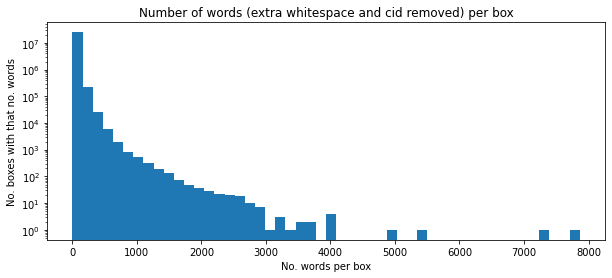

In [406]:
import matplotlib.pyplot as plt
df['nwords_stripped_nocid'].plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. words per box')
plt.ylabel('No. boxes with that no. words')
plt.title('Number of words (extra whitespace and cid removed) per box')
plt.show()

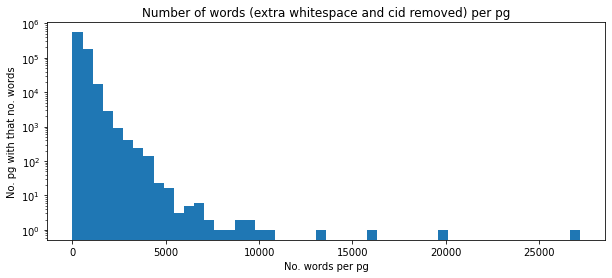

In [407]:
import matplotlib.pyplot as plt
df.groupby(['file', 'pg']).nwords_stripped_nocid.sum().plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. words per pg')
plt.ylabel('No. pg with that no. words')
plt.title('Number of words (extra whitespace and cid removed) per pg')
plt.show()

In [408]:
vv = df.groupby(['file', 'pg']).nwords_stripped_nocid.sum()
vv[vv > 25000]

file                                                                                                       pg
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs/224952_OF Report 5799.pdfminer_split.txt  18    27169
Name: nwords_stripped_nocid, dtype: int64

In [409]:
df[(df.file=='/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs/224952_OF Report 5799.pdfminer_split.txt') & (df.pg == 18)]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,nchars,nwords_stripped,id,id1,nchars_stripped,nchars_stripped_nocid,nwords_stripped_nocid
Unnamed: 0,,,,,,,,,,,,,,,
22083,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,465.840000,723.809544,475.261188,732.764700,(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(...,/nrcan_p2/data/02_intermediate/20201117/geosca...,98,49,224952_OF Report 5799,224952,98,98,49
22084,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,465.719106,692.112276,471.180000,697.335060,(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(...,/nrcan_p2/data/02_intermediate/20201117/geosca...,98,49,224952_OF Report 5799,224952,98,98,49
22085,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,484.380000,662.781100,497.988000,674.760100,57°\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,4,1,224952_OF Report 5799,224952,4,4,1
22086,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,454.740000,643.512516,460.199964,648.735300,(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(...,/nrcan_p2/data/02_intermediate/20201117/geosca...,98,49,224952_OF Report 5799,224952,98,98,49
22087,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,455.520000,626.429544,464.941188,635.384700,(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(\n(...,/nrcan_p2/data/02_intermediate/20201117/geosca...,98,49,224952_OF Report 5799,224952,98,98,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,51.660000,27.996100,143.303880,124.557700,0.00 to 0.25 (222)\n(\n(\n(\n(\n(\n(\n(\n(\n(...,/nrcan_p2/data/02_intermediate/20201117/geosca...,766,350,224952_OF Report 5799,224952,757,757,350
22436,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,129.109056,36.536220,143.303880,47.157600,(1)\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,6,1,224952_OF Report 5799,224952,5,5,1
22437,<class 'pdfminer.layout.LTTextBoxHorizontal'>,18,182.700258,120.106296,250.074738,133.994016,Clay/Silt Ratio\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,16,2,224952_OF Report 5799,224952,16,16,2


**analysis** the example with a huge number of words is probably a map, some of the others might be tables

### Width/height

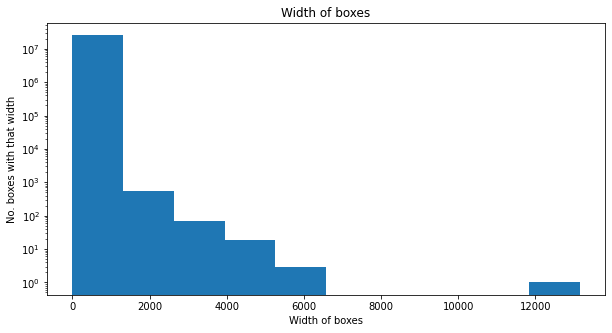

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(df.pos_x1 - df.pos_x0).plot.hist()
plt.yscale('log')
plt.xlabel('Width of boxes')
plt.ylabel('No. boxes with that width')
plt.title('Width of boxes')
plt.show()

In [74]:
vv = df[(df.pos_x1 - df.pos_x0) > 10000]

In [79]:
display(vv)
vv.text.iloc[0]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,nchars,nwords_stripped,id,id1,nchars_stripped,nchars_stripped_nocid,nwords_stripped_nocid,preprocessing_rp_v1,fileonly
Unnamed: 0,,,,,,,,,,,,,,,,,
836,<class 'pdfminer.layout.LTTextBoxHorizontal'>,25,72.024,198.788,13218.24,264.926,Pyrite: Unit moderately pyritic with main pyri...,/nrcan_p2/data/02_intermediate/20201117/geosca...,4785,78,314567_of_8468,314567,418,418,78,Pyrite: Unit moderately pyritic with main pyri...,314567_of_8468.pdfminer_split.txt


'Pyrite: Unit moderately pyritic with main pyrite occurrences at: a) pyrite band 4295.50 – 4295.52 m, 30 \n– 40 % pyrite here; b) pyrite band 4297.74 – 4297.73 m, 20% pyrite; c) pyrite nodule 4302.18 – 4302.20 \nm; d) pyrite band 4306.57 – 4306.58 m; e) pyrite nodule 4308.15 – 4308.16 m; f) pyrite band 4315.18 \n– 4315.19 m; g) pyrite band 4316.35 – 4316.40 m; h) pyrite band 4319.09 m; i) pyrite band 4322.80 – \n4322.81 m.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [80]:
vv = df[(df.pos_x1 - df.pos_x0) <= 1]

In [81]:
display(vv)
vv.text.iloc[0]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,nchars,nwords_stripped,id,id1,nchars_stripped,nchars_stripped_nocid,nwords_stripped_nocid,preprocessing_rp_v1,fileonly
Unnamed: 0,,,,,,,,,,,,,,,,,
476,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17,358.810000,1058.400100,359.770000,1073.40010,· \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,3,1,100327,100327,2,2,1,* \n,100327.pdfminer_split.txt
490,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17,557.260900,1051.886800,558.152000,1054.08320,' \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,3,1,100327,100327,2,2,1,' \n,100327.pdfminer_split.txt
493,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17,438.000000,1058.400100,438.720000,1073.40010,":\n,\n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,4,2,100327,100327,4,4,2,":\n,\n",100327.pdfminer_split.txt
495,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17,311.690706,1040.992278,312.540731,1044.78679,.\n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,2,1,100327,100327,2,2,1,.\n,100327.pdfminer_split.txt
501,<class 'pdfminer.layout.LTTextBoxHorizontal'>,17,228.970000,1058.400100,229.930000,1073.40010,~\n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,2,1,100327,100327,2,2,1,~\n,100327.pdfminer_split.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,<class 'pdfminer.layout.LTTextBoxHorizontal'>,2,139.890000,768.186000,140.590000,770.49800,•\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,2,1,128139_of_2026_marathon_maps,128139,2,2,1,*\n,128139_of_2026_marathon_maps.pdfminer_split.txt
314,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4,374.890000,642.189975,375.850000,651.49010,:\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,2,1,128139_of_2026_marathon_maps,128139,2,2,1,:\n,128139_of_2026_marathon_maps.pdfminer_split.txt
323,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4,187.930240,536.340000,188.650240,549.24000,:\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,2,1,128139_of_2026_marathon_maps,128139,2,2,1,:\n,128139_of_2026_marathon_maps.pdfminer_split.txt


'· \n'

#### Height

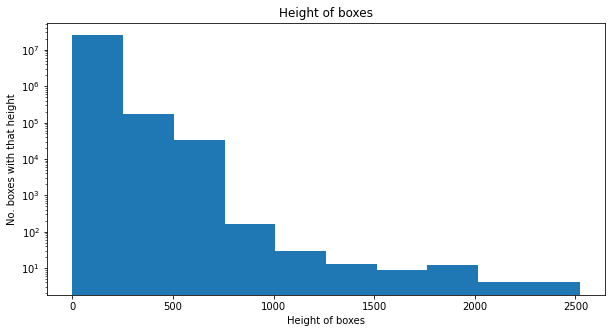

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(df.pos_y1 - df.pos_y0).plot.hist()
plt.yscale('log')
plt.xlabel('Height of boxes')
plt.ylabel('No. boxes with that height')
plt.title('Height of boxes')
plt.show()

In [89]:
vv = df[(df.pos_y1 - df.pos_y0) > 2000]
display(vv)
vv.text.iloc[5]

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,nchars,nwords_stripped,id,id1,nchars_stripped,nchars_stripped_nocid,nwords_stripped_nocid,preprocessing_rp_v1,fileonly
Unnamed: 0,,,,,,,,,,,,,,,,,
115,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,20.000000,787.485400,637.640000,2951.445400,The Cabot Lake Ice Stream (CLIS) is located ...,/nrcan_p2/data/02_intermediate/321077.pdfminer...,3913,612,321077,321077,3806,3806,612,The Cabot Lake Ice Stream (CLIS) is located a...,321077.pdfminer_split.txt
441,<class 'pdfminer.layout.LTTextBoxHorizontal'>,15,-58.854008,162.266670,1101.685347,2536.618189,. :S' \n,/nrcan_p2/data/02_intermediate/20201117/geosca...,7,2,129773_of_0853_roll_5,129773,6,6,2,. :S' \n,129773_of_0853_roll_5.pdfminer_split.txt
4144,<class 'pdfminer.layout.LTTextBoxVertical'>,15,106.169296,293.391200,220.005961,2814.772033,(cid:104)(cid:116)(cid:116)(cid:112)(cid:58)(c...,/nrcan_p2/data/02_intermediate/20201117/geosca...,284,1,220852_Open File,220852,284,1,0,\n,220852_Open File.pdfminer_split.txt
11859,<class 'pdfminer.layout.LTTextBoxVertical'>,16,5915.163680,145.836310,6011.073680,2494.320310,h t t p : / / w w w . e m . g o v . b c . c a ...,/nrcan_p2/data/02_intermediate/20201117/geosca...,66,33,220852_Open File,220852,66,66,33,h t t p : / / w w w . e m . g o v . b c . c a ...,220852_Open File.pdfminer_split.txt
11887,<class 'pdfminer.layout.LTTextBoxVertical'>,16,39.768120,104.039060,135.678120,2452.523060,http://www.em.gov.bc.ca/oilandgas\n,/nrcan_p2/data/02_intermediate/20201117/geosca...,34,1,220852_Open File,220852,34,34,1,http:/www.em.gov.bc.ca/oilandgas\n,220852_Open File.pdfminer_split.txt
13480,<class 'pdfminer.layout.LTTextBoxVertical'>,17,5822.120200,397.695700,6021.770200,2565.345700,http://nrd.nrcan.gc.ca/slavecomp\nhttp://nrd.n...,/nrcan_p2/data/02_intermediate/20201117/geosca...,99,3,220852_Open File,220852,99,99,3,http:/nrd.nrcan.gc.ca/slavecomp\nhttp:/nrd.nrc...,220852_Open File.pdfminer_split.txt
13762,<class 'pdfminer.layout.LTTextBoxVertical'>,17,-39.602200,480.179900,160.047800,2647.829900,http://nrd.nrcan.gc.ca/slavecomp\nhttp://nrd.n...,/nrcan_p2/data/02_intermediate/20201117/geosca...,99,3,220852_Open File,220852,99,99,3,http:/nrd.nrcan.gc.ca/slavecomp\nhttp:/nrd.nrc...,220852_Open File.pdfminer_split.txt
60,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,992.884300,239.256158,1659.347500,2440.310645,No stratigraphic order implied; overlapping ge...,/nrcan_p2/data/02_intermediate/20201117/geosca...,15091,2097,295537_of_7683_2,295537,14970,14970,2097,No stratigraphic order implied; overlapping ge...,295537_of_7683_2.pdfminer_split.txt


'http://nrd.nrcan.gc.ca/slavecomp\nhttp://nrd.nrcan.gc.ca/slavecomp\nhttp://nrd.nrcan.gc.ca/slavecomp\n'

**analysis** width/height is not a good proxy for content

### Vocab without removing punct

In [417]:
df.head()

,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,nchars,nwords_stripped,id,id1,nchars_stripped,nchars_stripped_nocid,nwords_stripped_nocid,text_stripped_nocid
Unnamed: 0,,,,,,,,,,,,,,,,
0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,252.73,774.7300,338.896600,793.2065,~s 1.51 \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,10,2,100327,100327,8,8,2,~s 1.51
1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,162.99,560.5981,351.490061,572.5393,"SL.\VE · POI~T D,\ Tt:~\ PROJECT \n",/nrcan_p2/data/02_intermediate/100327.pdfminer...,36,6,100327,100327,33,33,6,"SL.\VE · POI~T D,\ Tt:~\ PROJECT"
2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,141.37,524.1281,191.928100,536.0693,PHASE I \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,10,2,100327,100327,8,8,2,PHASE I
3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,207.76,522.8912,397.459655,541.1936,IXVESTIG..\TIO:\ or OUTCROPS \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,32,3,100327,100327,29,29,3,IXVESTIG..\TIO:\ or OUTCROPS
4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,162.91,486.9281,365.388683,498.8693,RA.-\SCll and AS SOCI A TES; LTD. \n,/nrcan_p2/data/02_intermediate/100327.pdfminer...,38,7,100327,100327,34,34,7,RA.-\SCll and AS SOCI A TES; LTD.


In [4]:
vocab_stripped_nocid = df.text_stripped_nocid.str.split().explode()
vocab_stripped_nocid

Unnamed: 0
0             ~s
0           1.51
1         SL.\VE
1              ·
1          POI~T
         ...    
952      OVERLAY
953    OPE~i~L~N
953    26~0TARIO
954    NORTHW~TS
954          528
Name: text_stripped_nocid, Length: 319543261, dtype: object

In [5]:
vocab_stripped_nocid = vocab_stripped_nocid.to_frame().value_counts()
vocab_stripped_nocid

text_stripped_nocid
.                      10867888
the                    10652654
of                      8827778
and                     6408120
in                      3985351
                         ...   
lachians.                     1
lachians,                     1
lachians)                     1
lachians".                    1
oncoidal-                     1
Length: 9767255, dtype: int64

In [2]:
import pandas as pd
#df.to_parquet('/nrcan_p2/data/02_intermediate/20210106/compiled_csvs_all_filtered_repaired_extra.parquet')
#vocab_stripped_nocid.to_frame().rename(columns={0:'count'}).to_parquet('/nrcan_p2/data/02_intermediate/20210106/vocab_stripped_nocid.parquet')
vocab_stripped_nocid = pd.read_parquet('/nrcan_p2/data/02_intermediate/20210106/vocab_stripped_nocid.parquet')

In [3]:
vocab_stripped_nocid

,count
text_stripped_nocid,
.,10867888
the,10652654
of,8827778
and,6408120
in,3985351
...,...
lachians.,1
"lachians,",1
lachians),1


In [5]:
v = vocab_stripped_nocid.reset_index()

In [6]:
v

,text_stripped_nocid,count
0,.,10867888
1,the,10652654
2,of,8827778
3,and,6408120
4,in,3985351
...,...,...
9767250,lachians.,1
9767251,"lachians,",1
9767252,lachians),1
9767253,"lachians"".",1


In [7]:
v['text_stripped_no_cid_lowered'] = v.text_stripped_nocid.str.lower()
v

,text_stripped_nocid,count,text_stripped_no_cid_lowered
0,.,10867888,.
1,the,10652654,the
2,of,8827778,of
3,and,6408120,and
4,in,3985351,in
...,...,...,...
9767250,lachians.,1,lachians.
9767251,"lachians,",1,"lachians,"
9767252,lachians),1,lachians)
9767253,"lachians"".",1,"lachians""."


In [9]:
vocab_stripped_nocid_lower = v.groupby('text_stripped_no_cid_lowered')['count'].sum()
vocab_stripped_nocid_lower

text_stripped_no_cid_lowered
              12251
               111
               23
               3
              9
               ...  
𝟎                 10
𝟏                  1
𝟏−𝑨𝑨𝑹              1
𝟐                  1
𝟐𝟐∙|𝑯𝑯𝑯𝑯|𝟐𝟐        2
Name: count, Length: 9081464, dtype: int64

In [10]:
v = vocab_stripped_nocid_lower.to_frame()
v = v.reset_index()
v

,text_stripped_no_cid_lowered,count
0,,12251
1,,111
2,,23
3,,3
4,,9
...,...,...
9081459,𝟎,10
9081460,𝟏,1
9081461,𝟏−𝑨𝑨𝑹,1
9081462,𝟐,1


In [37]:
!pip install spacy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.5 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 18.1 MB/s eta 0:00:01
     |████████████████████████████████| 186 kB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 38.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 38.4 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.0 MB 2.4 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047106 sha256=df3a1978b029b09336dcd5d10c70ef3ae951030e913dae8a0ac92da15ff170d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-m1t9d4j0/wheels/ee/4d/f7/563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [38]:
words = list(vocab_stripped_nocid_lowered_decode_printable.sample(1000).index.values)

In [40]:
words

['dovonlan',
 'mcdevitt',
 "c::ii'",
 'tholeiites',
 'dilsseldorf.',
 'front")',
 'con{',
 '"laisse',
 '57.5-61',
 "cl'hyclrocarbures",
 '54368',
 'queen\'"',
 '094:09:19.79w',
 'scltor.',
 'salzkammer-',
 'ra11portent',
 '14,407',
 '($29.00',
 '----unwrough',
 '088.6',
 'cheakamus,',
 '.accessi',
 'revol',
 'pediiim',
 'all_yet',
 '891564',
 'jitcs',
 'pantie',
 'ca.meroceras',
 ';li1ae,stone,',
 "s',v",
 'lacial-lake',
 'ont.,,,,',
 '962.01',
 'cnlciforo11s',
 'c$fabric',
 'thamnoporids)',
 '4lfi5-4550m',
 '$22.50-',
 'gm-p205,',
 'c!aim.',
 '0.19%',
 '5263393',
 '21-42,',
 "on'ic&s",
 'pickett,',
 '*b0~',
 'shrub-grass',
 'gsc*1286',
 'mr-6',
 'infori~tion',
 'informatior!',
 'was+',
 '69b),',
 'ob7g069249',
 'expor-ting',
 'csd9',
 'dakhnov,',
 '394075',
 ',447-',
 '#5-14',
 '"".-------------------,',
 '/1e;jj',
 'stipu',
 'miscoll',
 'r(n-1)',
 'cli:-;:-;cmin:ited',
 '2mgo.l',
 '11ser',
 '(79/180)',
 '(mcgao;',
 'tr-17,',
 ';t.qcl',
 '11.7-per-cent',
 'dm-71-152b1',
 'miarolytic',

In [45]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = Tokenizer(nlp.vocab)
tokenizer = nlp.Defaults.create_tokenizer(nlp)

tokenized_words = [tokenizer(word) for word in words]
print(tokenized_words)

[dovonlan, mcdevitt, c::ii', tholeiites, dilsseldorf., front"), con{, "laisse, 57.5-61, cl'hyclrocarbures, 54368, queen'", 094:09:19.79w, scltor., salzkammer-, ra11portent, 14,407, ($29.00, ----unwrough, 088.6, cheakamus,, .accessi, revol, pediiim, all_yet, 891564, jitcs, pantie, ca.meroceras, ;li1ae,stone,, s',v, lacial-lake, ont.,,,,, 962.01, cnlciforo11s, c$fabric, thamnoporids), 4lfi5-4550m, $22.50-, gm-p205,, c!aim., 0.19%, 5263393, 21-42,, on'ic&s, pickett,, *b0~, shrub-grass, gsc*1286, mr-6, infori~tion, informatior!, was+, 69b),, ob7g069249, expor-ting, csd9, dakhnov,, 394075, ,447-, #5-14, "".-------------------,, /1e;jj, stipu, miscoll, r(n-1), cli:-;:-;cmin:ited, 2mgo.l, 11ser, (79/180), (mcgao;, tr-17,, ;t.qcl, 11.7-per-cent, dm-71-152b1, miarolytic, paracavate, 326,51, x-!by, w~b, lomatic, 209.q, bj<~ll., pi3/min, 1---..----...i, 52"4, raw-harvest, ,)oint, sublimes), 2494g, gl~ciai, oft.lie, folk-pittman, 3203,7, kbe6ek, sensibi, reef-bank, 0elevahims, aticus,, li8*11, .47

In [ ]:
vocab_stripped_nocid_lowered_decode_printable = vocab_stripped_nocid_lowered_decode_printable.reset_index()

In [63]:

s

'([!"#$%&\\\'()*+,-./:;<=>?@[\\\\]^_`{|}~])\\1+'

In [98]:
#string.punctuation
vocab_stripped_nocid_lowered_decode_printable['text_stripped_submultipunct'] = vocab_stripped_nocid_lowered_decode_printable.reset_index().text_stripped_nocid_lowered_decode_spl.str.replace(s, r'\1')

In [97]:
#\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
s = r"([!\-\"#$%&\'()*+,./:;<=>?@[\\\]^_`{|}~])\1+"
print(s)
vocab_stripped_nocid_lowered_decode_printable.head().reset_index().text_stripped_nocid_lowered_decode_spl.str.replace(s, r'\1')

([!\-\"#$%&\'()*+,./:;<=>?@[\\\]^_`{|}~])\1+


0    !
1    !
2    !
3    !
4    !
Name: text_stripped_nocid_lowered_decode_spl, dtype: object

In [73]:
vocab_stripped_nocid_lowered_decode_printable['text_stripped_nopunct'] = vocab_stripped_nocid_lowered_decode_printable.reset_index().text_stripped_nocid_lowered_decode_spl.str.replace(f'[{string.punctuation}]', '')

In [99]:
vocab_stripped_nocid_lowered_decode_printable.text_stripped_submultipunct

0               !
1               !
2               !
3               !
4               !
            ...  
8827696    ~56500
8827697    ~58000
8827698         ~
8827699     ~-+-~
8827700     ~1000
Name: text_stripped_submultipunct, Length: 8827701, dtype: object

In [126]:
display(vocab_stripped_nocid_lowered_decode_printable.head())
vocab_stripped_nocid_lowered_decode_printable['text_stripped_submultipunct_split_end'] = vocab_stripped_nocid_lowered_decode_printable.text_stripped_submultipunct.str.split(r'(^)([!\-\"#$%&\'()*+,./:;<=>?@[\\\]^_`{|}~]+)|([!\-\"#$%&\'()*+,./:;<=>?@[\\\]^_`{|}~]+)($)').apply(lambda x: [xx for xx in x if xx is not None and xx != ''])

,text_stripped_nocid_lowered_decode_spl,count,text_stripped_submultipunct,text_stripped_nopunct,text_stripped_submultipunct_split_end
0,!,153040,!,,[!]
1,!!,2745,!,,[!]
2,!!!,1408,!,,[!]
3,!!!!,325,!,,[!]
4,!!!!!,233,!,,[!]


In [127]:
vocab_stripped_nocid_lowered_decode_printable.sample(20)

,text_stripped_nocid_lowered_decode_spl,count,text_stripped_submultipunct,text_stripped_nopunct,text_stripped_submultipunct_split_end
3842712,_cn,1,_cn,cn,"[_, cn]"
7782013,"schls!*l.,",1,"schls!*l.,",schlsl,"[schls!*l, .,]"
3509119,"8t,.3",1,"8t,.3",8t3,"[8t,.3]"
7801149,seabe~,3,seabe~,seabe,"[seabe, ~]"
6208882,"l0,4541",2,"l0,4541",l04541,"[l0,4541]"
8621678,wobbe.,1,wobbe.,wobbe,"[wobbe, .]"
6773638,nearet,1,nearet,nearet,[nearet]
4183727,bateau).,1,bateau).,bateau,"[bateau, ).]"
354861,(200-340,1,(200-340,200340,"[(, 200-340]"
4520397,"charlette,",5,"charlette,",charlette,"[charlette, ,]"


In [155]:
vocab_no_punct = vocab_stripped_nocid_lowered_decode_printable.groupby('text_stripped_nopunct').sum('count')
vocab_no_punct

,count
text_stripped_nopunct,
,23354193
0,1179394
00,233164
000,191971
0000,22200
...,...
zzzzzzbijlxltl,1
zzzzzzjzzzzzzzz,1
zzzzzzzz,1


In [162]:
vocab_no_punct[vocab_no_punct['count'] >=5]

,count
text_stripped_nopunct,
,23354193
0,1179394
00,233164
000,191971
0000,22200
...,...
zzy,6
zzz,28
zzzz,25


In [128]:
vvv = vocab_stripped_nocid_lowered_decode_printable[['text_stripped_submultipunct_split_end', 'count']].explode('text_stripped_submultipunct_split_end').groupby('text_stripped_submultipunct_split_end').sum()
vvv

,count
text_stripped_submultipunct_split_end,
!,320311
"!""",4188
"!""!",44
"!""!""",10
"!""!""!""+)",1
...,...
~}~:~,1
~}~:~.,1
~}~:~:,2


In [145]:
# 
display(vvv.head())
#vvv.head().reset_index()[~
vvv_no_triple_punct = vvv.reset_index()[~vvv.reset_index().text_stripped_submultipunct_split_end.str.contains(r'^[!\-\"#$%&\'()*+,./:;<=>?@[\\\]^_`{|}~]{3,}$')]

,count
text_stripped_submultipunct_split_end,
!,320311
"!""",4188
"!""!",44
"!""!""",10
"!""!""!""+)",1


In [146]:
vvv_no_triple_punct

,text_stripped_submultipunct_split_end,count
0,!,320311
1,"!""",4188
375,!#,152
456,!$,247
598,!%,297
...,...,...
6056049,~],220
6056103,~_,1025
6056595,~`,27
6056596,~{,262


In [150]:
vvv_no_triple_punct.sample(20)

,text_stripped_submultipunct_split_end,count
2612679,c-ss48,2
2545971,brigadc-sel,1
970977,24*616,1
5566510,syntax(es,1
1622180,5966e+03,1
4740328,otuka1namonn,1
1628769,5a5l,1
1993217,"82,326",1
5505059,strathcarn,1
5935396,wc.y,4


In [154]:
vvv_no_triple_punct[vvv_no_triple_punct['count'] >= 2]

,text_stripped_submultipunct_split_end,count
0,!,320311
1,"!""",4188
375,!#,152
456,!$,247
598,!%,297
...,...,...
6056049,~],220
6056103,~_,1025
6056595,~`,27
6056596,~{,262


In [163]:
vvv_no_triple_punct[vvv_no_triple_punct['count'] >= 5]

,text_stripped_submultipunct_split_end,count
0,!,320311
1,"!""",4188
375,!#,152
456,!$,247
598,!%,297
...,...,...
6056049,~],220
6056103,~_,1025
6056595,~`,27
6056596,~{,262


## Double spaced or single spaced

In [94]:
df2 = df.reset_index().set_index(['file', 'id1', 'pg'])

In [96]:
import numpy as np
K=10
idx = np.random.choice(df2.index.unique(), K, replace=False)

In [97]:
selection = df2.loc[idx].reset_index(drop=False)

In [103]:
import sys
sys.path.append('../nrcan_p2')
sys.path.append('..')
from nrcan_p2.data_processing.preprocessing import sentence_tokenization_spacy

for gname, group in  selection.groupby(['file', 'id1', 'pg']):
    print('==========================')
    for irow, row in group.iterrows():
        display(row.text)
        print('---')

'- 7  -\n'

---


'British Columbia \n'

---


'The  rock is  a  fine- to  medium-grained,  greygranodioritewithfeld(cid:173)\n'

---


'spar phenocrysts  up to  6  mm  and  more  in length,  It consists  of subhedral \nplagioclase  (45%)  with marked  occillatory zoning,  K  feldspar  (15%)  which is \nmostly orthoclast but includes  minor perthite,  quartz  (25%),  hornblende  (5%) \nmantling augite  (6%),  and  ragged  grains  of biotite  (4%).  The  specimen is \nslightly  more  quartzose  and  richer  in  potash  feldspar  than  the  average  for \nthis  pluton. \n'

---


'This  date  of 30 ±3  m.y.  on the  Central  Kano  phase is slightlyolder, \n'

---


'as  predicted,  than  a  hornblende -biotite  pair of  26  ± 6  m. y.  and  2 9  ±  2  m. y. \nrespectively determined  for  the  East Kano  phase  (GSC  67-16  and  -17)*. \n'

---


'*see  Geol.  Surv.  Can.  Paper  69-2A,  1970. \n'

---


'GSC  70-3 \n'

---


'Hornblende,  K-Ar  age  156 ±  10  m. y. \n'

---


'40 \n'

---


'40 \n'

---


'. \n'

---


'. \n'

---


'K  =  0,33%,  Ar/  K  =  0.0095,  rad1ogemc  Ar=  42%. \nConcentrate:  Slightly pleochroic  light  green to  light brown \nhornblende  with  some  associated  chlorite  alteration.  Grain \nsurfaces  are  commonly pitted. \n'

---


'(103  G) \n'

---


'From quartz diorite. \nChinukundl  Creek,  Graham Island,  Queen  Charlotte  Islands, \nBritish Columbia,  53 ° l 9 1N,  131°58 1W.  Chinukundl  Pluton. \nSample  65-AB-22,  collected by A.  Sutherland  Brown,  interpreted \nby J.E.  Reesor. \n'

---


'The  rock is  a  medium- to  coarse-grained biotite-hornblende  quartz \n'

---


'diorite  consisting of plagioclase  (65%),  quartz  (15%),  hornblende  (10%), \nbiotite-chlorite  (7%),  and  opaques  (3%).  Texture  is  seriate with intense  seri(cid:173)\ncite  alteration of the  zoned  plagioclase  laths  and  partial to  complete  chloriti(cid:173)\nzation of hornblende  and biotite. \n'

---


'The  Chinukundl  Pluton was  not  seen in  contact with the  Haida \n'

---


'Formation  (Albian),  but was  encountered in  a  drillhole  through Haida and \nYakoun  Formations  (Royalite  Queen  Charlotte).  However,  the  hole  log does \nnot provide  sufficient information to distinguish between  a  metamorphic  or \nunconformable  contact.  Therefore,  together with  some  uncertainty in the  age \ndetermination due  to the  high degree  of alteration  of the  rock,  the  age  cannot \nbe  considered to be  firmly established. \n'

---


'GSC  70-4 \n'

---


'Hornblende,  K-Ar  age  74  ±4 m.y. \n'

---


'40 \n'

---


'40 \n'

---


'. \n'

---


'K  =  0, 75%,  Ar/  K  =  0.0044,  radiogemc  Ar=  57%. \nConcentrate:  Clean,  pleochroic,  dark  green to  light brown \nhornblende with no  visible  impurities. \n'

---


'(104  0) \n'

---


'From  granite. \nHead  ofNazcha Creek,  British Columbia,  60°12 1N,  131°061W. \nMap-unit  26,  GSC  Map  18-1968.  Sample  Y-8RA-l-65,  collected \nand  interpreted by J, E.  Reesor. \n'

---


'CANADA \n'

---


'MINISTÈRE  DES \n'

---


'Commission géologique, Canada \n'

---


'1 MÉMOIRE  N°  3Ïf \n'

---


'DISTRICT  DE  WHEATON \n'

---


'TERRITOIRE  DU  YUKON \n'

---


'OTTAWA \n'

---


'IMPRIMERIE  DU  GOUVERNEMENT \n'

---


'1915 \n'

---


'No  1229 \n'

---


'@  Minister of Supply and Services Canada 1992 \n'

---


'Available in Canada through \n'

---


'authorized bookstore agents and other bookstores \n'

---


'or by mail from \n'

---


'Canada Communication Group - Publishing \nOttawa, Canada KIA 0S9 \n'

---


'and from \n'

---


'Geological Survey of Canada offices: \n'

---


'601 Booth Street \nOttawa. Canada KIA 0E8 \n'

---


'3303-33rd Street N.W., \nCalgary, Alberta T2L 2A7 \n'

---


'I00 West Pender Street, \nVancouver, B.C.  V6B 1R8 \n'

---


'A deposit copy of this publication is also available for \nreference in public libraries across Canada \n'

---


'Cat. No.  M44-9211 A \nISBN  0-660-57062-9 \n'

---


'Price subject to change without notice \n'

---


'Cover description \n'

---


'Mount  Logan  was  named  after  Sir  William  Logan,  the  fist \nDirector of the Geological Survey of Canada, has a peak elevation \nin excess of  5951 m, and is one of  the largest mountain massifs \nin  the world. The main mass  is composed  of  grey Jurassic and \nCretaceous granitic rock which intrudes Wrangellia, whereas the \nlower southwestern slopes are underlain by  sedimentary strata of \nthe Cretaceous Valdez Group of the Chugach Terrane. Separating \nthese two rock types is the Border Ranges Fault, clearly shown as \nthe  sharp  change  from  grey  to  dark  brown  colours.  Photo  by \nC.J. Yorath. KGS 2262 \n'

---


"1  Description de la photo couverture \nLe mont Logan, qui s'Clbve i plus de 5 95 1  m d'altitude,  est le \nplus  haut  sommet  au  Canada,  et  le deuxibme en  AmCrique  du \nNord.  NommC  d'aprbs  Sir  William  Logan,  qui  fut  le  premier \ndirecteur de la Commission gCologique du Canada, le mont Logan \nforme aussi un  des plus imposants Cdifices montagneux dans le \nmonde.  Son corps principal  se compose  de roches granitiques \ngrises du Jurassique  et du  CrCtacC qui recoupent la Wrangellie, \ntandis que son versant sud-ouest renferme dans sa partie infkrieure \ndes  strates  ~Cdimentaires appartenant  au  Groupe  de  Valdez \n(CrCtacC)  du  terrane  de  Chugach.  Ces  deux  lithologies  sont \nsCparCes par la faille de Border Ranges, qui se reconnait aisCment \nsur la photo i un brusque changement de couleur du gris au brun \nfoncC. Photo : C.J. Yorath. KGS 2262 \n"

---


'118 \n'

---


'HOLE  No.  C-2- Continued \n'

---


'Lithology \n'

---


'Gril1lsby  Formation \n'

---


'Depth \n'

---


'Feet \n'

---


'-173- .. \n'

---


"172·8-173 \n173 \n173··\\-176 \n176  -176·4 \n176· .. -176·7 \n176·7-1769 \n176·9-1nl \n177-1-177-4 \n177·4-177-5 \n.177-5-177-9 \n177-9-180·5 \n180·5-183·-1-\n183·-1--185·6 \n185·6-187·7 \n187·7-188·1 \n188·1-191·2 \n191·2-191-4 \n19H-192·7 \n192·7-193 \n193  -19 .. \n19 .. \n194·2-196 \n196  -106·3 \n196·3- t 99·5 \n199·5- t 99·8 \n199·8-200· 1 \n200·1-200·8 \n200·8-203·1 \n203·1-204·5 \n204'5-205'1 \n205·1-206 \n206  -208· 2 \n208· 2-209· 2 \n209· 2-209· 6 \n209·6-211·6 \n211-6-213· 7 \n213·7-214·6 \n214·6-215·2 \n215·2-218·5 \n218·5-219·4 \n"

---


'-194·2 \n'

---


'219· .. -220 \n'

---


'220  -221·4 \n221·4-226·8 \n226·8-230·[ \n230· 1-230·6 \n230· 6-230· 7 \n230· 7-232·4 \n232-4-246 \n246  -248·6 \n248·6-251·9 \n'

---


'Sandston e ; argillaceolls,  green \nShale;  red \nSandstone;  white  to  light grey,  \\·er~·  linp  grained \nShidc;  red  and  green \nSandstone;  greenish  grey \nShale;  recl \nSandstone;  reel \nShale;  rr\'d \nSa ndstonc;  red \nShale;  red \n5an(],;tone;  red  and  greenish  grey \nShale:  and  sandstone;  reel \nSa nd slone;  reel \nSandstone;  red;  green  shale  fragments  at 185·7  and  185·8  feet \nShale;  red \nSandstune;  red \nShal<,;  red \nSandstone;  red \nShale;  red \nSandstone;  red;  red  shale fra"mellts \nShale;  red \nSanelstone  to  siltstone ; red;  shale  parting" \nShale;  red \nSandstone;  reel  and  green;  shale  pellets at  J97·9  feet \nShale;  red \nSandstone;  red  a nd  green \nShale;  red \nSandstone;  reel  and  greeni sh  grey \nShale;  red \nSandstone;  red \nShale;  red,  green  mottled \nSandstone;  red  a nd  green \nShale;  red \nSandstone;  reel \nShale ; red \nShale and sandstone;  red \nShal e ; red \nSandstone;  red,  line  grained \n

---


"PO'1Der  Glen  Formation \n"

---


"Sandston{';  minor  shale;  black  shale  fragments  and \n"

---


'iron  st"ill~  near \n'

---


'upper COlltact \n'

---


'Sandstolle;  white,  hard,  intact \nShale and  thin sandstone  bands \nSandstone; calcareous; shale  partings and  fragments \nShale; gTey \nSandstone;  calcareous \nShale; grey \nShale;  minor sandstone \nSandstone;  whiti sh  grey,  calcareolls;  many  thin  shale  partings \nShale;  minor sandstone \n'

---


'Sample # 19: GAE86-292; BLG: Todagin assemblage\n'

---


'1 mm\n'

---


'x32 PPL\n'

---


'B\n'

---


'1 2 3 4 5 6 7 8 9\n'

---


'10\n'

---


'11\n'

---


'12\n'

---


'13\n'

---


'14\n'

---


'A\n'

---


'2 mm\n'

---


'x10 PPL\n'

---


'A\n'

---


'B\n'

---


'C\n'

---


'D\n'

---


'E\n'

---


'F\n'

---


'G\n'

---


'H\n'

---


'I\n'

---


'J\n'

---


'K\n'

---


'L\n'

---


'M\n'

---


'N\n'

---


'O\n'

---


'P\n'

---


'Q\n'

---


'R\n'

---


'S\n'

---


'A\n'

---


'B\n'

---


'C\n'

---


'D\n'

---


'E\n'

---


'F\n'

---


'G\n'

---


'H\n'

---


'I\n'

---


'J\n'

---


'K\n'

---


'L\n'

---


'M\n'

---


'N\n'

---


'O\n'

---


'P\n'

---


'Q\n'

---


'R\n'

---


'S\n'

---


'250 µm\n'

---


'x100 PPL\n'

---


'D\n'

---


'1 2 3 4 5 6 7 8 9\n'

---


'10\n'

---


'11\n'

---


'12\n'

---


'13\n'

---


'14\n'

---


'C\n'

---


'250 µm\n'

---


'Plate Tod-13\n'

---


'GR 5930 03\n'

---


'x100 PPL\n'

---


'Hematite: Opasatika  River area  \n'

---


'211 \n'

---


'PAGE \n103 \n174, 175 \n139 \n86 \n184 \n145 \n164 \n183 \n70 \n163 \n164 \n8 \n26 \n51 \n 188, 189, 191, 192, 193 \n 94 \n187 \n82 \n145 \n 51, 52 \n70 \n88 \n176 \n55 \n 106 \n178 \n123 \n100 \n49 \n177 \n101 \n104 \n52 \n164 \n1 \n188, 191, 193 \n12 \n84 \n188, 189, 192 \n 189, 192 \n175 \n17 \n157 \n112 \n48 \n109 \n1 \n96 \n'

---


'151 \n151 \n113 \n18 \n196 \n26 \n179 \n199 \n199 \n23 \n14 \n110 \n24 \n73 \n21 \n'

---


'I \n'

---


'„\n„\n„\n„\n„\n„\n»\n» (cid:9)\n„\n'

---


'I, (cid:9)\n'

---


'„\n»\n'

---


',7 (cid:9)\n'

---


"Pictou  co (cid:9)\nPlayfair  mine \nPoitras-Watt  claims \nPotter  mine \nQuebec  province \nQueen's co.,  N.B. \nRocky  Brook area \nRound Lake „  \nSt.  George, N.B \nSt.  John  co., N.B. (cid:9)\nSalt  Spring island \nSand creek \nSeine  bay \nShell bed (cid:9)\nShining Tree  Lake locations (cid:9)\nSouth Range, N.S \n"

---


'„ (cid:9)\n'

---


'Section Michipicoten  area \n'

---


'Spalding tp \nSteeprock Lake  area (cid:9)\nStill lake \nStobie  iron  mine \nSutherland-Meiklefield  deposit \nSutton  Mill  Lakes area \nTimagami  Lake  area (cid:9)\nTunnel lead \n'

---


',\n„\n» \n,\n„\n„\n» (cid:9)\n„\n„\n»\n„\n„ Wallbridge  mine \n„ Wanapitei  Lake  area \n» (cid:9) Watten tp \n„ Webster mine \n„\n„ Whitney tp \n„\n» (cid:9)\n„\n'

---


'Winnipeg  River  area \nYork co., N.B \nYukon  territory \n'

---


'Whitefish  River  area \n'

---


'-Hematite bed (cid:9)\nHesquiat  harbour \nHilliar  iron claims \nHoffman, M.  F.—opening on  farm  of (cid:9)\nHolland, George: ores on  farm  of   \nHolmes Watson  mine \nHomestake  mineral claim \nHopewell islands \nHowland  mine \nHunters  Island  area \nHuron  Mountain deposits \nHutsi river \nHutton  township  iron  range \n'

---


'Ilmenite:  Charlevoix  co \n'

---


'„ (cid:9)\n'

---


'St.  Urbain  deposits \n'

---


'Imperial  mine \nIndian Woman claim \nIngraham  mine \nIngs  Dr.—iron  location \nIntermediate  or  No.  2  lead \nInverness county \nIron  brook:  magnetite  and  hematite \nIron Creek bog iron  ore  deposits \nIron Crown mineral claim \nIron  Island:  hematite \nIron  King clàim \nIron  Lake  property \nIron Mask mineral claim \n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'(cid:9)\n'

---


'56 \n'

---


'quent  intervals removes the  more  weathered  surface and  doubtless \ndecreases somewhat  the  depth to whioh alteration is  effective. On the \nother  hand,  where low-lying deposits, less steeply inclined,  are  exposed to \nweathering agencies,  the zone of  alteration may extend to greater depth. \nIn  this  connexion  results obtained  on  distilling bituminous sand  in  the \nWhitaker-Pritchard  retort  in  October, 1924,  are of  interest. Bituminous \nsand which had been subjected to exposure  and  oxidation  gave an  appreci-\nable amount  of  semi-liquid  bitumen,  whereas  the  amount  of  bitumen \nderived from fresh bituminous  sand,  under similar conditions  and  tem-\nperatures, appeared to be practically  nil. \n'

---


'(f) Instability  of  Fresh Bituminous Sand.  The  writer has always \nmaintained that  excavation of  bituminous sand by  underground  mining \nmethods, is not commercially feasible. Experience  in the  shafts under \nconsideration substantiates this view. Shafts Nos. 1  and 2  were each \n11 feet long by 5 feet wide. They were timbered at frequent intervals \nby birch  square-sets,  lagged with 2-inch plank.  Corners  were reinforced \nby continuous strips  of 2-  by 4-inch  and 2-  by 6-inch scantling.  Cross \nbraces  of round  birch served  as  intermediate  supports.  Contacts between \nclay  and  bituminous sand constitute lines  of  weakness  and  water-seeps \nwere common. Particular care  was,  therefore, observed at such  points. \n'

---


'The above method of timbering proved satisfactory  as a  temporary \nmeasure, but at the  end of four weeks the shafts were  no  longer safe. This \nwas chiefly  due  to constant movement  in the body of  bituminous  sand, \nmore  especially where water-seeps increased  the  tendency to caving,  and \nto  the  fact that there is  no  solid  rock  strata to which the timbering can be \nsecured. Props, even when  set on a  broad base  of  heavy plank, rapidly \nsettle. \n'

---


'(g) Weathering of Fresh Bituminous Sand. \n'

---


"In  unaltered bituminous \nsand the  bond  between  the biturnen and grains of  sand is weaker than \nin  the  case of  weathered material. Consequently,  surfaces  that have been \nsheared by spades  or  other cutting-tools,  are of a  distinctly g-rey to \ngreyish-white  shade. Indeed, bitumen may be readily brushed by  the \nhand from  a  fresh wall  of a  shaft, thus exposing  the white grains of silicia. \nA similar  condition  is even  more  marked  in  the  case of  fresh auger cut-\ntings derived by boring unaltered bituminous  sand. In a very short  time, \nhowever, sufficient bitumen exudes from the  mass  to re-coat the particles \nwith  a  dark brown  film. On exposure to  the  atmosphere  for a short  time, \nthe  sand 'becomes  harder and  almost  black in  colour, moreover,  on  break-\ning  fragments  apart after exposure  the  prevalence  of filaments  of bitumen \nis notably  less. \nPrior to 1924, all  excavation  by  the  writer had been  made  at outcrops \nalong 

---


'Brittle deformation\n'

---


'7\n'

---


'6\n'

---


'4\n'

---


'1:Quartz\n2:Epidote\n3:Scapolite\n4:Quartz\n5:Analcime\n6:Scapolite\n7:Scapolite\n8:Scapolite\n'

---


'void\n'

---


'a\n'

---


'2\n'

---


'5\n'

---


'1\n'

---


'8\n'

---


'3\n'

---


'Figure 11-3.7a: Sample 9958b site 4 (SEM). Cataclastic deformation of scapolite. Linear vein of quartz + epidote along\nfracture. Late mobility of some scapolite (arrows) cuts the vein. Analcime seems to predate vein (postion a).\n'

---


'Principal  Minerai Areas of Canada, \nMap No.  900A.  Coloured.  ~ < \n'

---


'/ \n'

---


'Scale  1  inch  to  120  miles.  Overall \n'

---


'dimensions  32 x  30  inches.  One  copy  avail(cid:173)\nable  free  of  charge  to  residents  of  Canada; \nadditional  copies  and  copies  to  addresses \noutside of Canada are $3.50 each. \n'

---


'Echelle  de  120  milles  au  pouce. \nDimensions  globales: \nLes \nrésidents  du  Canada  peuvent  se  la  procurer \ngratuitement.  Les  exemplaires  supplemen(cid:173)\ntaires et  les exemplaires destinés aux autres \npays coûtent $3.50 chacun. \n'

---


'32  po  x  30 po. \n'

---


'sur \n'

---


'par \n'

---


'données \n'

---


'principaux  minéraux, \n'

---


'de \nTable \nH.R.  Steacy \nLes \nsont \nrassemblées  sous  forme  de  tableau  dans  un \nIl  aide  à  identifier  les \nlivre  de  poche. \nminéraux  et  constitue  un  guide  commode  à \ntransporter \nterrain. \nsur \n$ 1.00  (Canada)  $ 1.20 (Autre) \n'

---


'80  minéraux \n'

---


'avec \n'

---


'soi \n'

---


'le \n'

---


'Affiches illustrées: \n'

---


'Les fossiles \nLes  pierres \ngemmes \nLes météorites \nLes  minéraux \nLes roches \n'

---


'Les  affiches  sont  bilingues  et  mesurent  16 \npouces  sur  24  pouces. \nLes  résidents  du \nCanada \nprocurer \ngratuitement. \n'

---


'peuvent \n'

---


'les \n'

---


'se \n'

---


'Introductory Minerai Table, by H.R. Steacy \n'

---


'Data  for  80  minerais  are  tabulated  in  this \npocket  size  booklet. \nin \nis  a  convenient \nidentifying  minerais  and \nin \npocket  guide \nto  carry \nfield. \n$1.00 (Canada)  $1.20 (Other) \n'

---


'is  helpfu1 \n'

---


'the \n'

---


'lt \n'

---


'Illustrated posters: \n'

---


'Fossils \nGemstones \nMeteorites \nMinerais \nRocks \n'

---


'The  posters  are  bilingual  and  measure  16 \ninches by  24  inches.  They  are  available  free \nof charge to residents of Canada. \n'

---


'24 \n'

---


'26 \n'

---


'DOMINION  OBSERVATORY \n'

---


'(2) \n'

---


'Surface Seismograph \n'

---


'The  surface seismograph was completely overhauled and the  timing circuit was \n'

---


'arranged to operate  from  a  dry cell instead of from  the battery supplying the  light source. \nThis eliminated any possible interference by the  charging generator.  The efficiency of the \nsurface installation was greatly enhanced and served as a  valuable  check on the mine  seismo(cid:173)\ngraph. \n'

---


"As it was  sometimes impossible to  receive time  signals,  even from NAA,  the  aerial \nwas taken down  and re-wired,  the  dimensions being changed.  The long wire  was  cut and three \ninsulators were inserted at intervals of 66  ft.  From the  middle insulator  an ordinary lamp \ncord was run to the  receiving set.  Each conductor  of the  lamp cord was  soldered to one  66-ft. \nlength of the  antenna.  When connected to the  receiver  as a  'half-wave  doublet',  this antenna \ngave  excellent reception of CHU  on 3330 Kc.  and reduced the  static.  By changing the  method \nof attaching the  feeders to the  receiver,  the  antenna may be used as a  simple  capacitive \nantenna.  Knife  switches were mounted on the wall of the  radio room to facilitate  the  change. \nOperating as an ordinary antenna,  the  signals from NAA  were better than before,  owing \nmainly to a  better signal-to-noise ratio obtained with the  effectively shorter antenna. \n"

---


'B-9 \n'

---


'Deductions  from  Data Obtained \n'

---


'Observed results of the  short recording program carried out with the mine  seismo(cid:173)\n'

---


'graph follow: \n(1) \n'

---


'All blasting and all reported bursts in the  region of the  west pillar appeared \n'

---


'(2) \n'

---


'(3) \n'

---


'(4) \n'

---


'(5) \n'

---


'(6) \n'

---


'(7) \n'

---


'to  have been recorded by the mine  seismograph. \n'

---


'The  crystal detector was more  sensitive  for  both the blasts and for  the \n'

---


'few  small  strain bursts experienced during the experimental runs. \n'

---


'There  seemed to be no  record of any noises in the mine  other than those \ndue  to mine operations and to the  strain bursts reported.  A  few  other  shocks \nseemed to  have  recorded in the  same way as  strain bursts and appeared on the \ncharts of both mine  and surface seismographs.  These were probably due  to \nsmall  strain bursts not located by the miners. \n'

---


'No mine noises,  as  distinct from  strain bursts were  reported in the  vicinity \n'

---


"of the  west pillar  since recording began.  The mine  was not 'talking'  or  'cracking'. \n"

---


'Dwnping of ore or waste  rock through  the  chutes  was not recorded except at \n'

---


'the  set-up in 3908W where the  chutes were very close  and the  recording was affected \nby the improper attachment of the  detector  wires. \n'

---


'The  seismograph,  when in 2901 W,  picked up  small blasts  from  greater distances \n'

---


'than when in 3908W. \n'

---


'The  seismograph seemed to pick up  small blasts  from  greater distances below \n'

---


'it than above,  indicating that the energy of a  blast travels more  freely upward than \ndownward;  e.g.  when in 2901 W it recorded small blasts in the  5300  cross-cut with \nequal or greater  amplitudes than when in 3908W. \n'

---


In [192]:
vv = df[(df.nchars > 40000) & (df.nchars < 100000)]#.file.str.split('/').str[-1]
vv.text.iloc[1]

'(cid:32)(cid:32)(cid:32)(cid:32)\n(cid:84)(cid:104)(cid:101)(cid:32)(cid:83)(cid:116)(cid:46)(cid:32)(cid:77)(cid:97)(cid:114)(cid:121)(cid:32)(cid:102)(cid:97)(cid:117)(cid:108)(cid:116)(cid:32)(cid:105)(cid:115)(cid:32)(cid:111)(cid:110)(cid:101)(cid:32)(cid:111)(cid:102)(cid:32)(cid:97)(cid:32)(cid:102)(cid:97)(cid:109)(cid:105)(cid:108)(cid:121)(cid:32)(cid:111)(cid:102)(cid:32)(cid:112)(cid:114)(cid:111)(cid:98)(cid:97)(cid:98)(cid:108)(cid:121)(cid:32)(cid:112)(cid:114)(cid:101)(cid:45)(cid:109)(cid:105)(cid:100)(cid:32)(cid:67)(cid:114)(cid:101)(cid:116)(cid:97)(cid:99)(cid:101)(cid:111)(cid:117)(cid:115)(cid:32)(cid:105)(cid:109)(cid:98)(cid:114)(cid:105)(cid:99)(cid:97)(cid:116)(cid:101)(cid:32)(cid:116)(cid:104)(cid:114)(cid:117)(cid:115)(cid:116)(cid:32)(cid:102)(cid:97)(cid:117)(cid:108)(cid:116)(cid:115)(cid:32)(cid:40)(cid:67)(cid:111)(cid:111)(cid:107)(cid:32)(cid:97)(cid:110)(cid:100)(cid:32)(cid:86)(cid:97)(cid:110)(cid:32)(cid:100)(cid:101)(cid:114)(cid:32)(cid:86)(c